# Problem Statements
Objective:

The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.

Exploratory Data Analysis (EDA):

- Load the Titanic dataset using Python's pandas library.
- Check for missing values.
- Explore data distributions using histograms and box plots.
- Visualize relationships between features and survival using scatter plots and bar plots.

Data Preprocessing:

- Impute missing values.
- Encode categorical variables using one-hot encoding or label encoding. 
- If needed you can apply more preprocessing methods on the given dataset.

Building Predictive Models:

- Split the preprocessed dataset into training and testing sets.
- Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
- Build predictive models using LightGBM and XGBoost algorithms.
- Train the models on the training set and evaluate their performance on the testing set.
- Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

Comparative Analysis:

- Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
- Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

Submission Requirements:

Well-commented code explaining each step of the analysis.

Visualizations with appropriate titles and labels.

A brief report summarizing the comparative analysis results and practical implications.


# Import data and data description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")

# Exploring the Data

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

# We’ll print the shape of the train and test datasets to see their dimensions 

In [6]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [8]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [9]:
test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [10]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


# When looking at the above data set, few of the columns not required to find out the survival of a person. Hence, we can drop the columns

# Drop the columns

In [14]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [15]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [16]:
test.drop(columns=["Name", "PassengerId", "Ticket", "Cabin"], inplace=True)
train.drop(columns = ["Name", "PassengerId", "Ticket", "Cabin"], inplace=True)

In [17]:
test.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S

In [18]:
train.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [19]:
train.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [20]:
test.describe()

Pclass         Age       SibSp       Parch        Fare
count  418.000000  332.000000  418.000000  418.000000  417.000000
mean     2.265550   30.272590    0.447368    0.392344   35.627188
std      0.841838   14.181209    0.896760    0.981429   55.907576
min      1.000000    0.170000    0.000000    0.000000    0.000000
25%      1.000000   21.000000    0.000000    0.000000    7.895800
50%      3.000000   27.000000    0.000000    0.000000   14.454200
75%      3.000000   39.000000    1.000000    0.000000   31.500000
max      3.000000   76.000000    8.000000    9.000000  512.329200

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


# Missing value imputation

- In dataset, missing data, or missing values, occur when no data value is stored for the variable in an observation.
- Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.
- If we don't impute or handle null values, we will not be able to create a machine learning model as python does not understand missing values.
- Handling missing values is a crucial step in EDA.
- Missing values can appear for several reasons like:
- Incomplete data entry
- Issues with machines
- Improper handling of data
- And many more.

# Checking null values

In [23]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

# Visualizing missing values 

<Axes: >

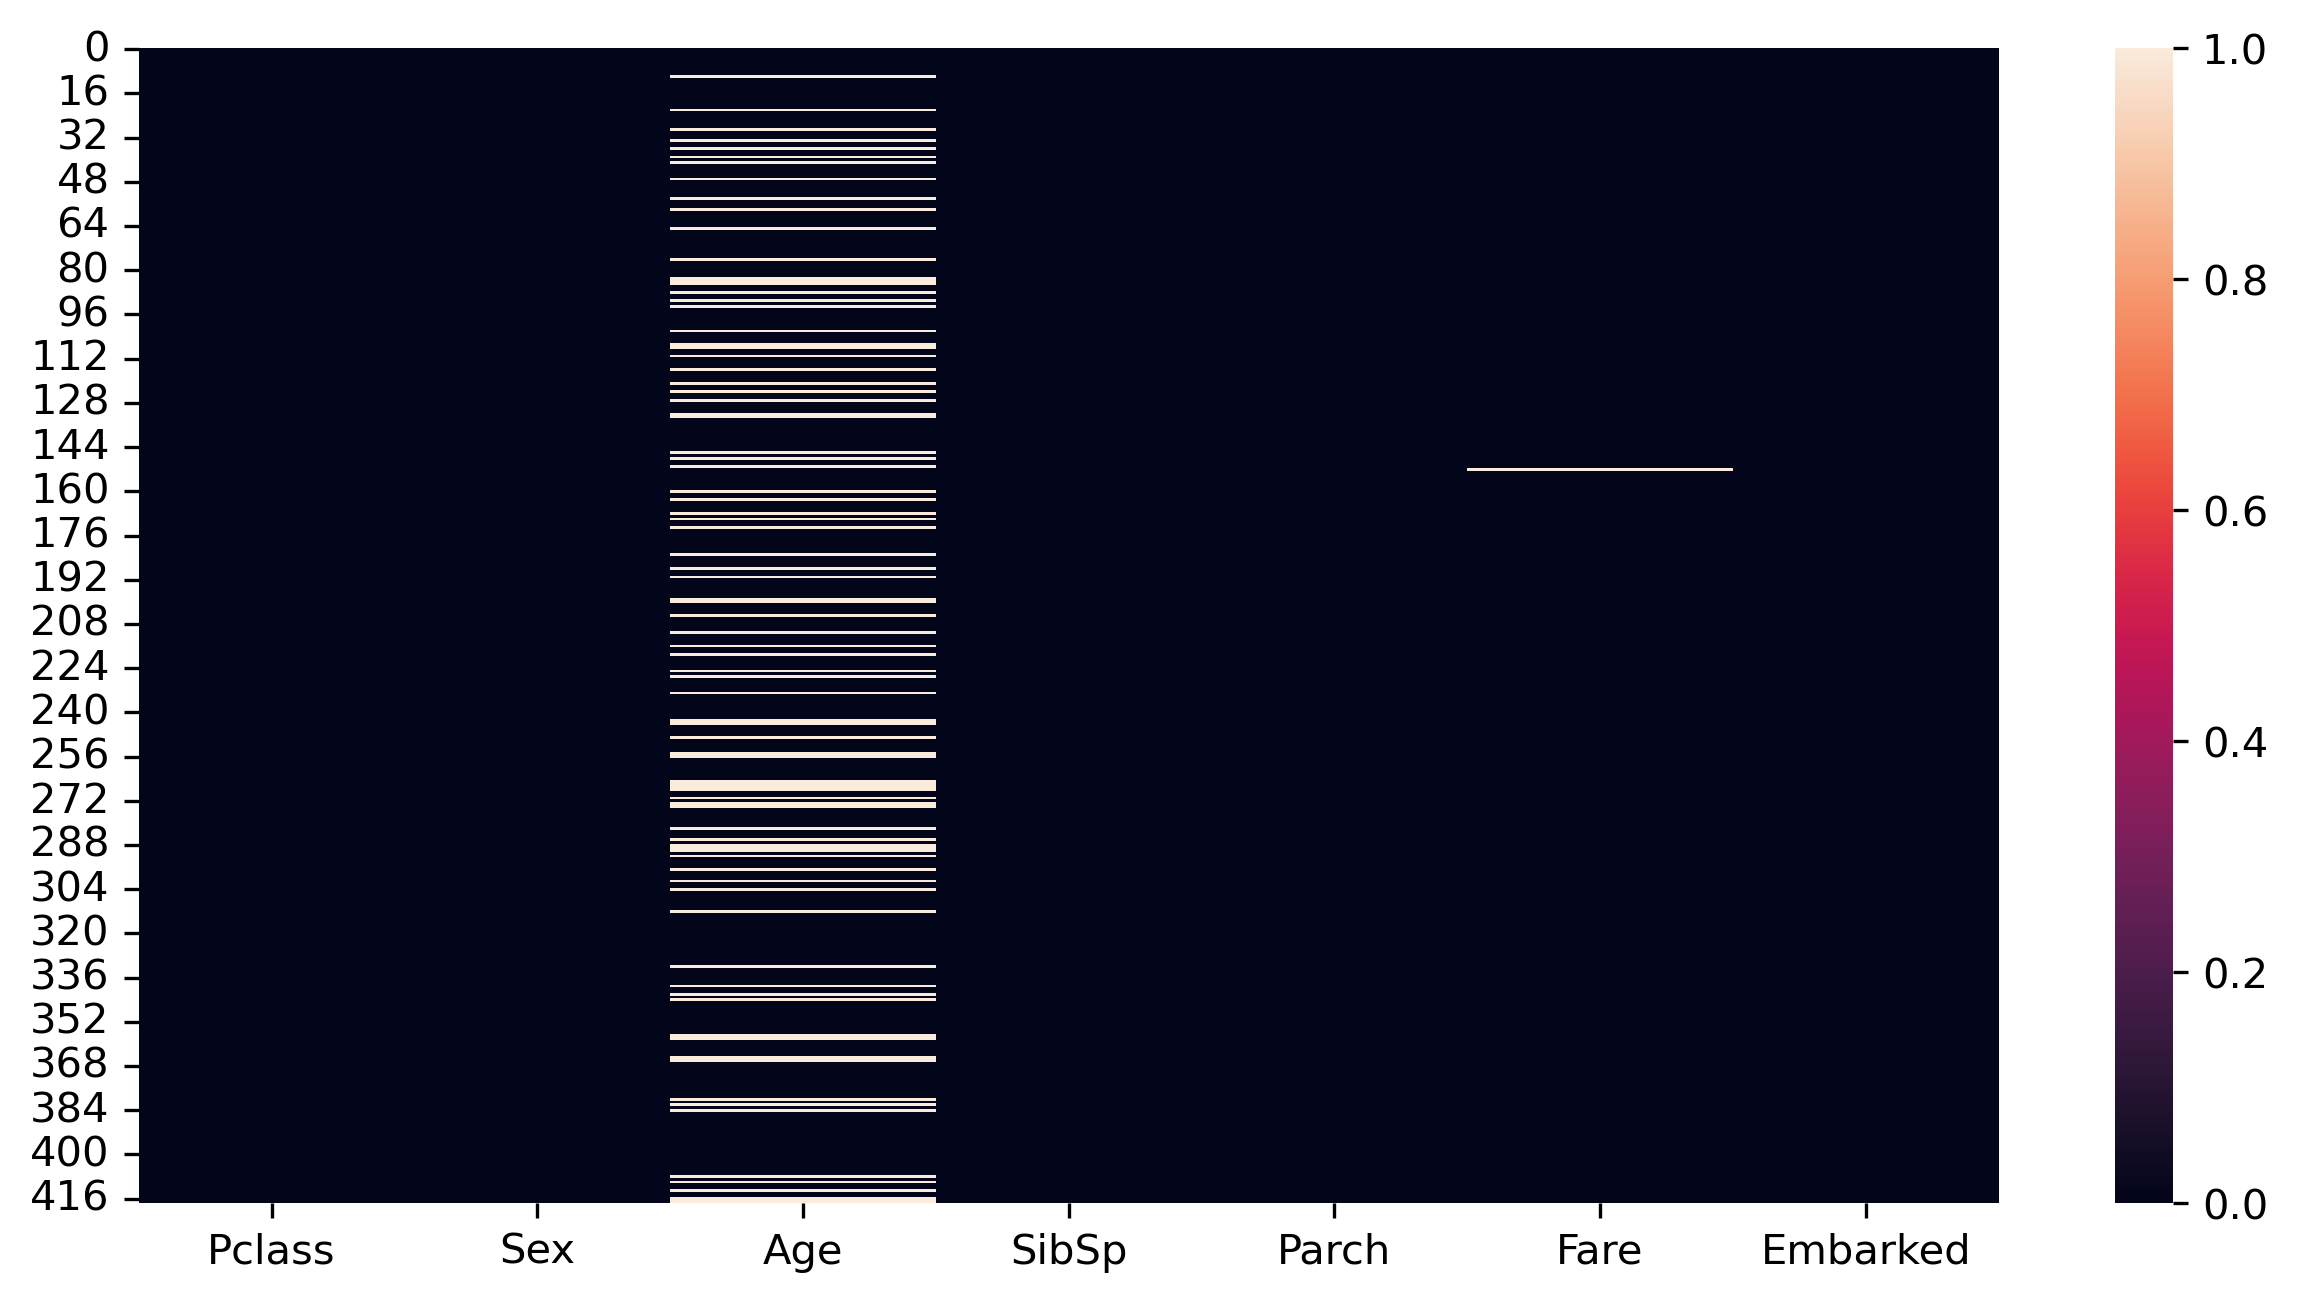

In [25]:
sns.heatmap(test.isnull())

# Calculate the percentage of missig values in each column.

In [26]:
for i in test.isnull().sum():
    print((i/len(test))*100)

0.0
0.0
20.574162679425836
0.0
0.0
0.23923444976076555
0.0


# Rule for missing value imputation:
1. If NA values are between 1 to 5%, drop na (rows)
2. If NA value are 5 to 40%, fillna(replace)
3. If NA values are greater than 50% in a column, drop that entire column.

In [27]:
test.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S

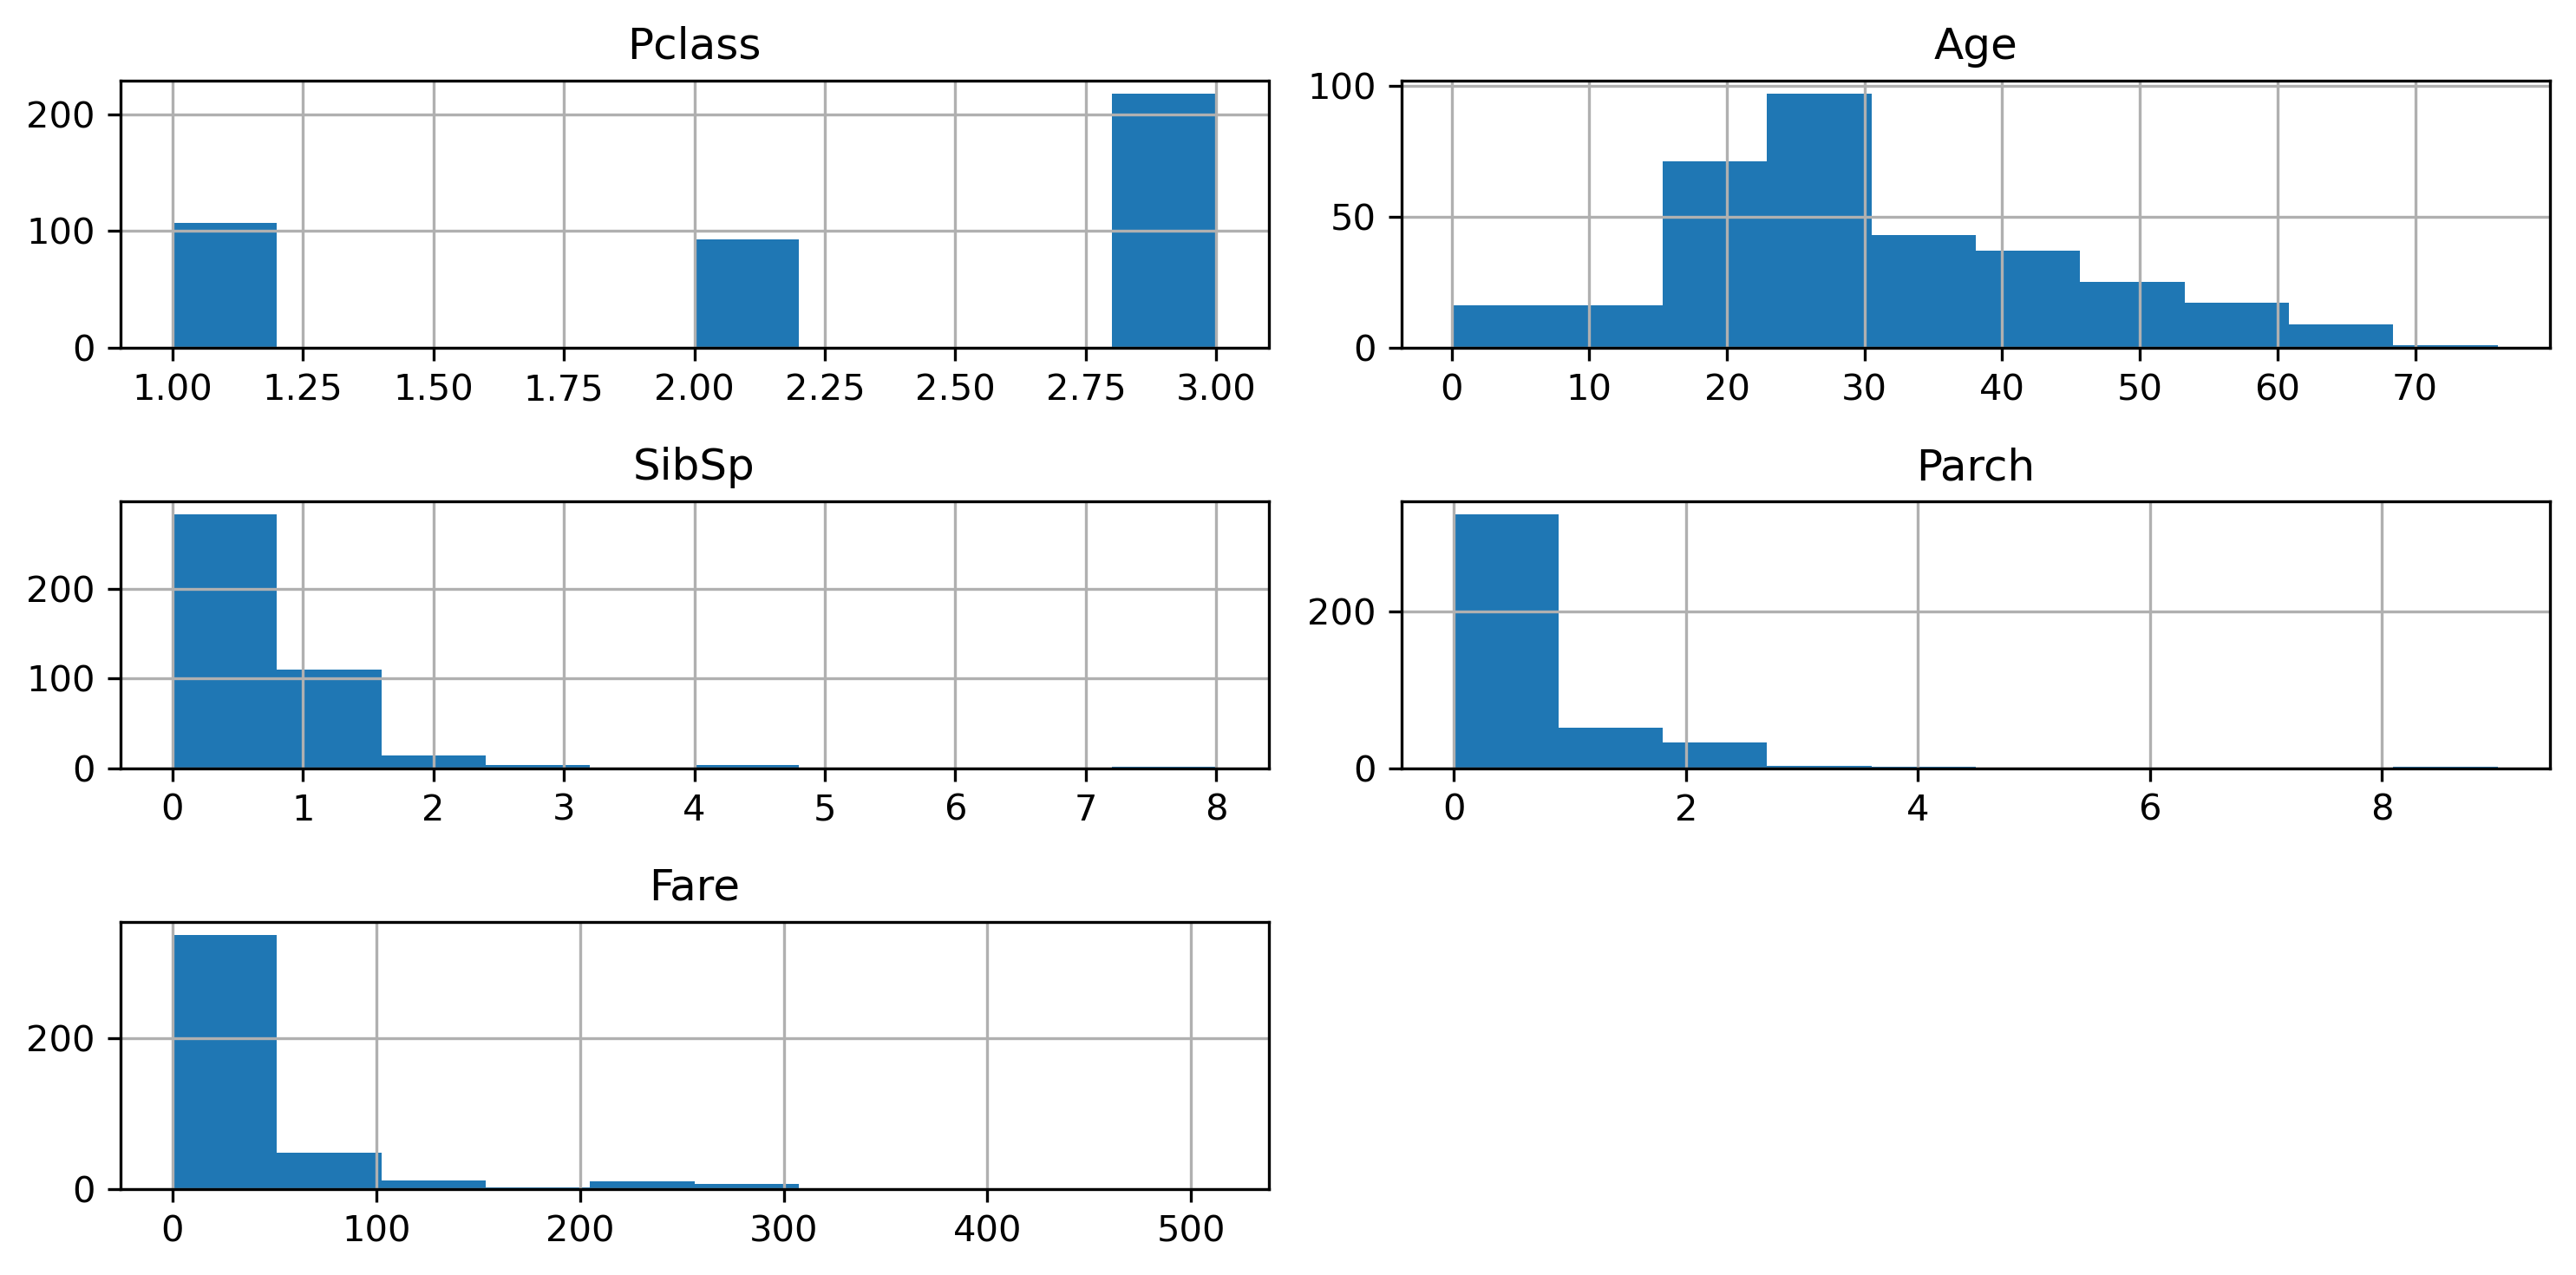

In [28]:
test.hist()
plt.tight_layout()

<Axes: >

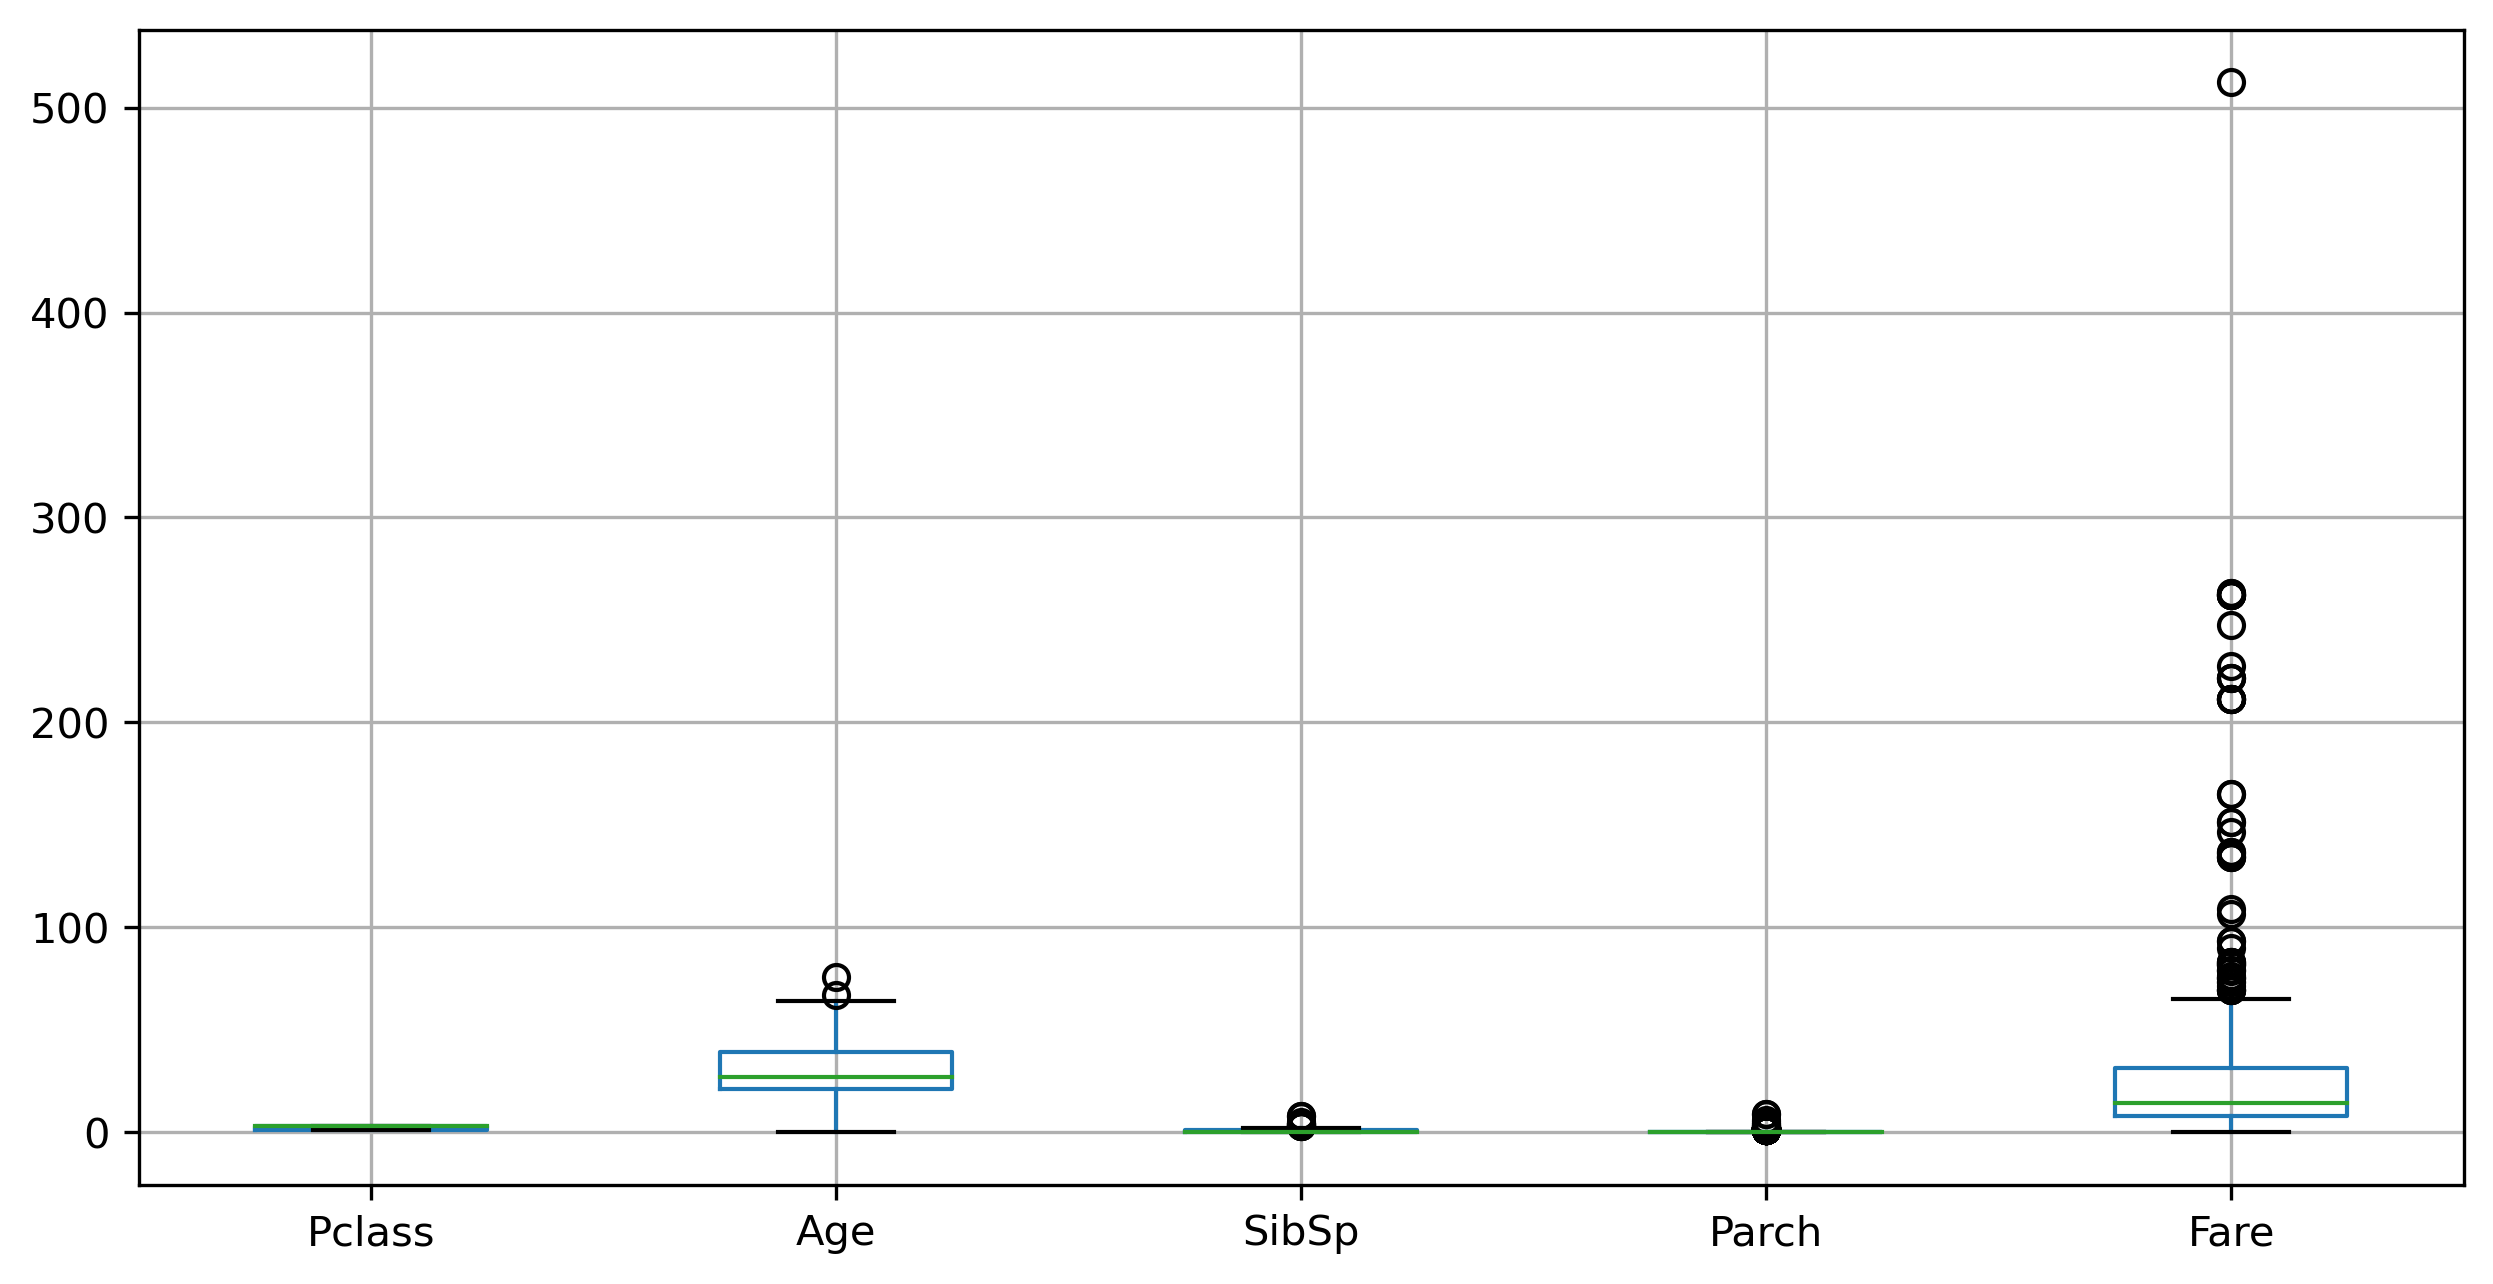

In [29]:
test.boxplot()

In [31]:
age_median = test["Age"].median()
age_median

27.0

In [32]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [33]:
test["Age"].fillna(age_median, inplace = True)

In [34]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [37]:
test['Fare'].isnull().sum()

1

In [38]:
test = test.dropna(subset=['Fare'])

In [39]:
test['Fare'].isnull().sum()

0

In [40]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [42]:
for i in train.isnull().sum():
    print((i/len("train"))*100)

0.0
0.0
0.0
3540.0
0.0
0.0
0.0
40.0


In [43]:
age_median = train["Age"].median()
age_median

28.0

In [44]:
train["Age"].fillna(age_median, inplace = True)

In [48]:
Embarked_mode = train["Embarked"].mode()
Embarked_mode

0    S
Name: Embarked, dtype: object

In [53]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [55]:
train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [56]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [57]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Outlier detection

- There are multiple approaches to detect outliers in the dataset.
    - Histogram
    - Boxplot
    - Descriptive stats for df

In [58]:
train.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

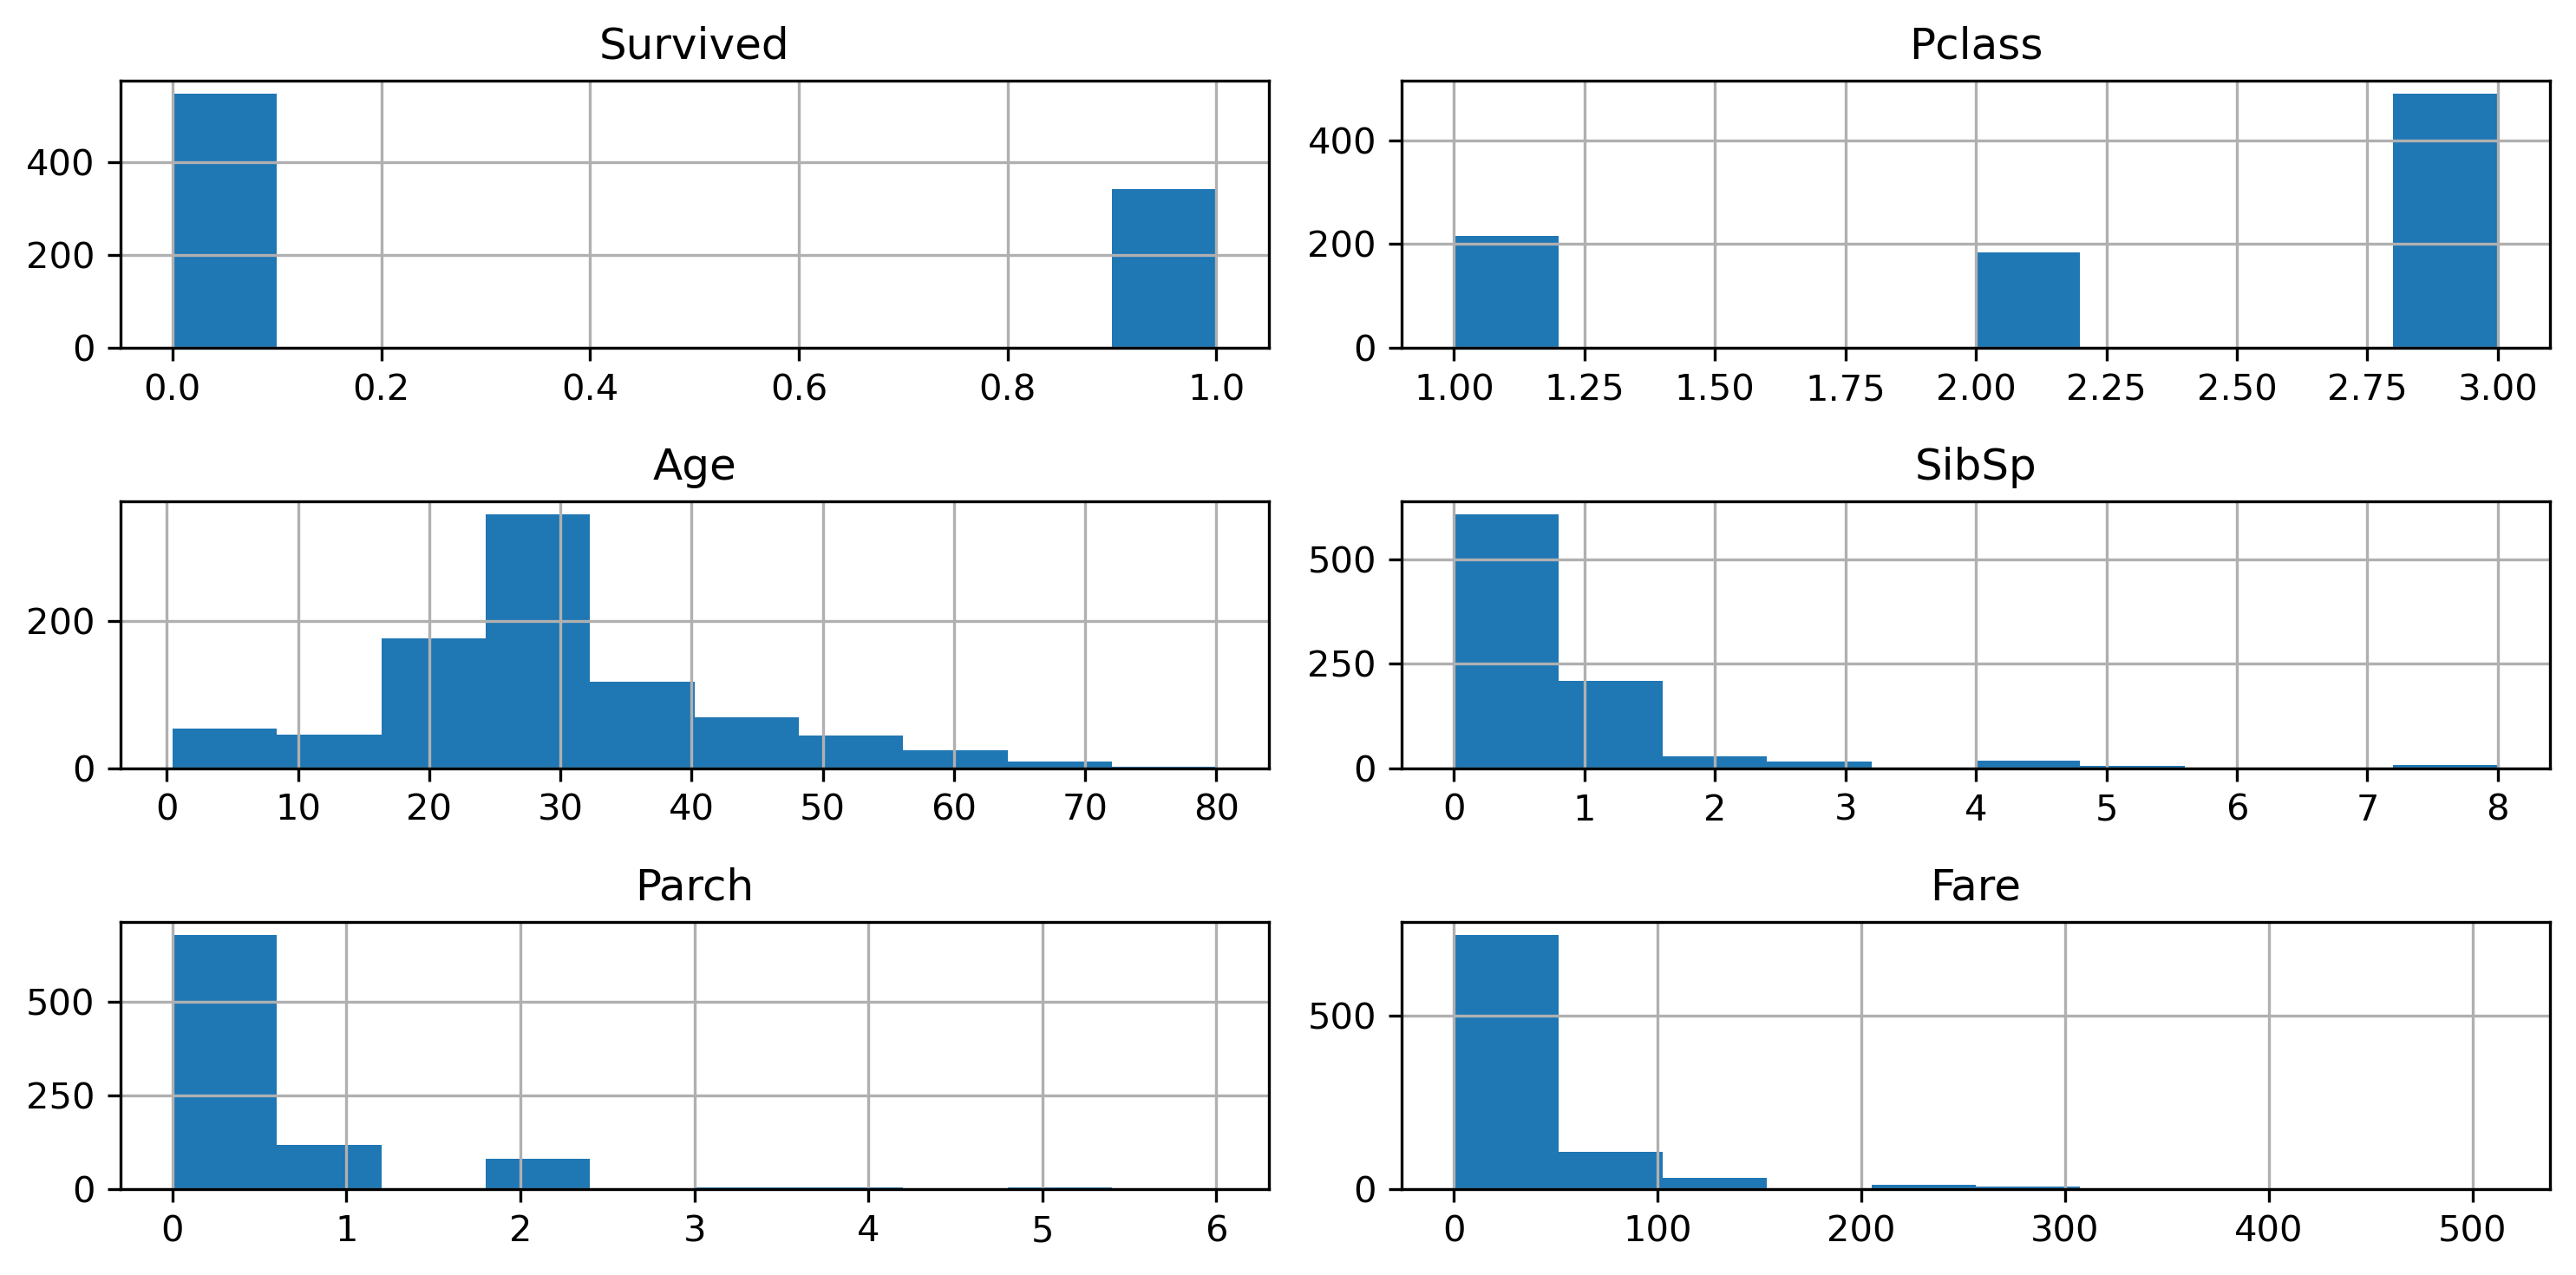

In [59]:
train.hist()
plt.tight_layout()

<Axes: >

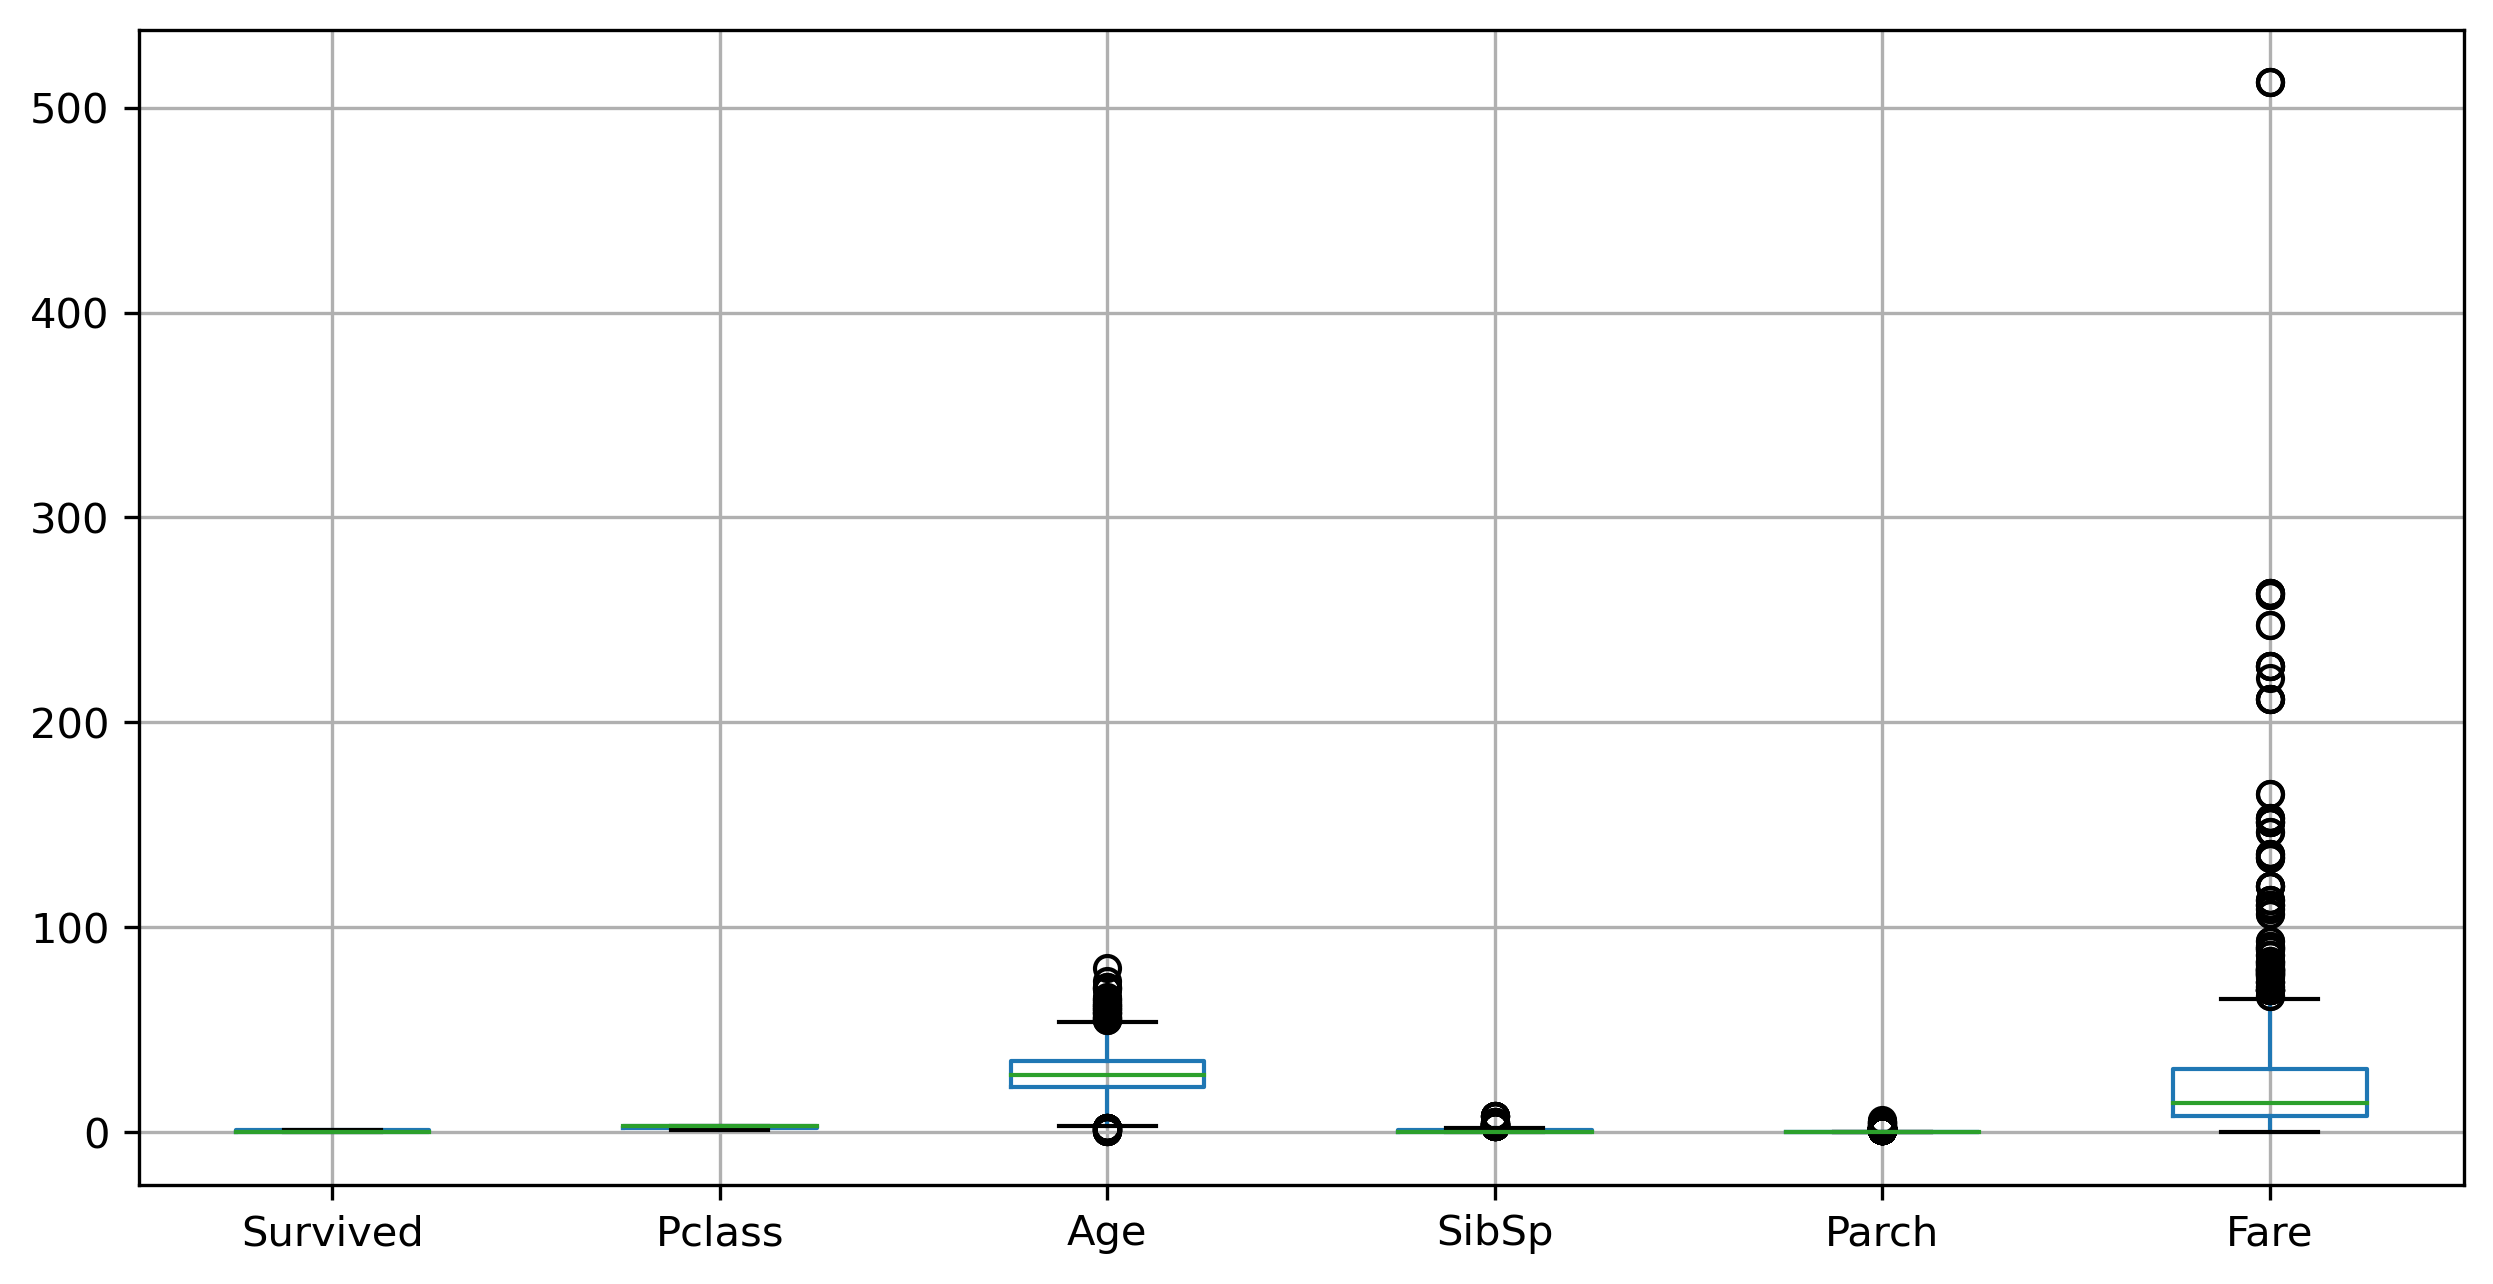

In [60]:
train.boxplot()

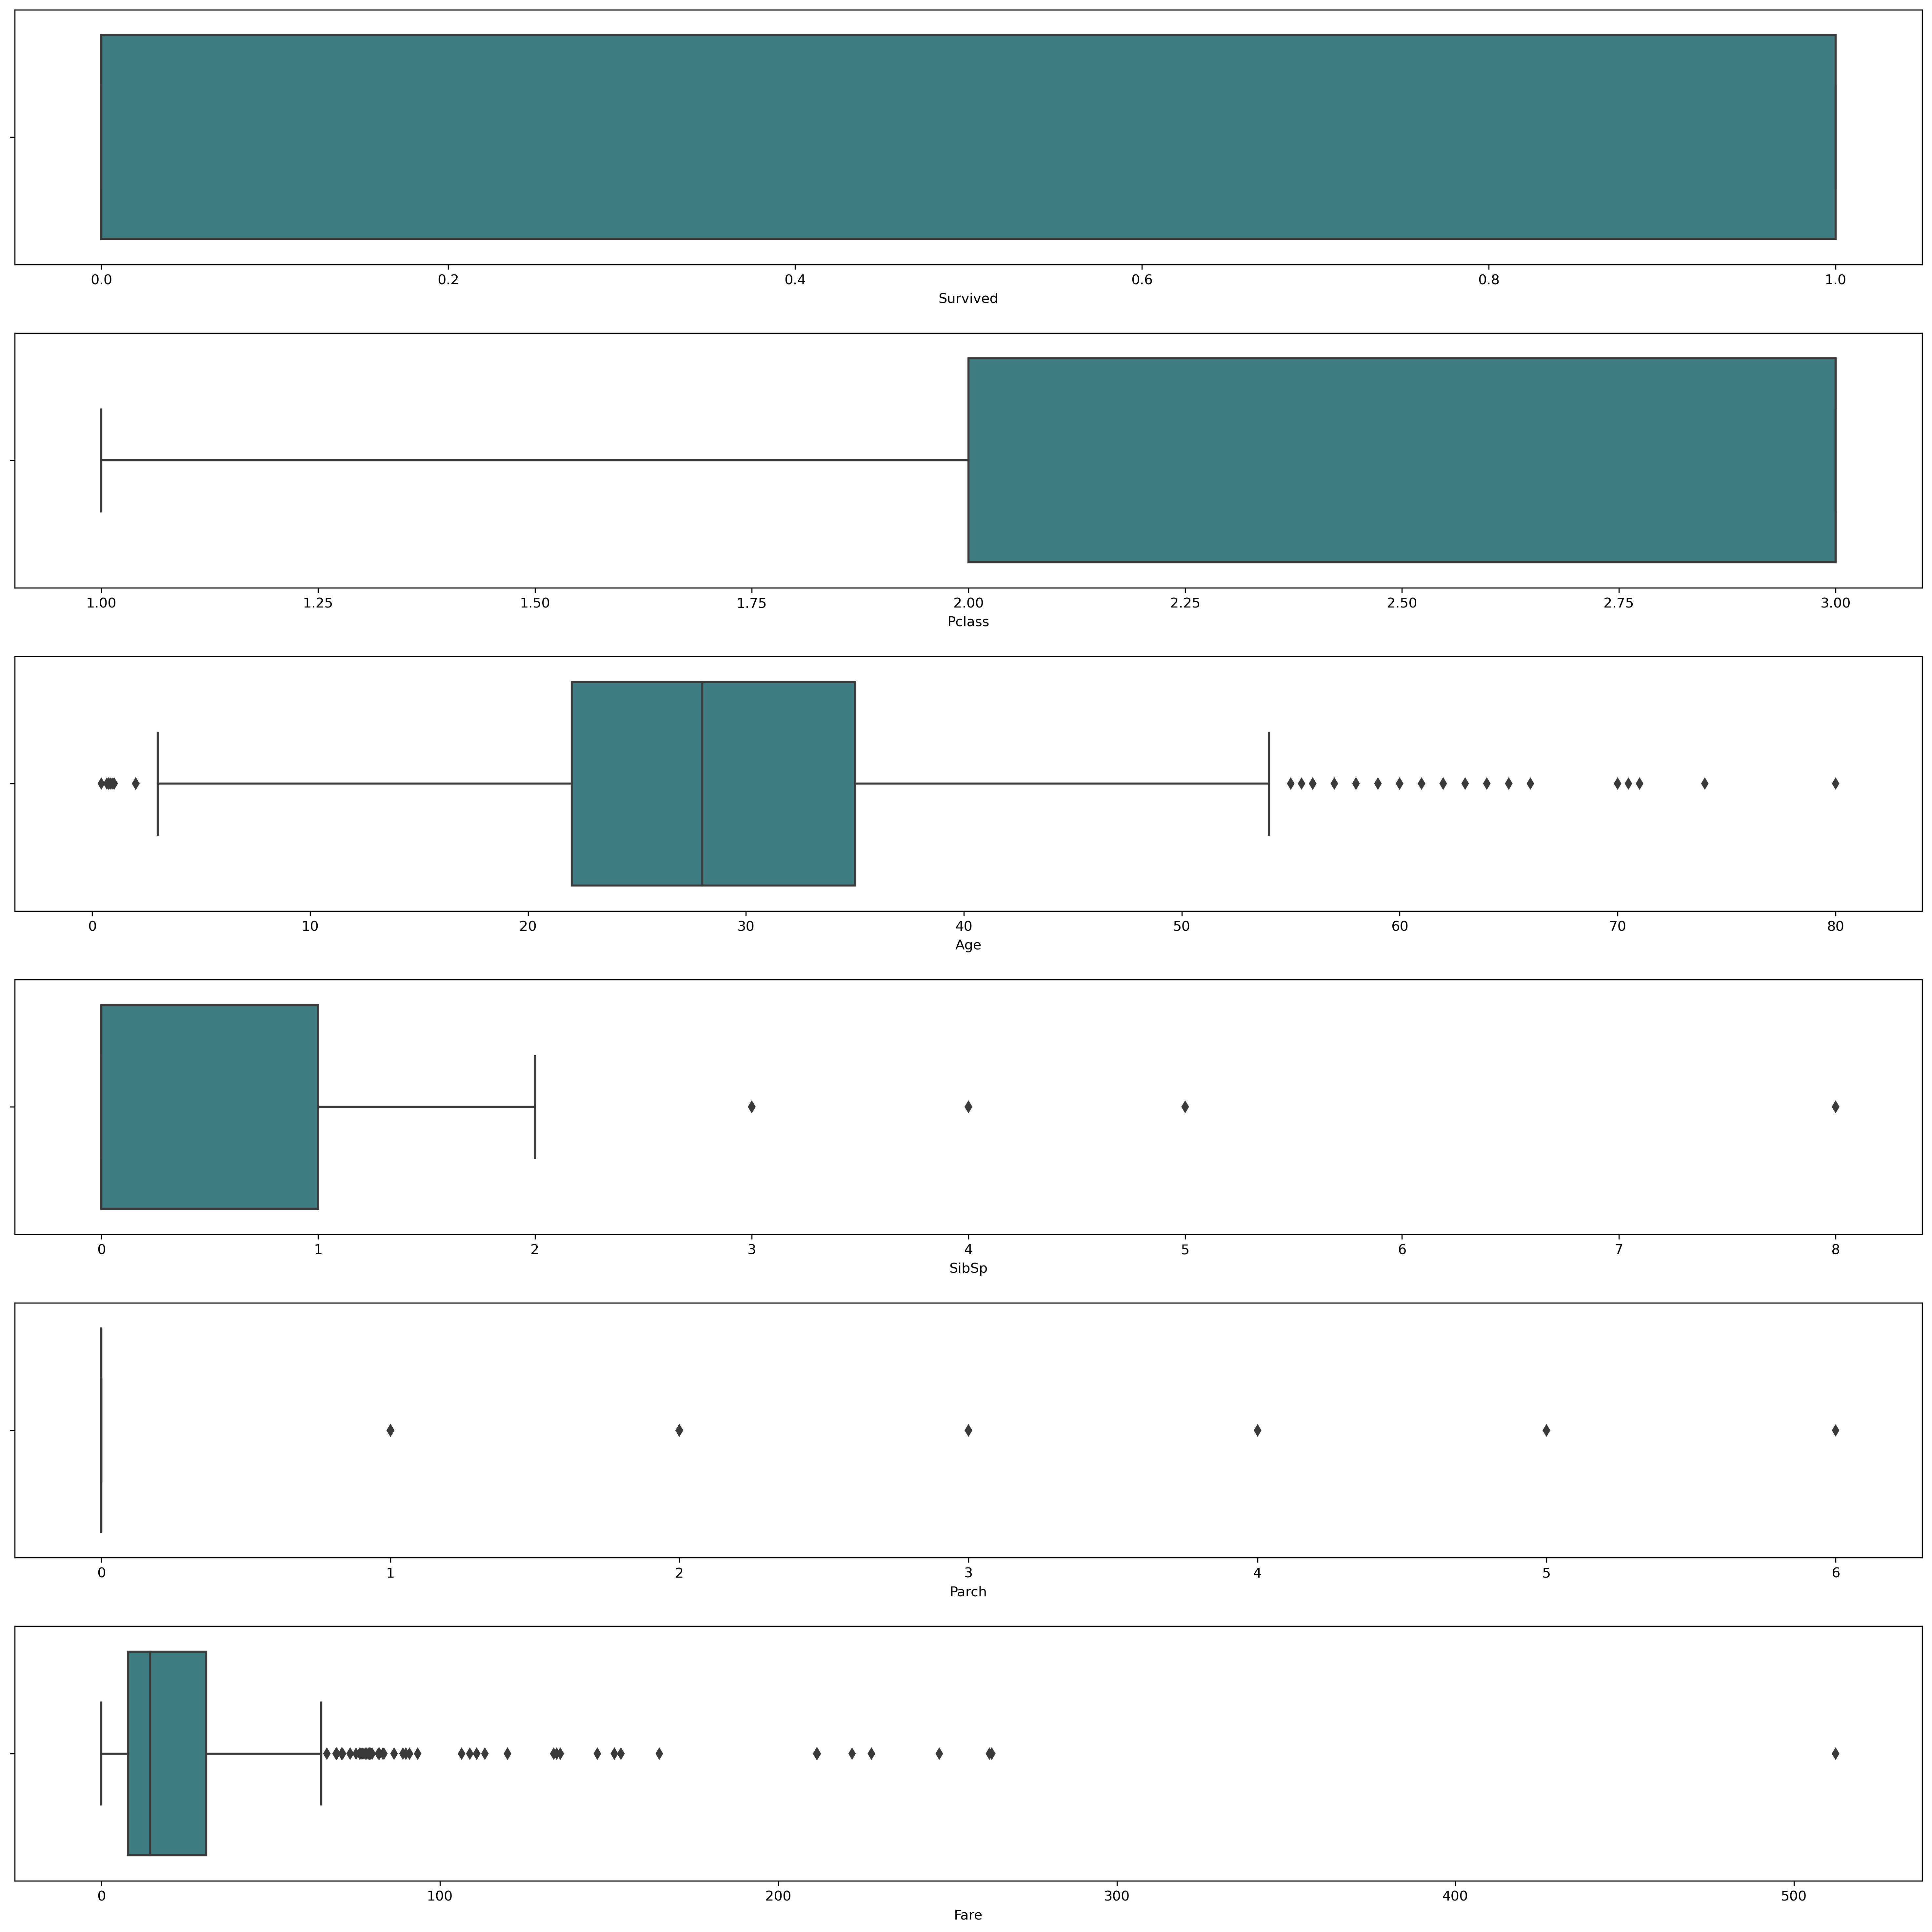

In [63]:
ot = train.copy()
fig, axes=plt.subplots(6,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='Survived',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Pclass',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='SibSp',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Parch',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Fare',data=ot,palette='crest',ax=axes[5])
plt.tight_layout(pad=2.0)

# Outlier detection function

In [66]:
def outlier_detection(data, colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3 - q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower, upper

In [67]:
outlier_detection (train, "Age")

(2.5, 54.5)

Text(0.5, 1.0, 'Before replace the outlier with upper and lower extreme values')

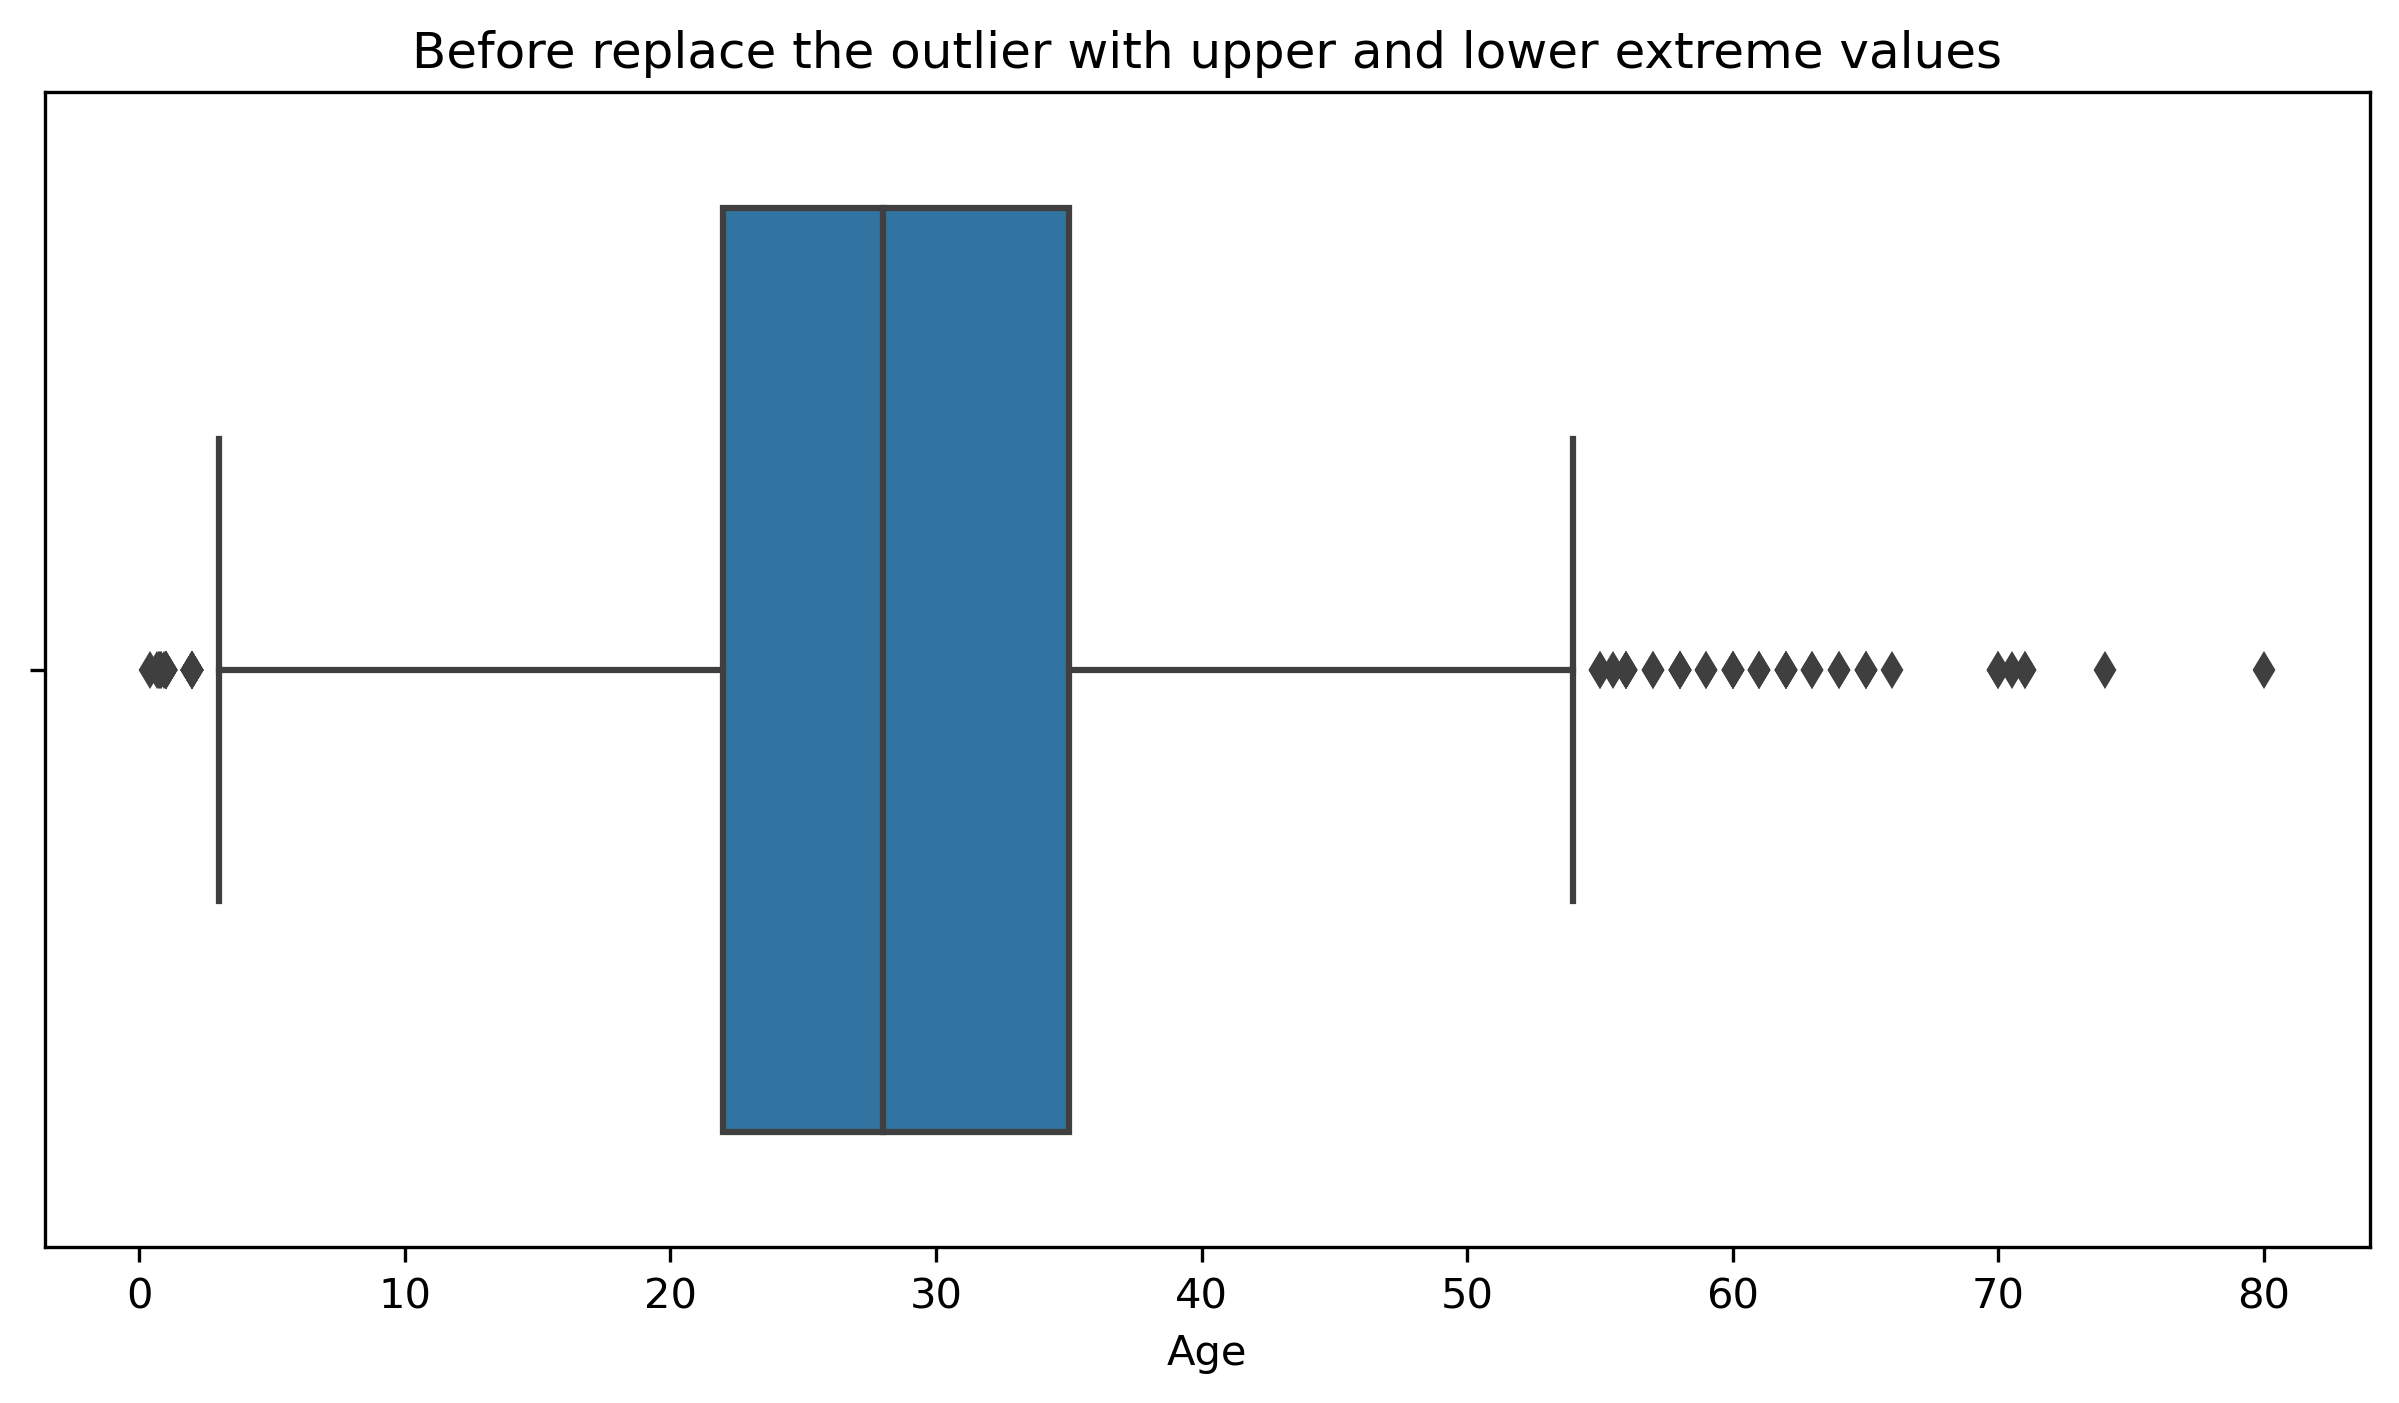

In [70]:
sns.boxplot(x = train["Age"])
plt.xlabel("Age")
plt.title("Before replace the outlier with upper and lower extreme values")

In [73]:
train.loc[train["Age"]>54.5, "Age"] = 54.5

In [75]:
train.loc[train["Age"]<2.5, "Age"] = 2.5

Text(0.5, 1.0, 'After replaced the outlier with upper and lower extreme values')

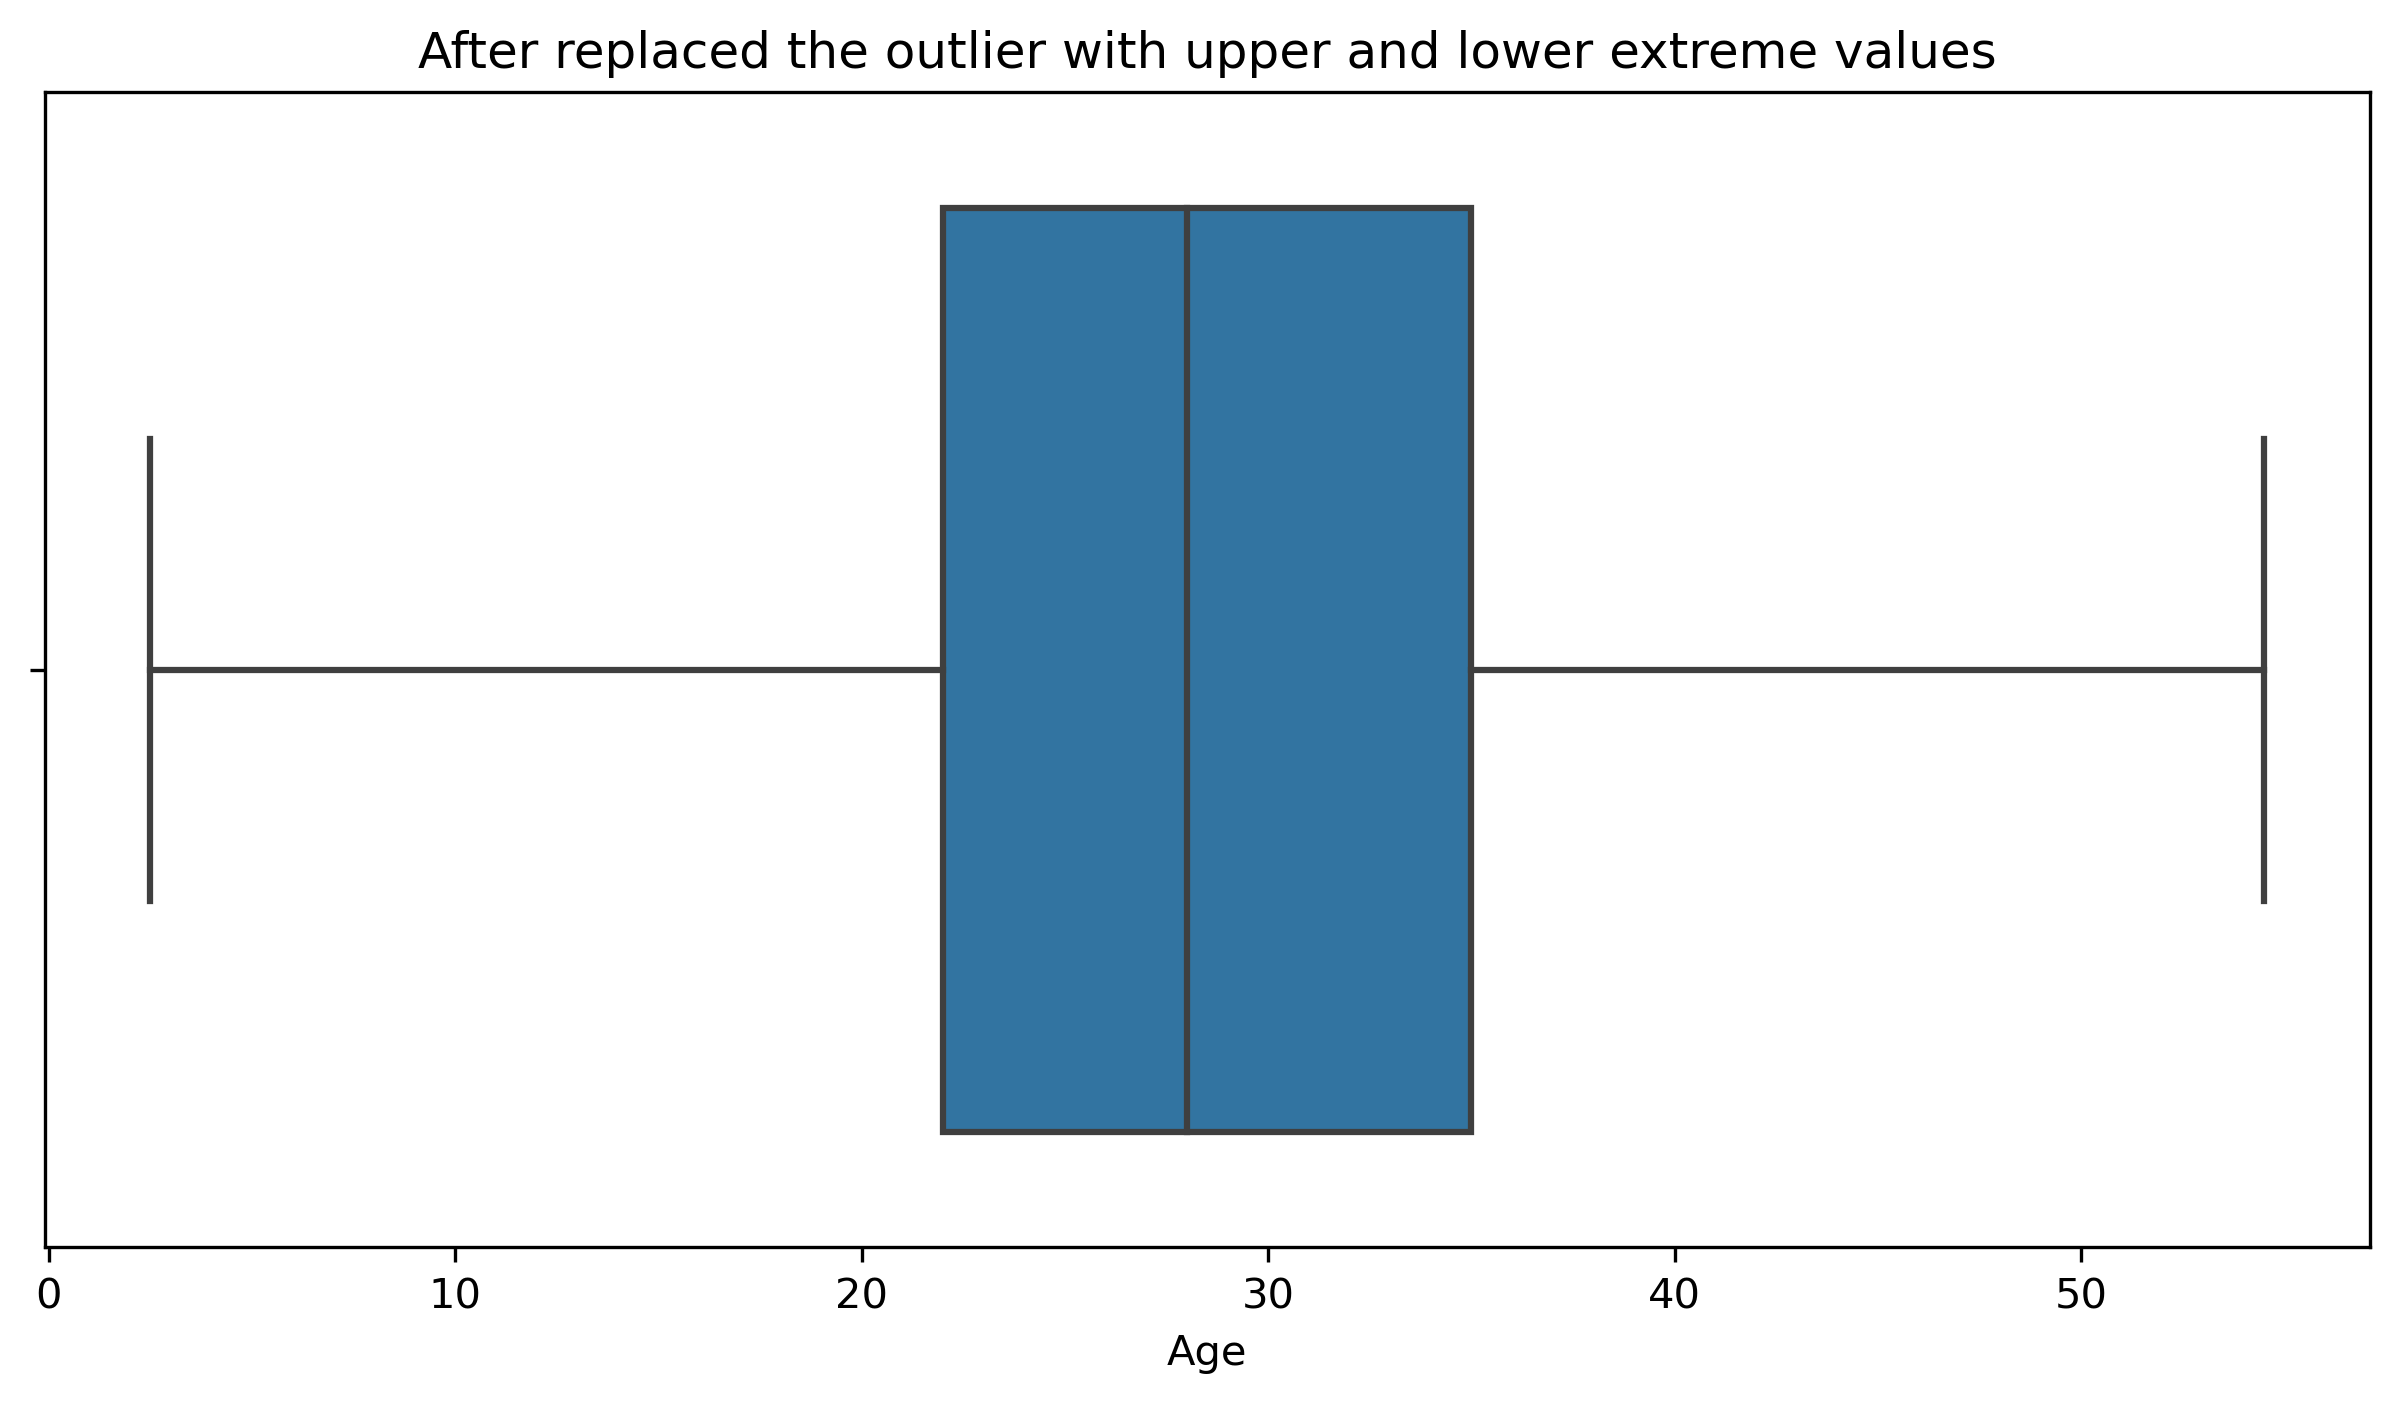

In [76]:
sns.boxplot(x = train["Age"])
plt.xlabel("Age")
plt.title("After replaced the outlier with upper and lower extreme values")

In [78]:
outlier_detection (train, "SibSp")

(-1.5, 2.5)

Text(0.5, 1.0, 'Before replace the outlier with upper and lower extreme values')

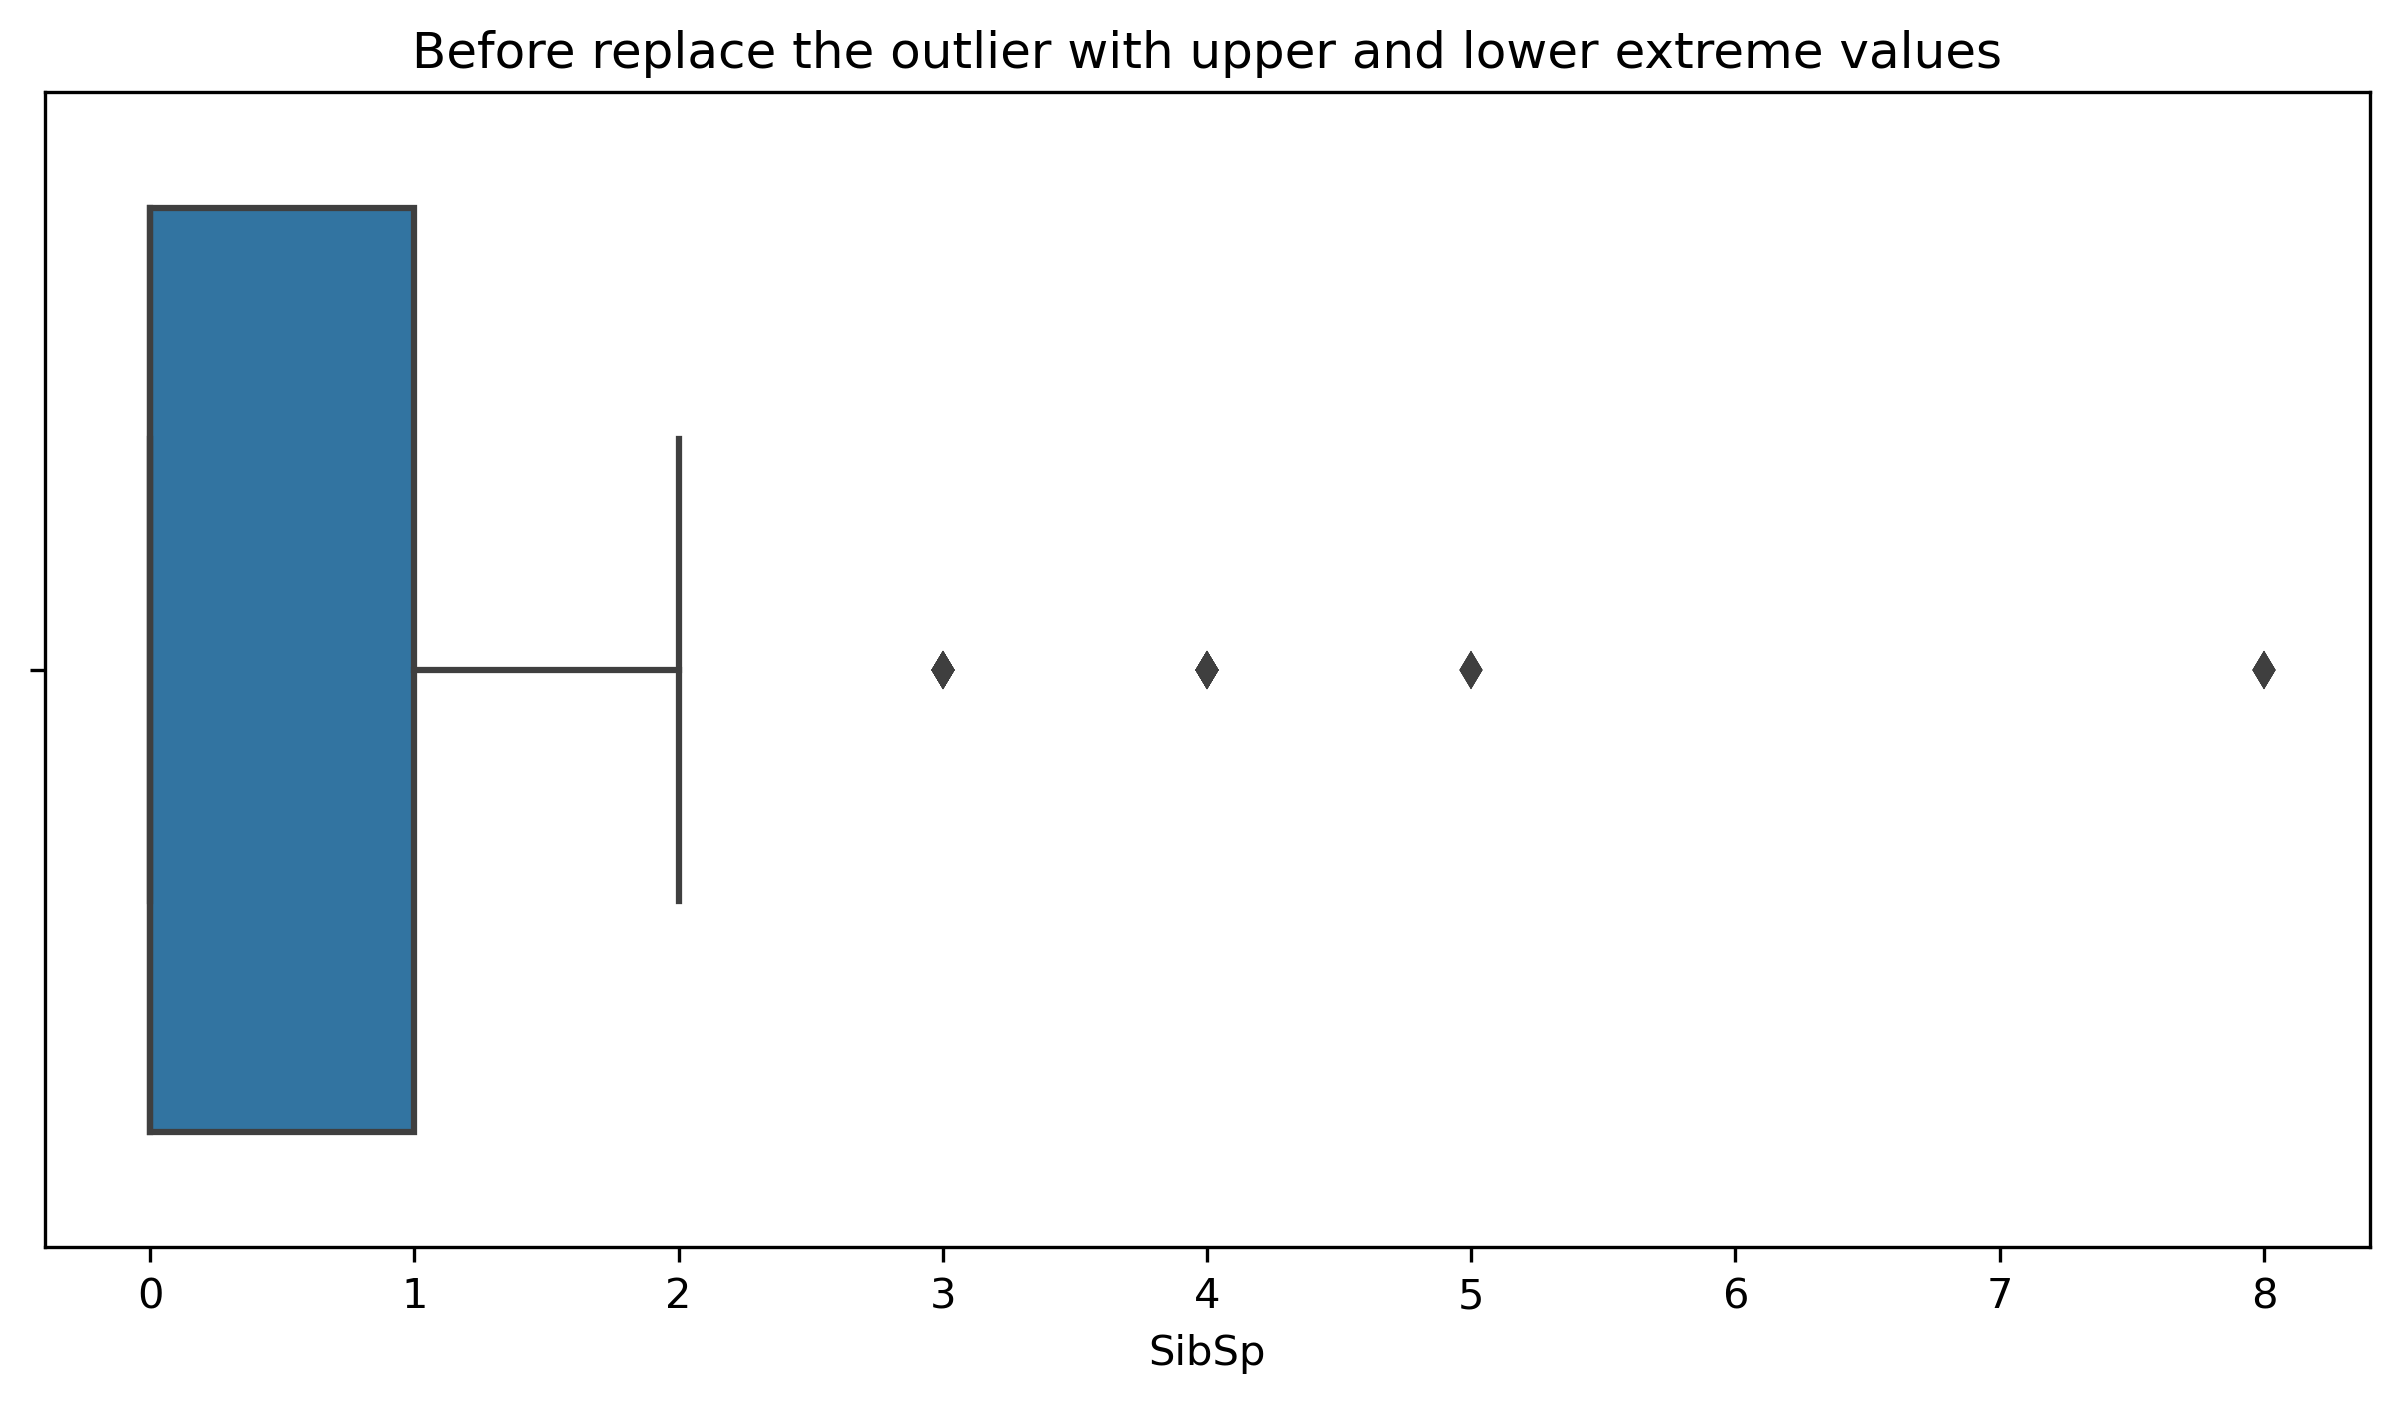

In [79]:
sns.boxplot(x = train["SibSp"])
plt.xlabel("SibSp")
plt.title("Before replace the outlier with upper and lower extreme values")

In [80]:
train.loc[train["SibSp"]>2.5, "SibSp"] = 2.5

Text(0.5, 1.0, 'After replaced the outlier with upper and lower extreme values')

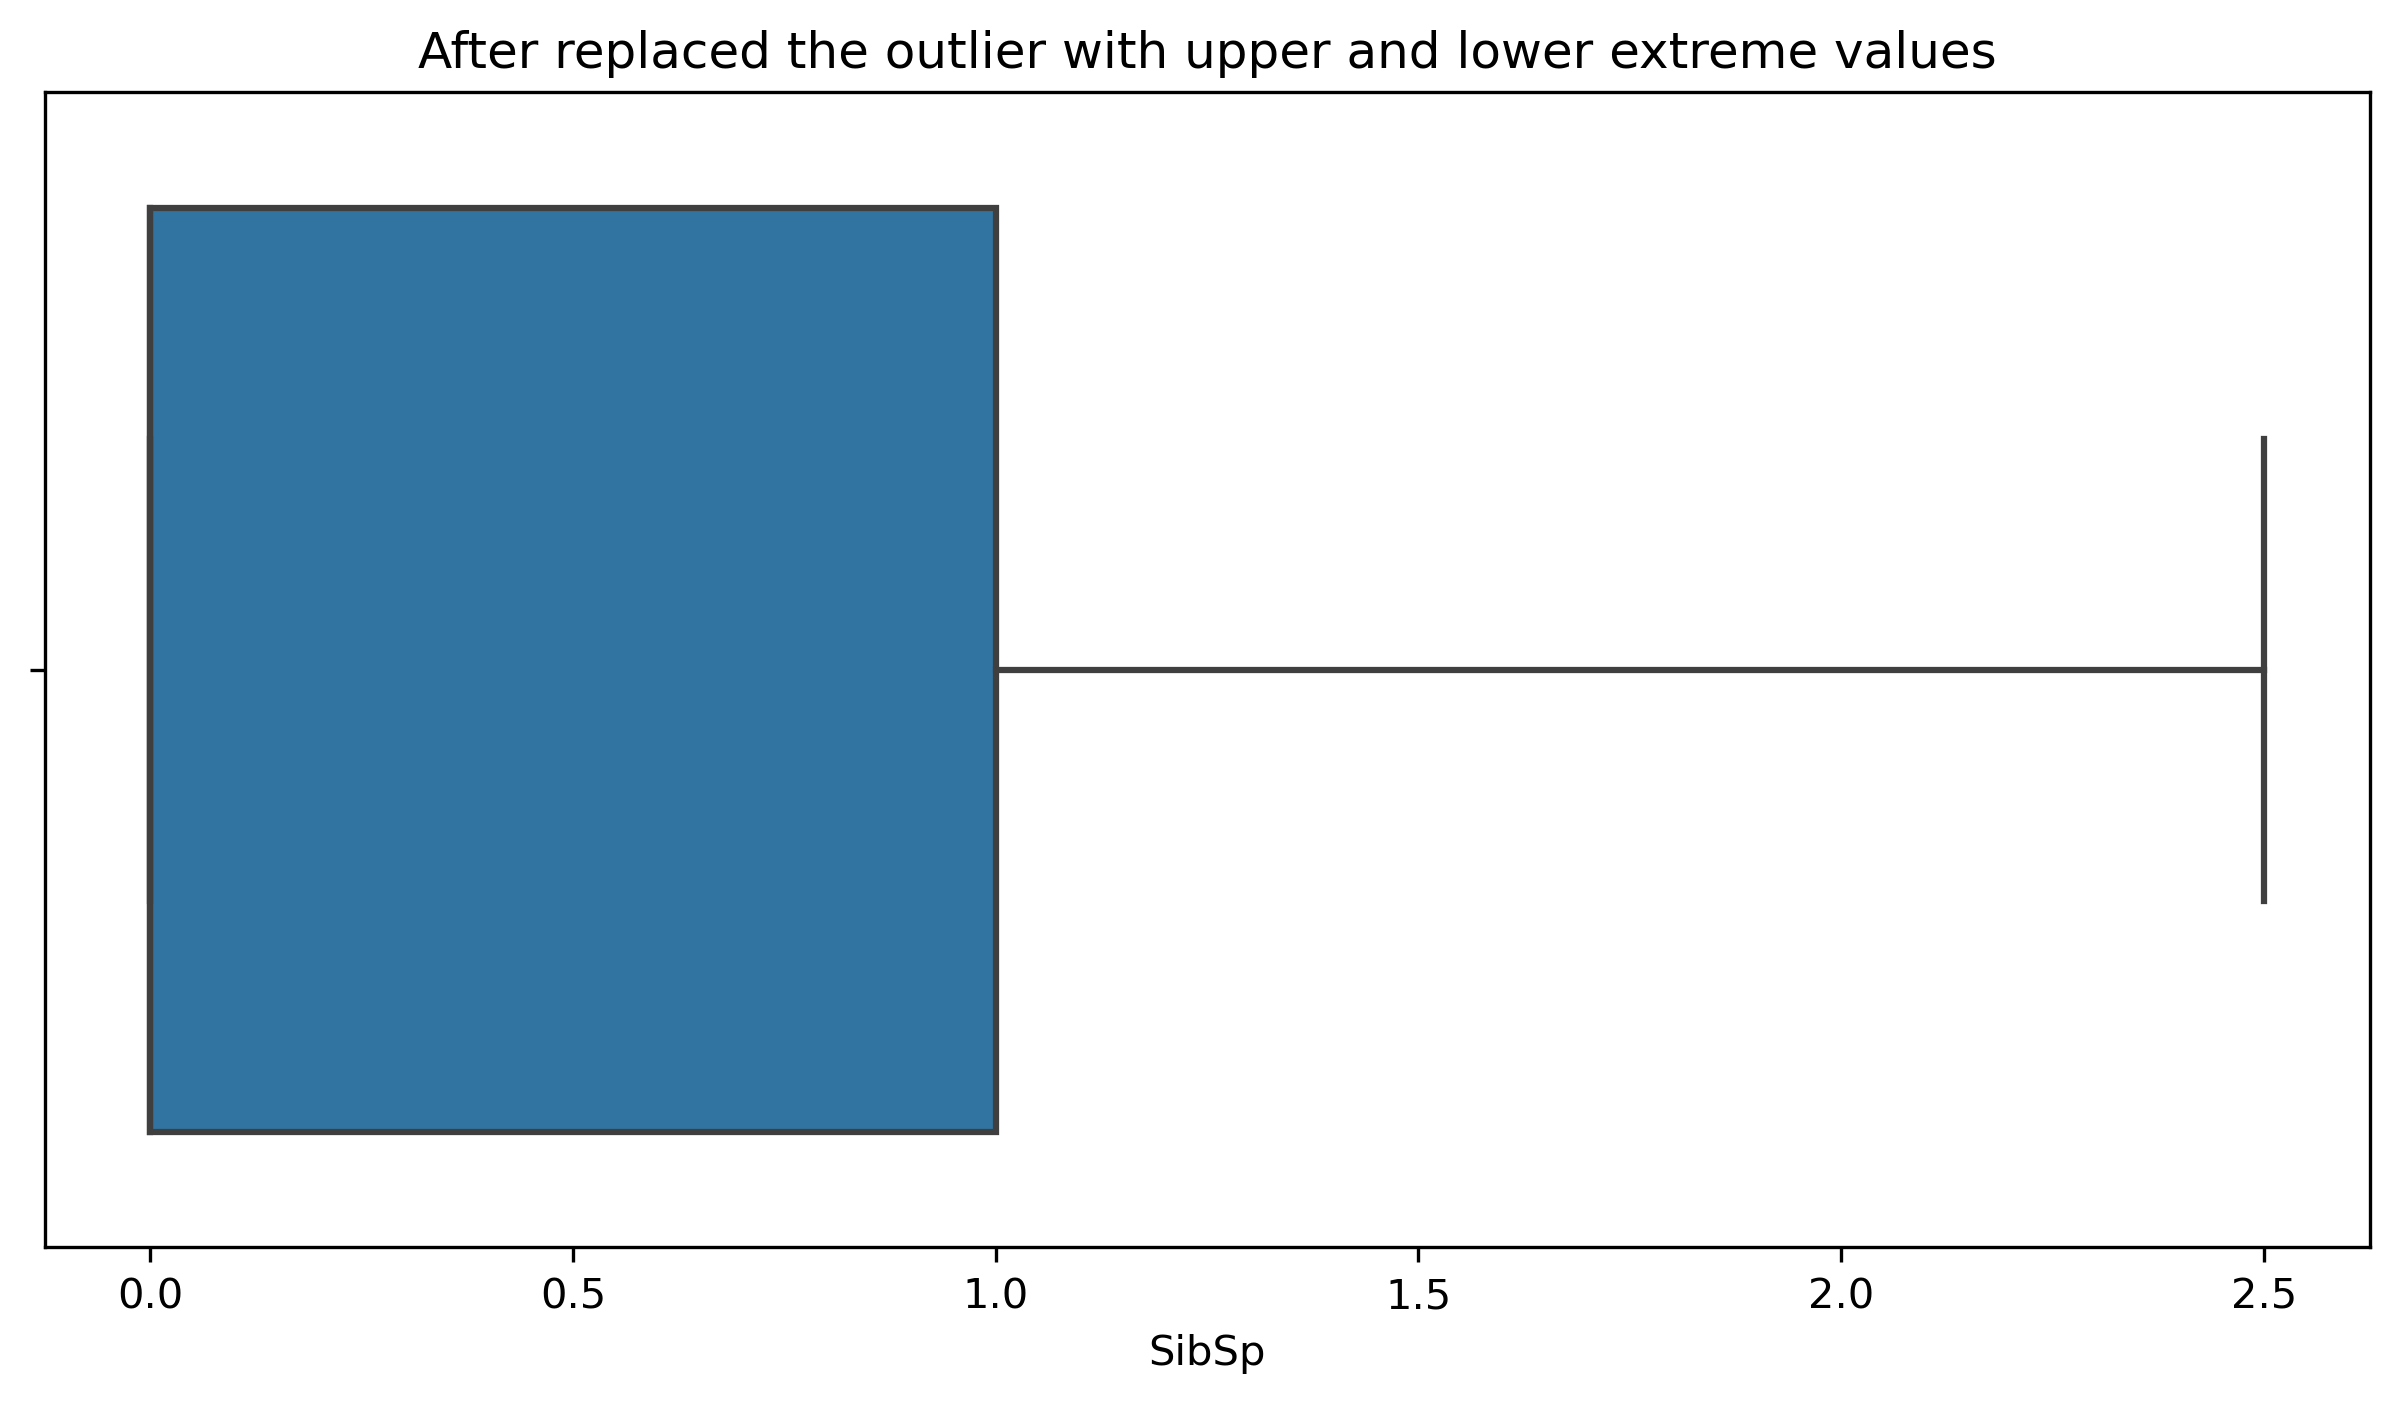

In [81]:
sns.boxplot(x = train["SibSp"])
plt.xlabel("SibSp")
plt.title("After replaced the outlier with upper and lower extreme values")

In [82]:
outlier_detection (train, "Parch")

(0.0, 0.0)

Text(0.5, 1.0, 'Before replaced the outlier with upper and lower extreme values')

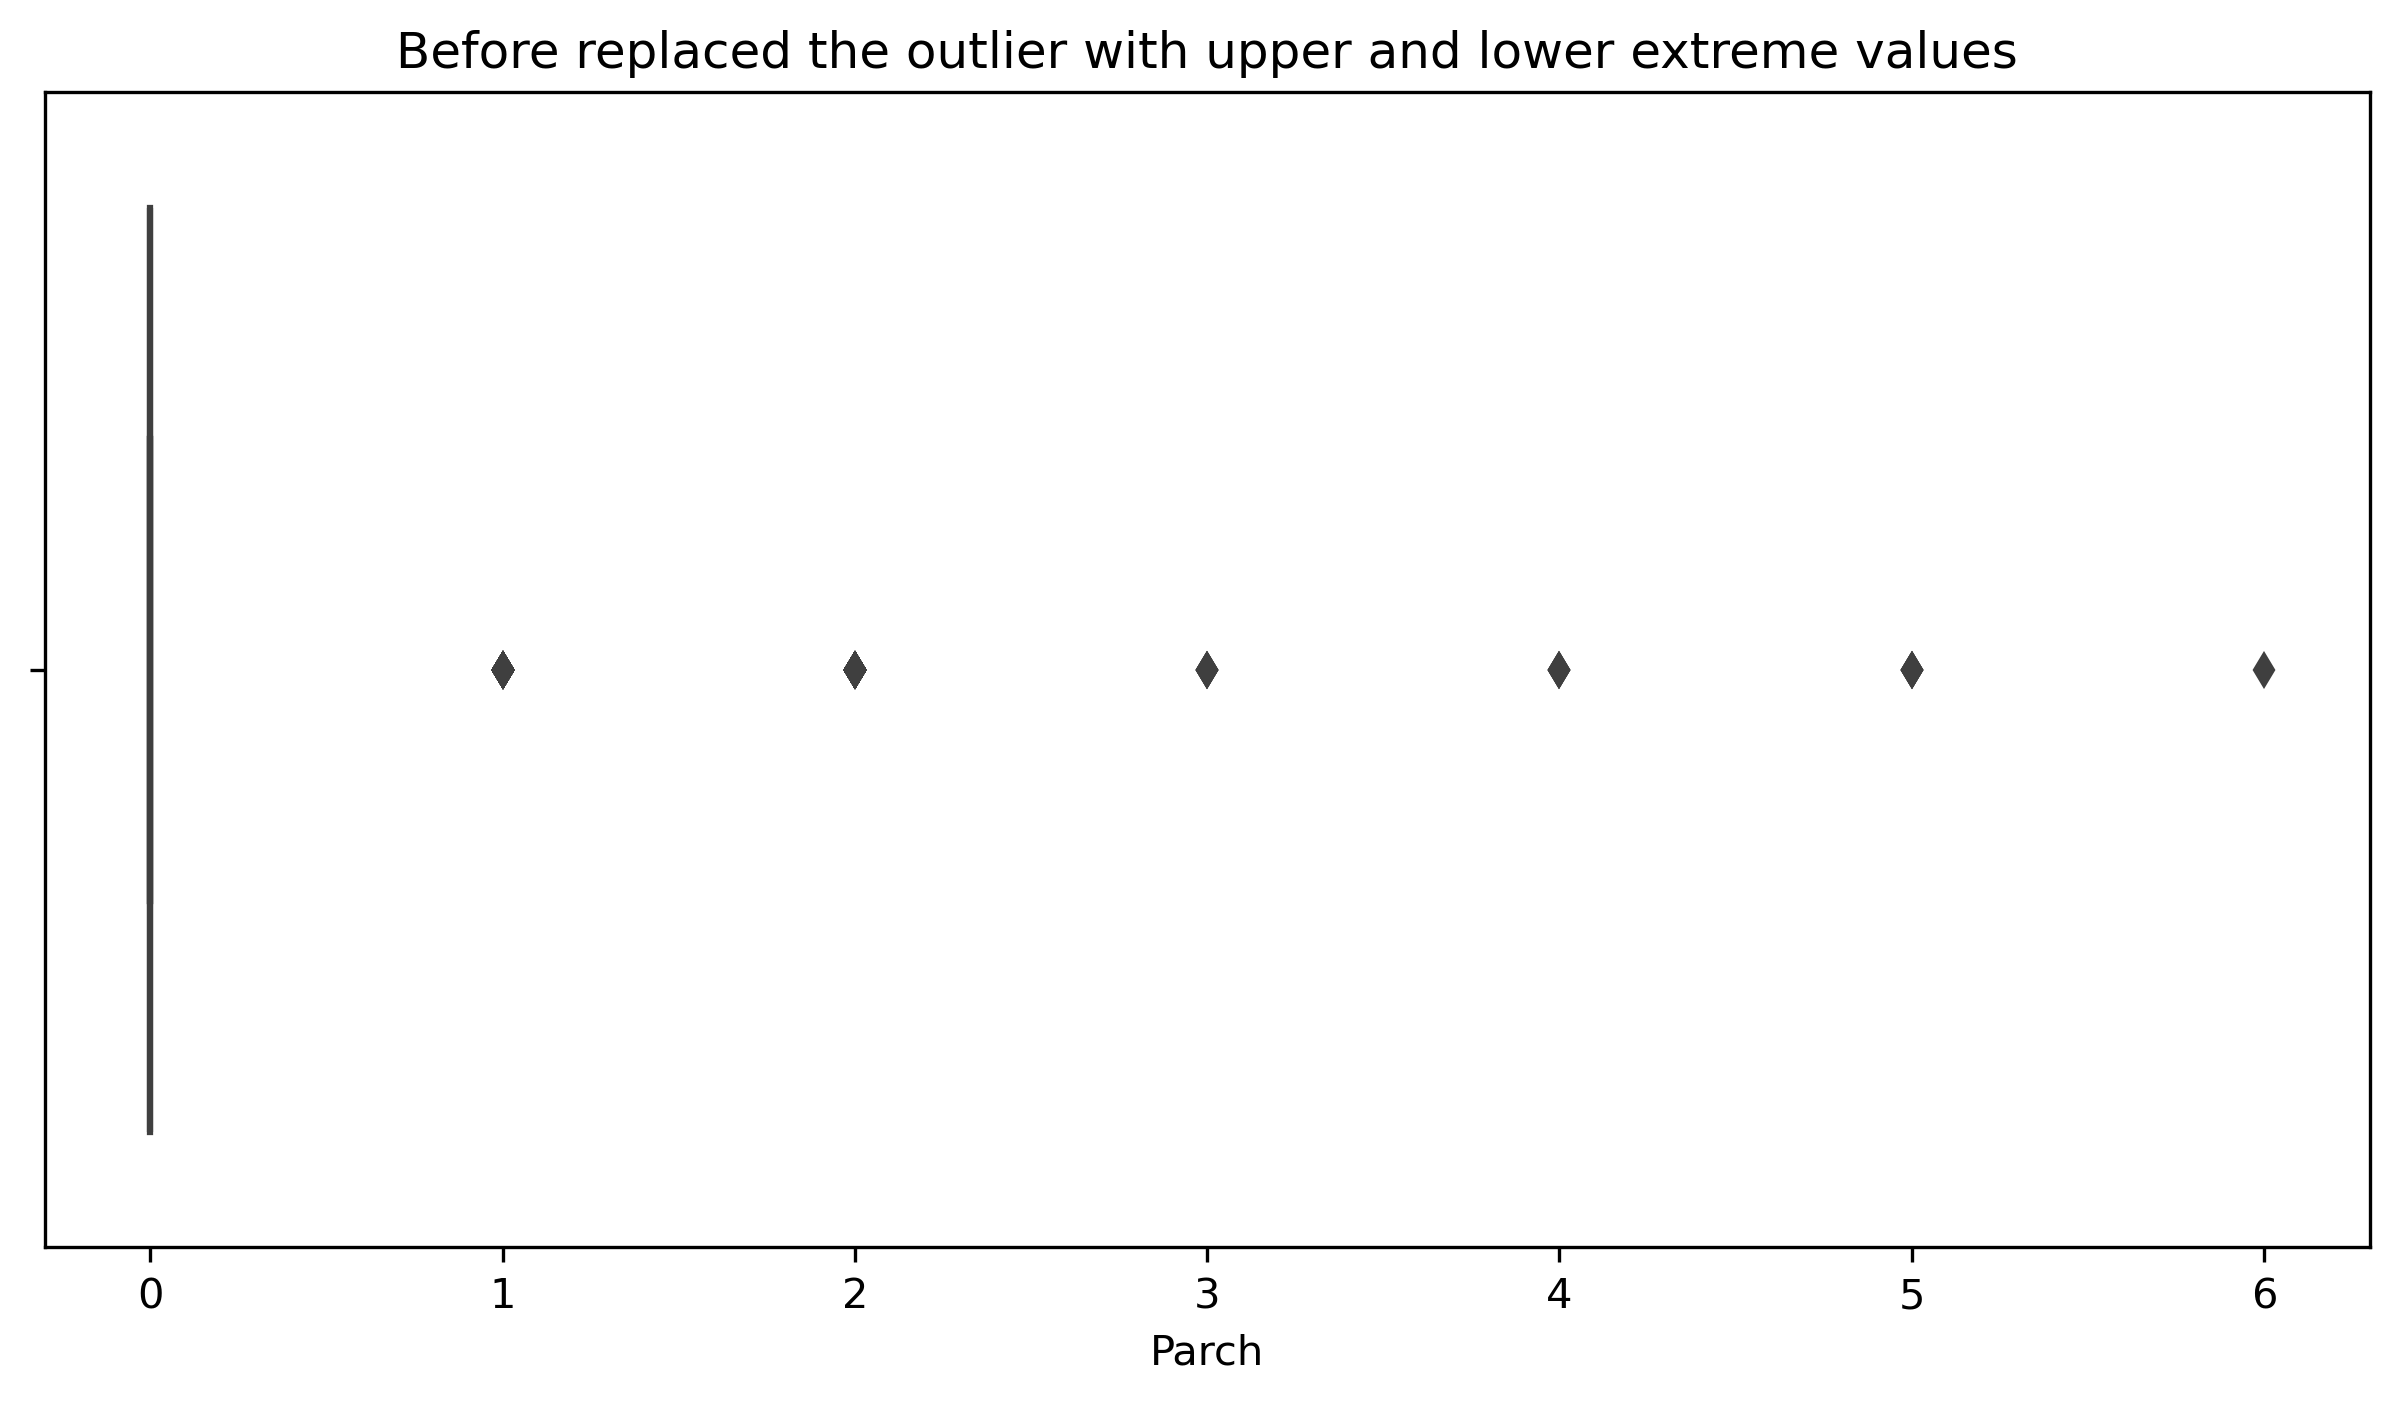

In [83]:
sns.boxplot(x = train["Parch"])
plt.xlabel("Parch")
plt.title("Before replaced the outlier with upper and lower extreme values")

In [84]:
train.loc[train["Parch"]>0.0, "Parch"] = 0.0

Text(0.5, 1.0, 'After replaced the outlier with upper and lower extreme values')

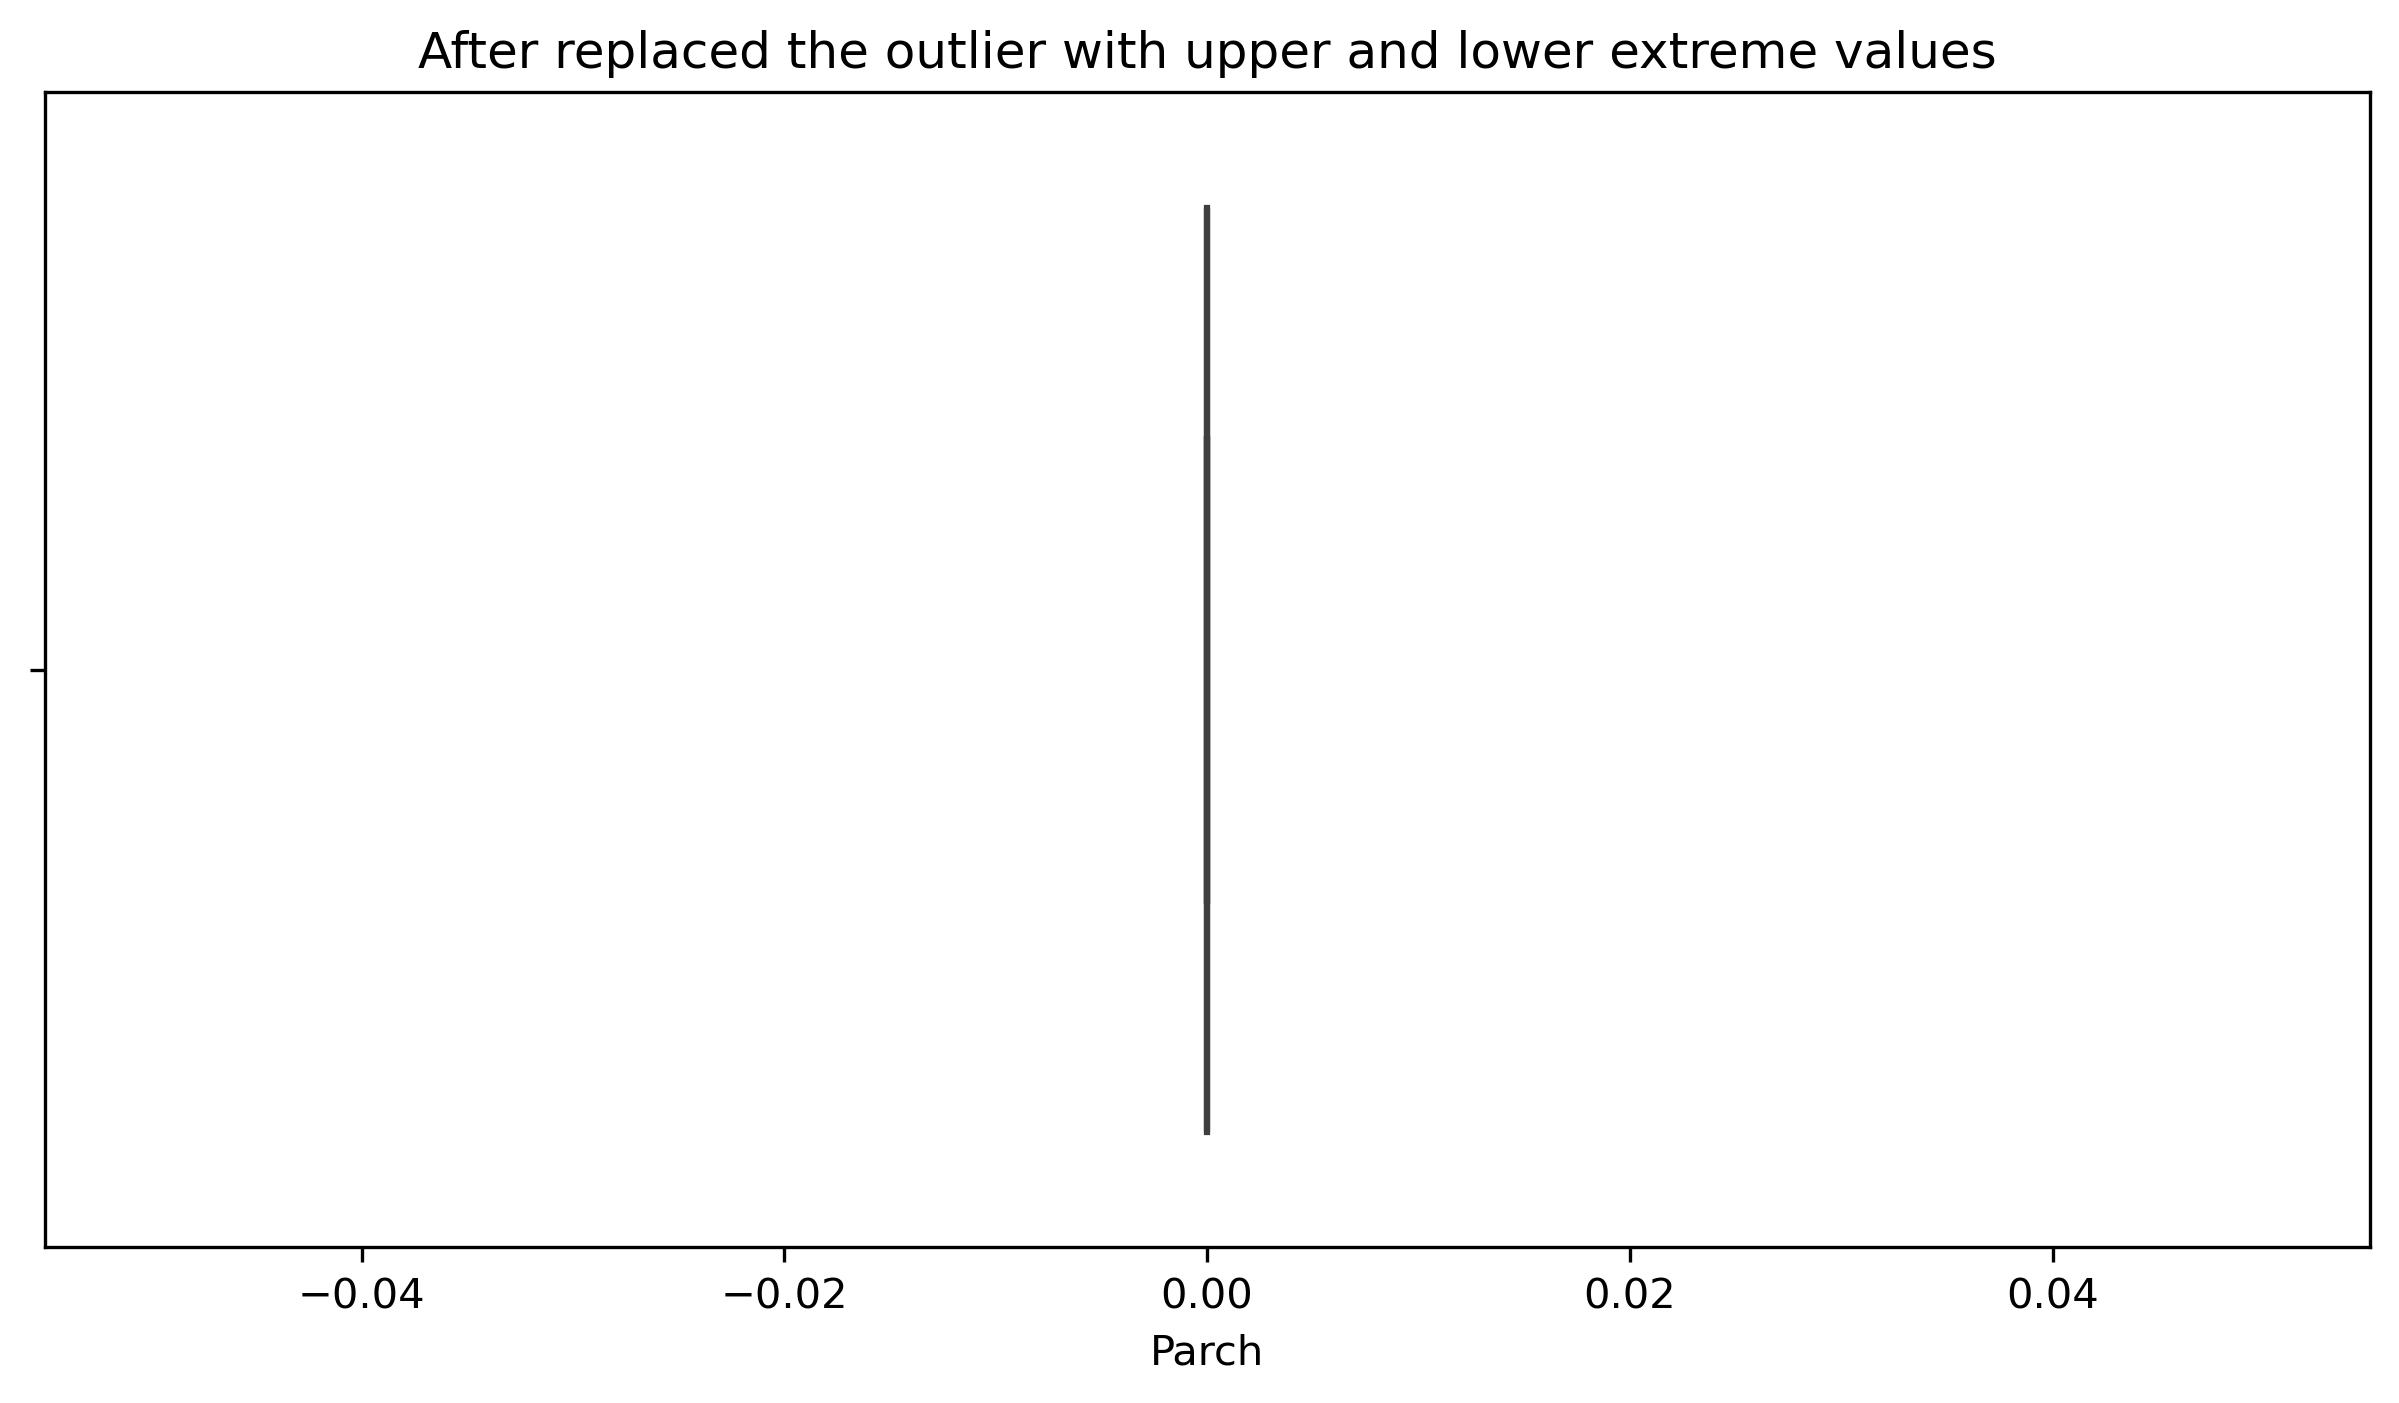

In [85]:
sns.boxplot(x = train["Parch"])
plt.xlabel("Parch")
plt.title("After replaced the outlier with upper and lower extreme values")

In [87]:
outlier_detection(train, "Fare")

(-26.724, 65.6344)

Text(0.5, 1.0, 'Before replaceing the outlier with upper and lower extreme values')

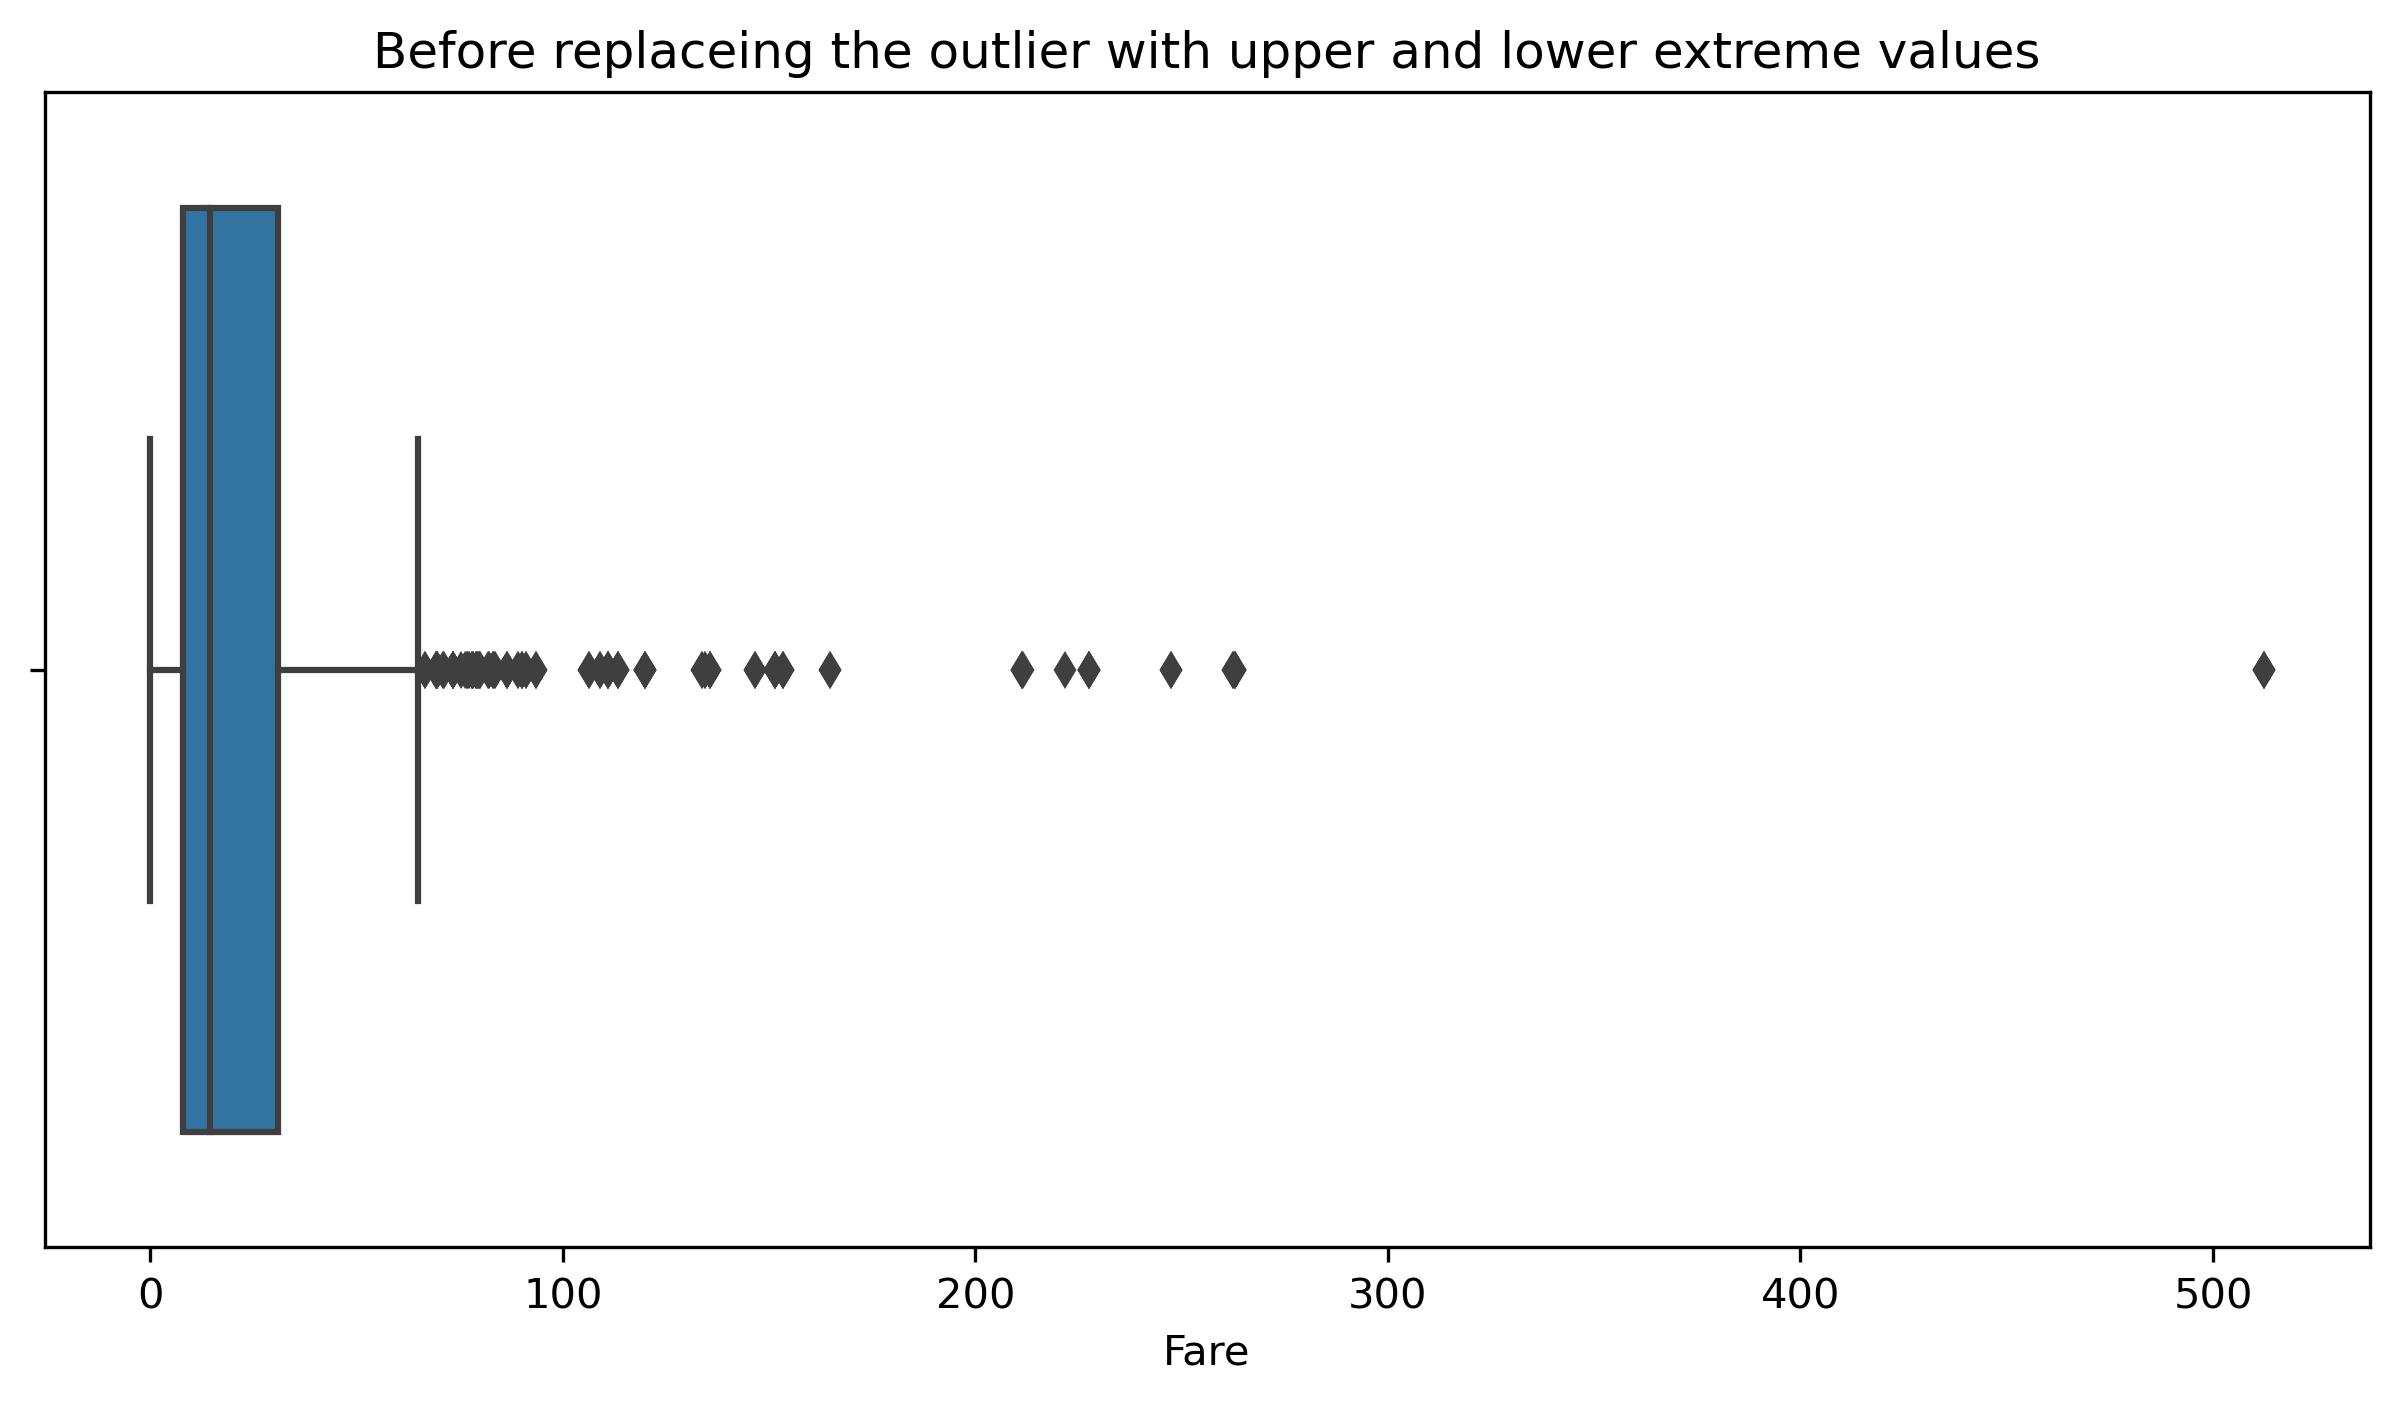

In [88]:
sns.boxplot(x = train["Fare"])
plt.xlabel("Fare")
plt.title("Before replaceing the outlier with upper and lower extreme values")

In [91]:
train.loc[train["Fare"]>65.6344, "Fare"] = 65.6344

Text(0.5, 1.0, 'After replaced the outlier with upper and lower extreme values')

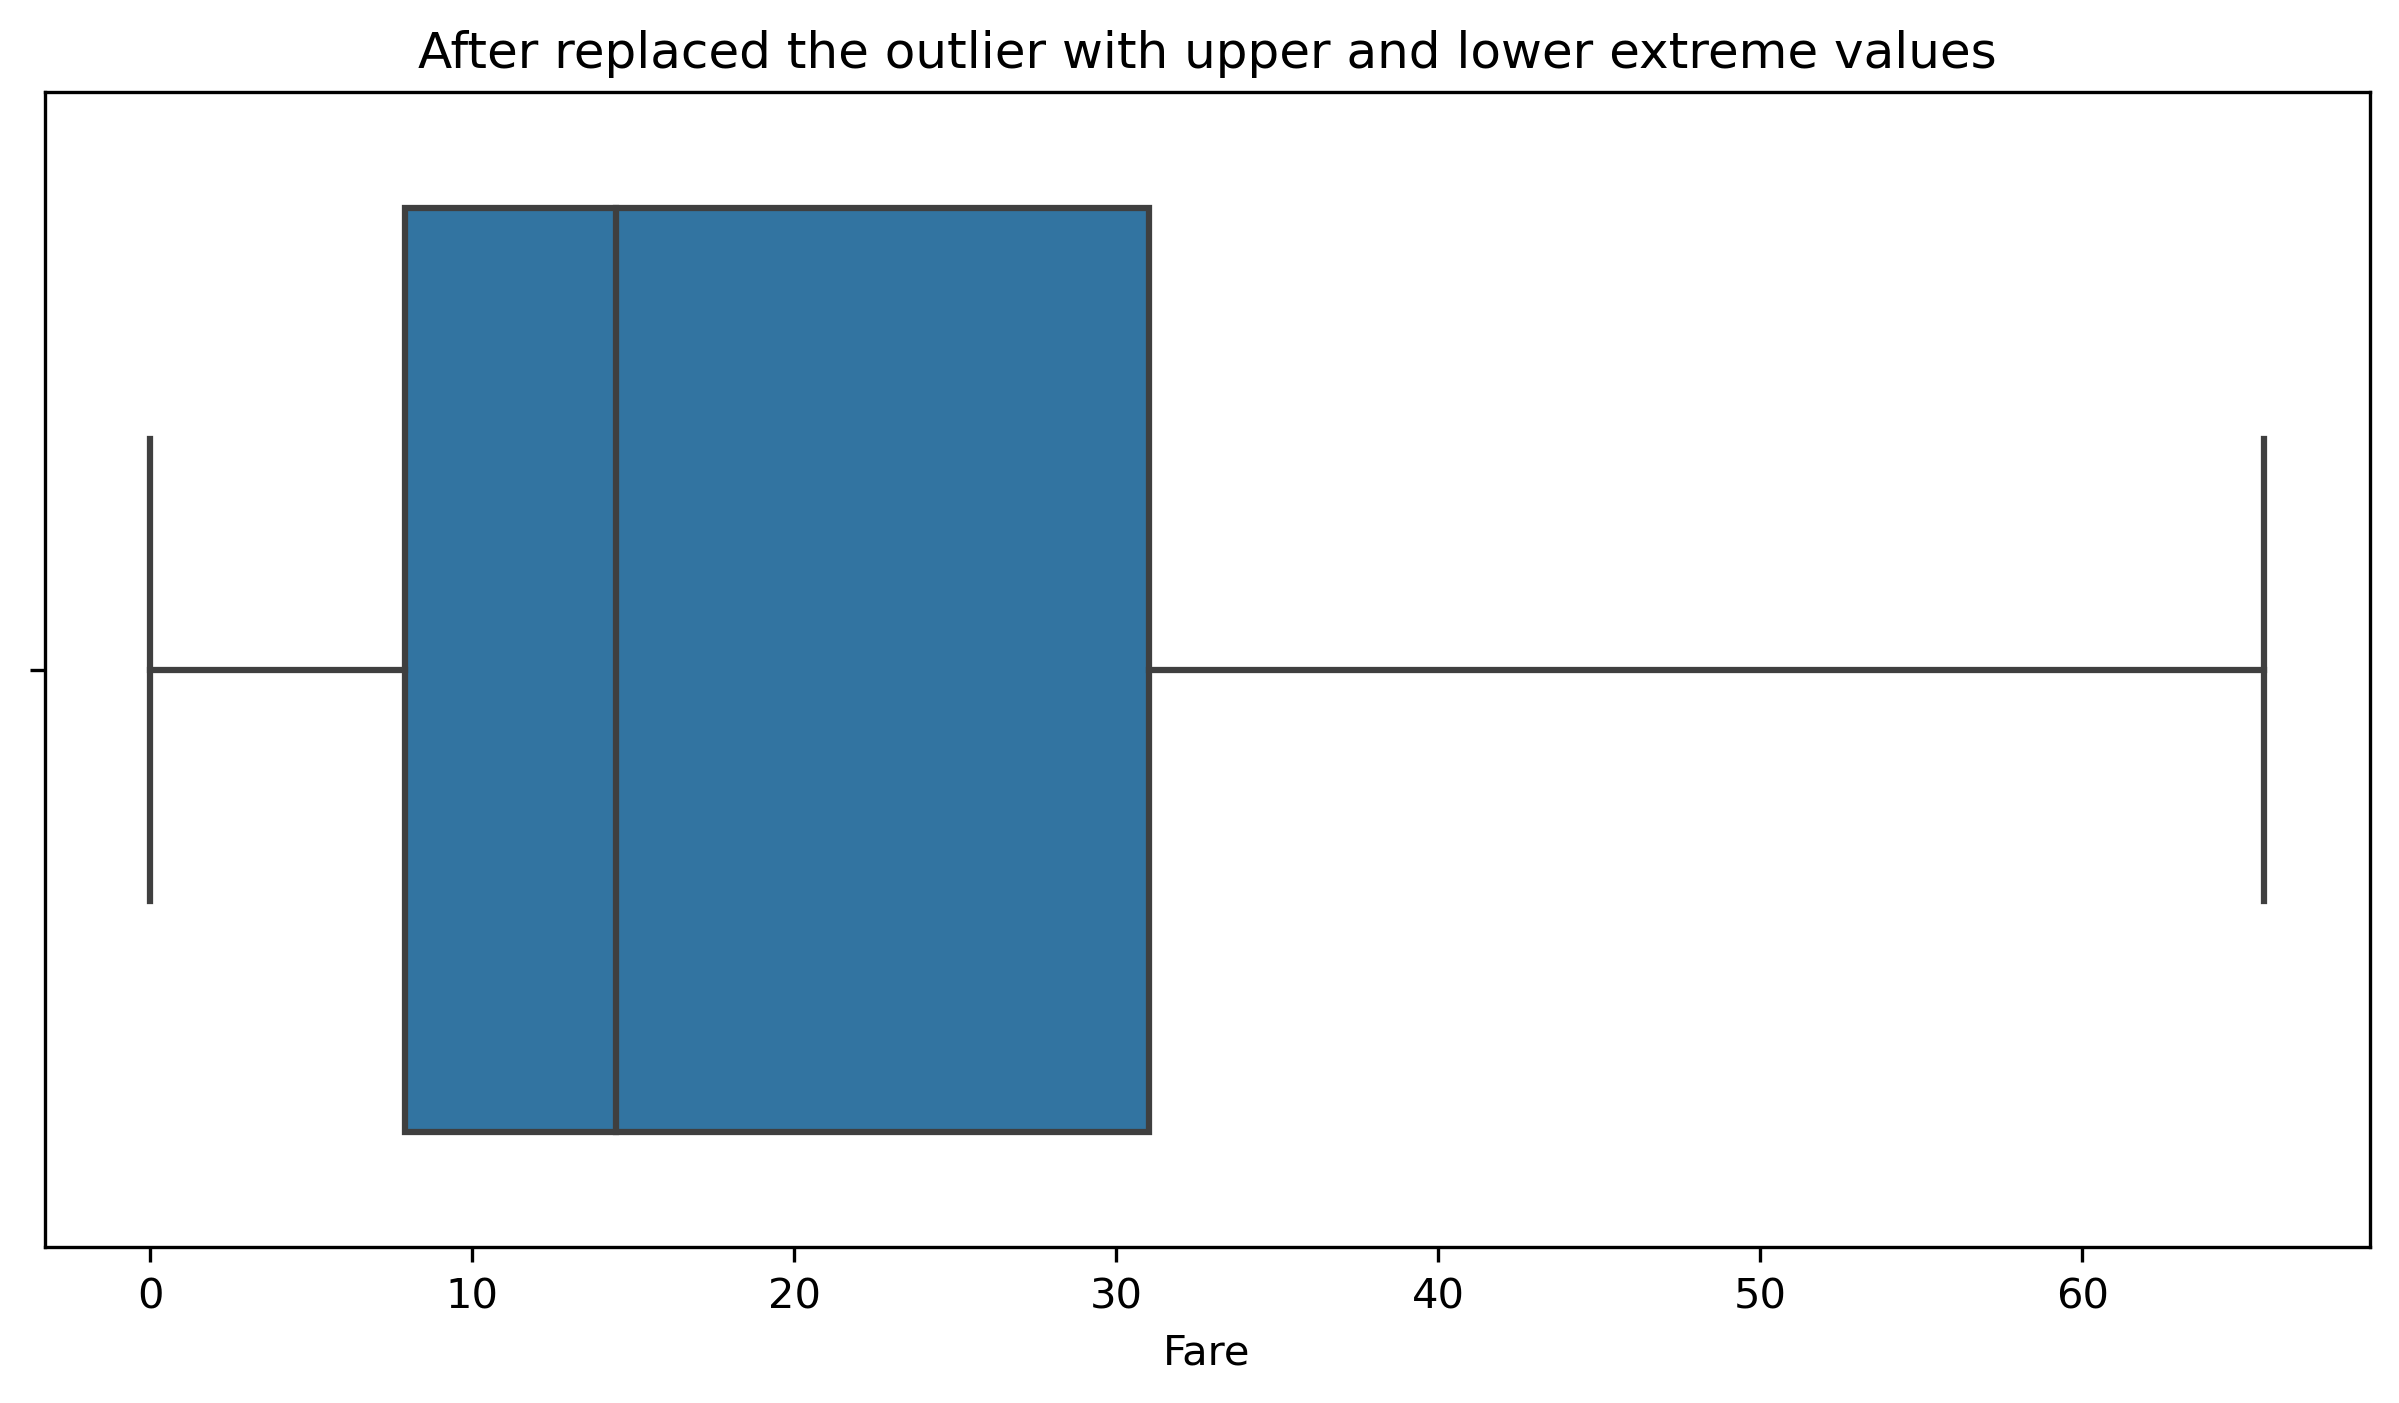

In [92]:
sns.boxplot(x = train["Fare"])
plt.xlabel("Fare")
plt.title("After replaced the outlier with upper and lower extreme values")

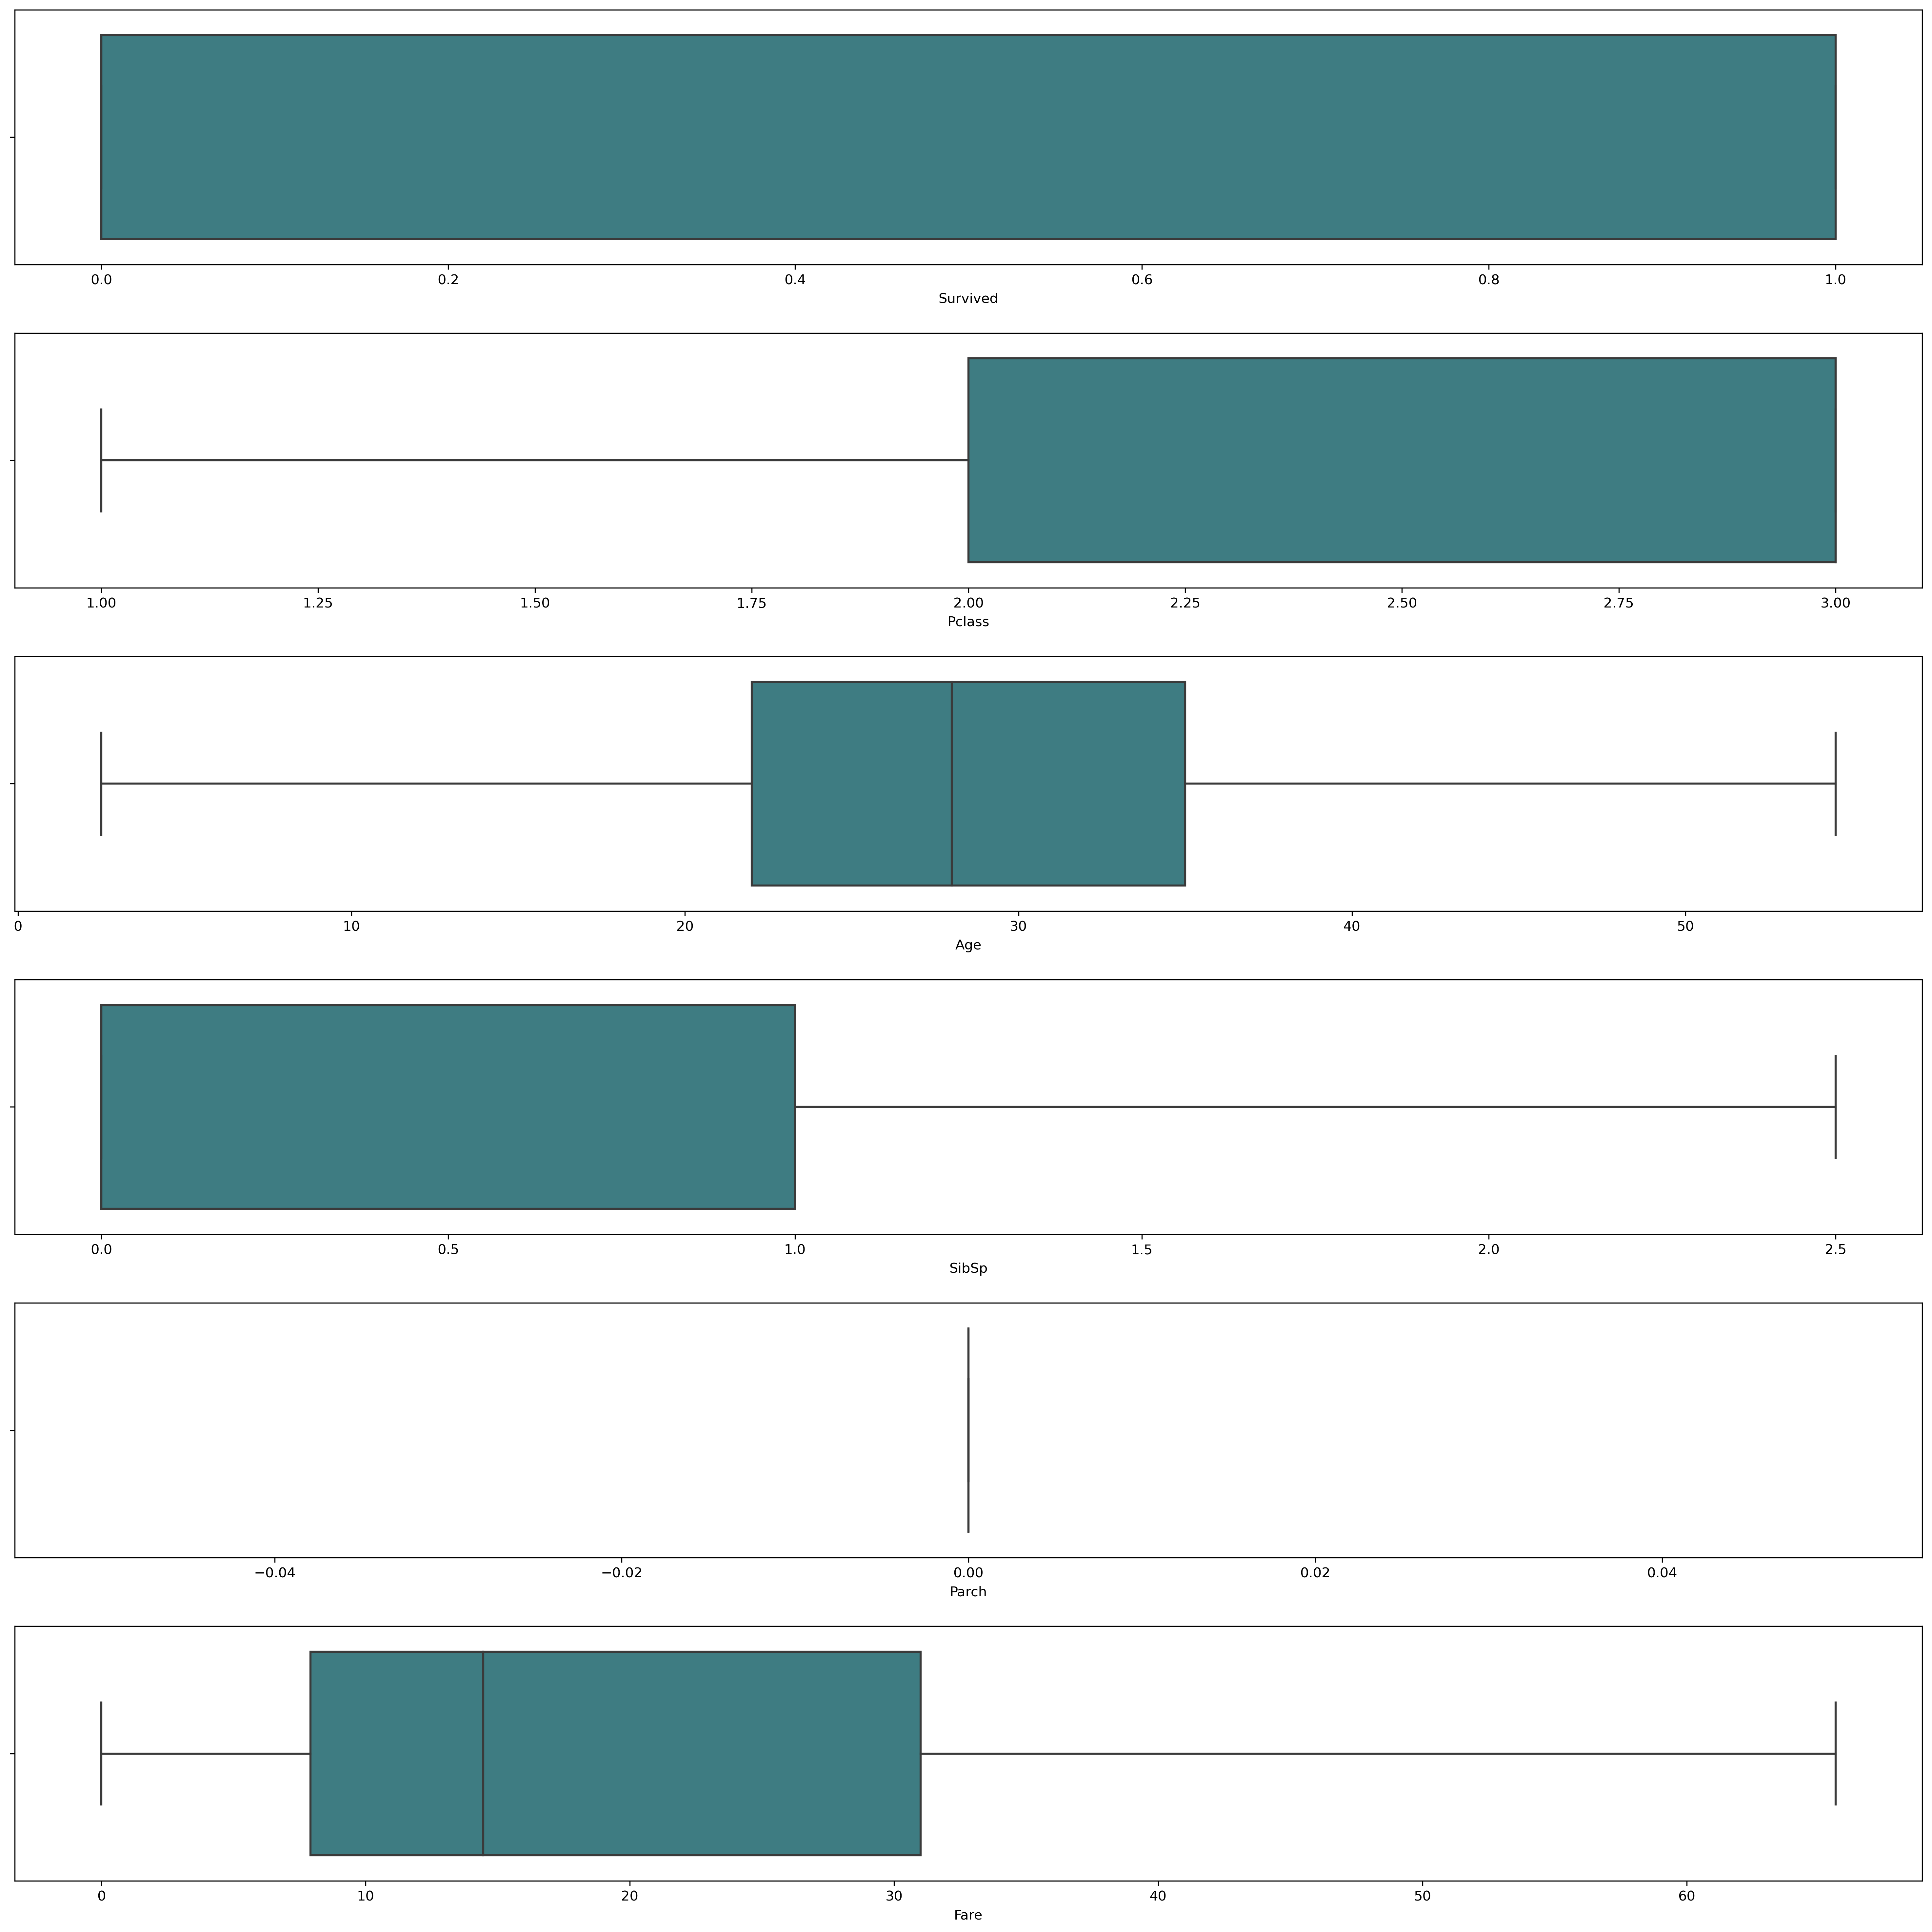

In [93]:
ot = train.copy()
fig, axes=plt.subplots(6,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='Survived',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Pclass',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='SibSp',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Parch',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Fare',data=ot,palette='crest',ax=axes[5])
plt.tight_layout(pad=2.0)

# Test data Outlier detection

In [94]:
test.describe()

Pclass         Age       SibSp       Parch        Fare
count  417.000000  417.000000  417.000000  417.000000  417.000000
mean     2.263789   29.525180    0.448441    0.393285   35.627188
std      0.842077   12.628258    0.897568    0.982419   55.907576
min      1.000000    0.170000    0.000000    0.000000    0.000000
25%      1.000000   23.000000    0.000000    0.000000    7.895800
50%      3.000000   27.000000    0.000000    0.000000   14.454200
75%      3.000000   35.000000    1.000000    0.000000   31.500000
max      3.000000   76.000000    8.000000    9.000000  512.329200

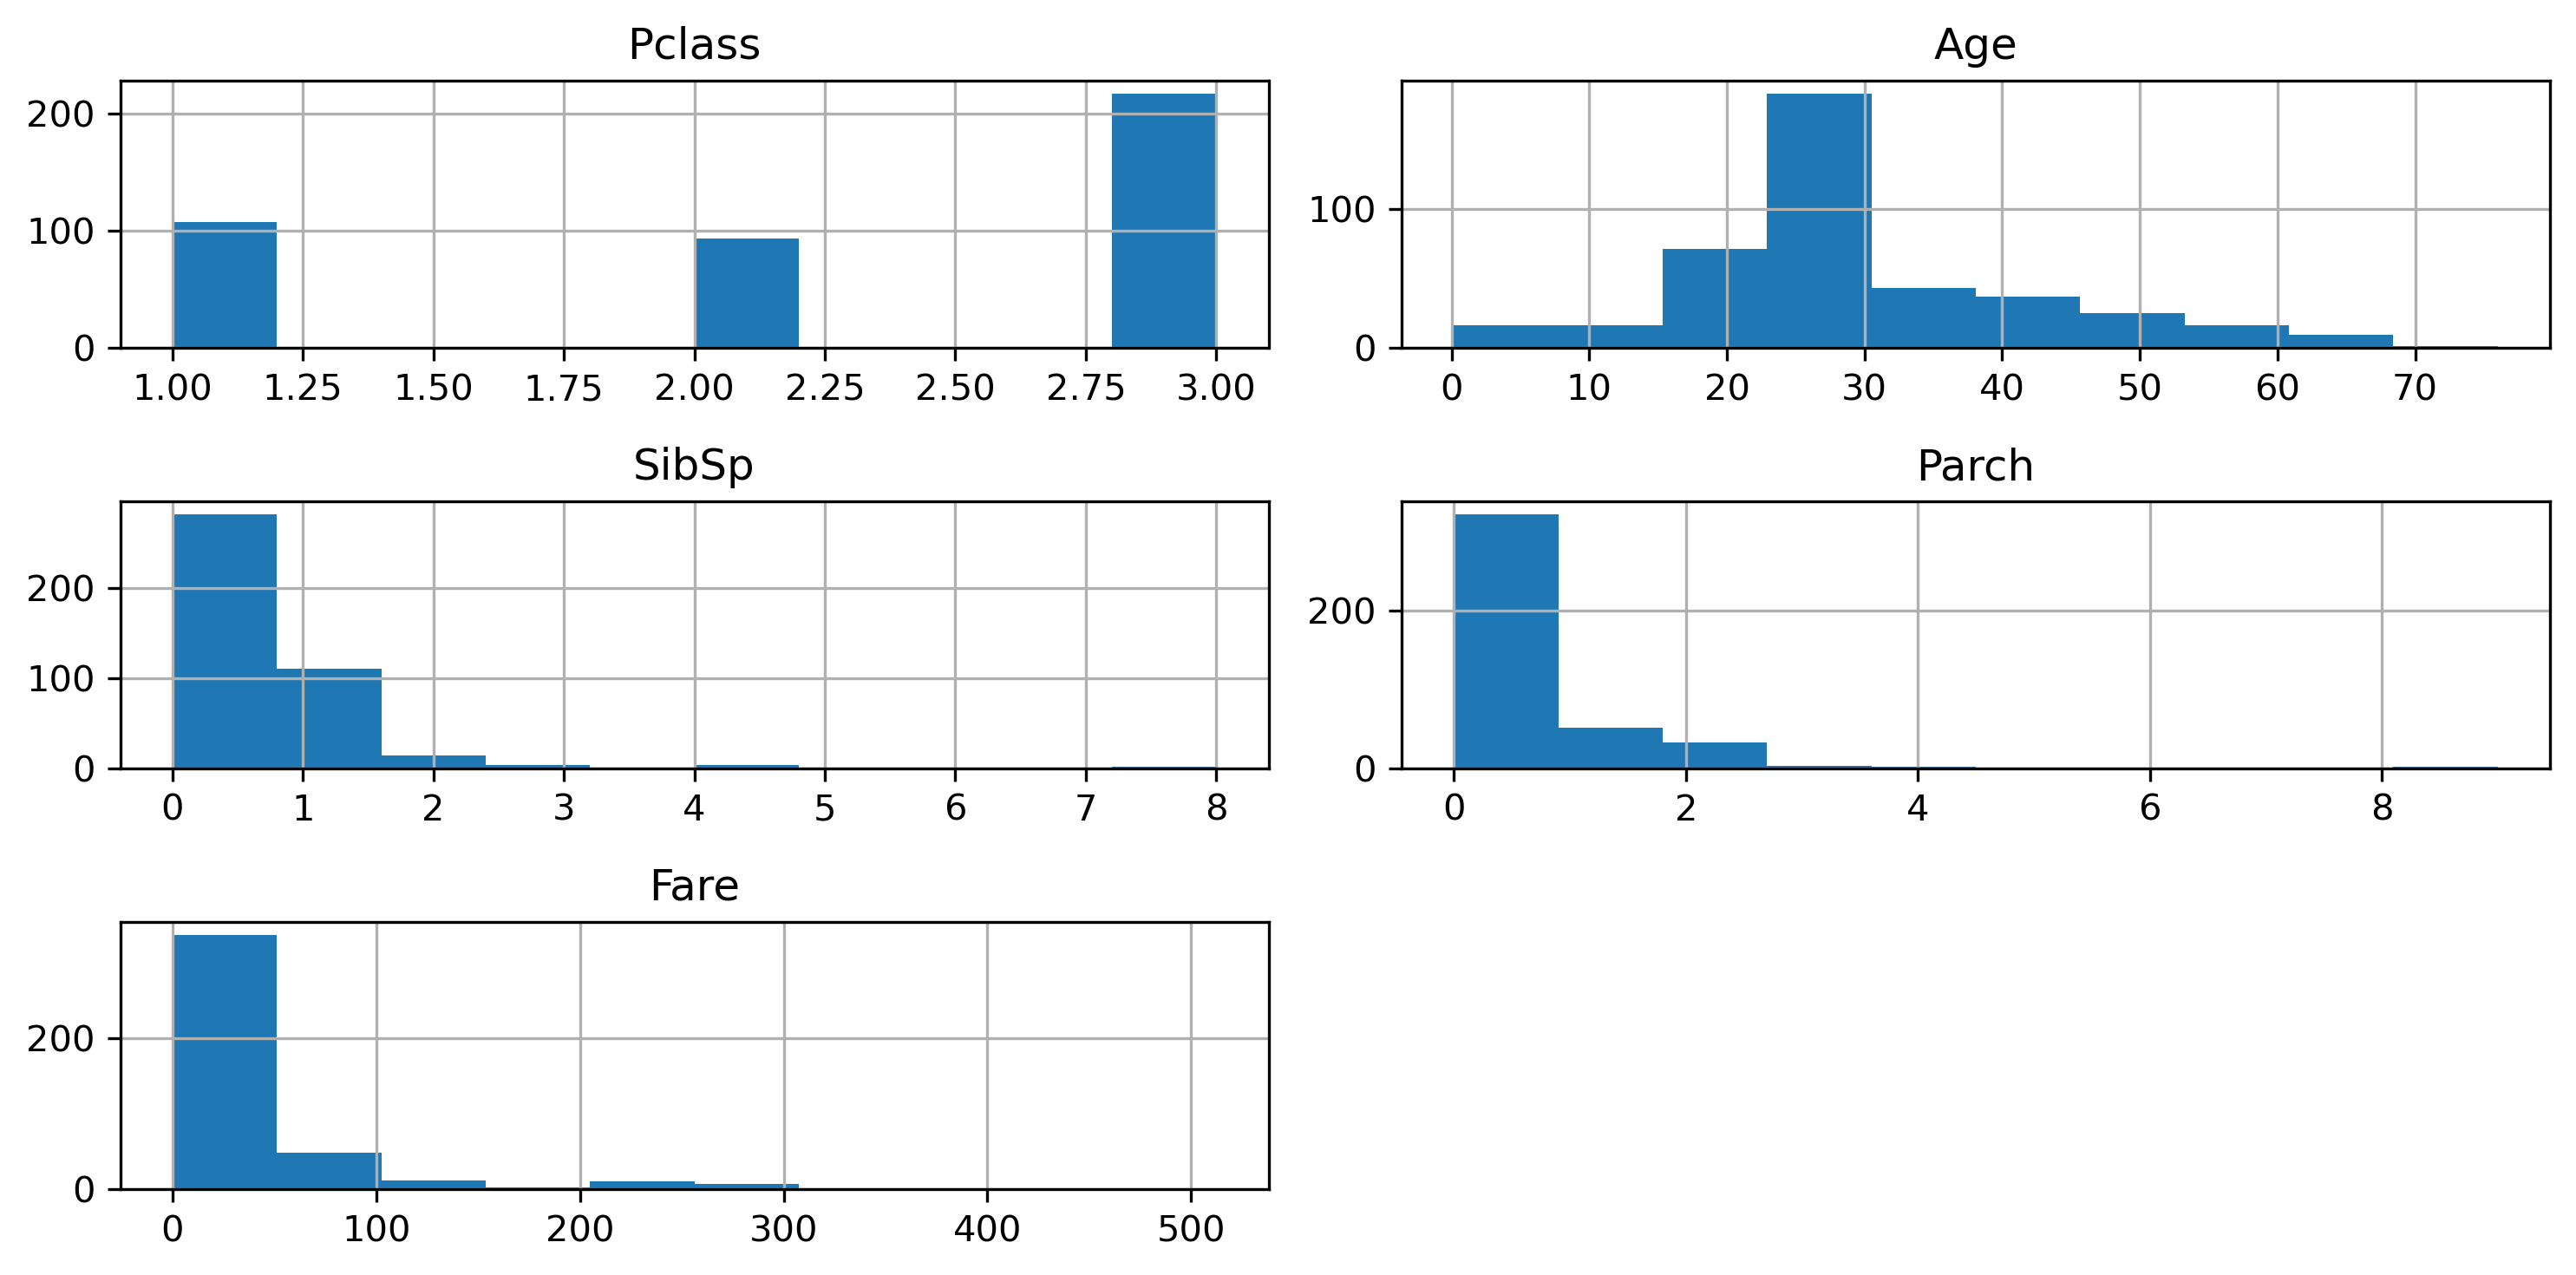

In [96]:
test.hist()
plt.tight_layout()

<Axes: >

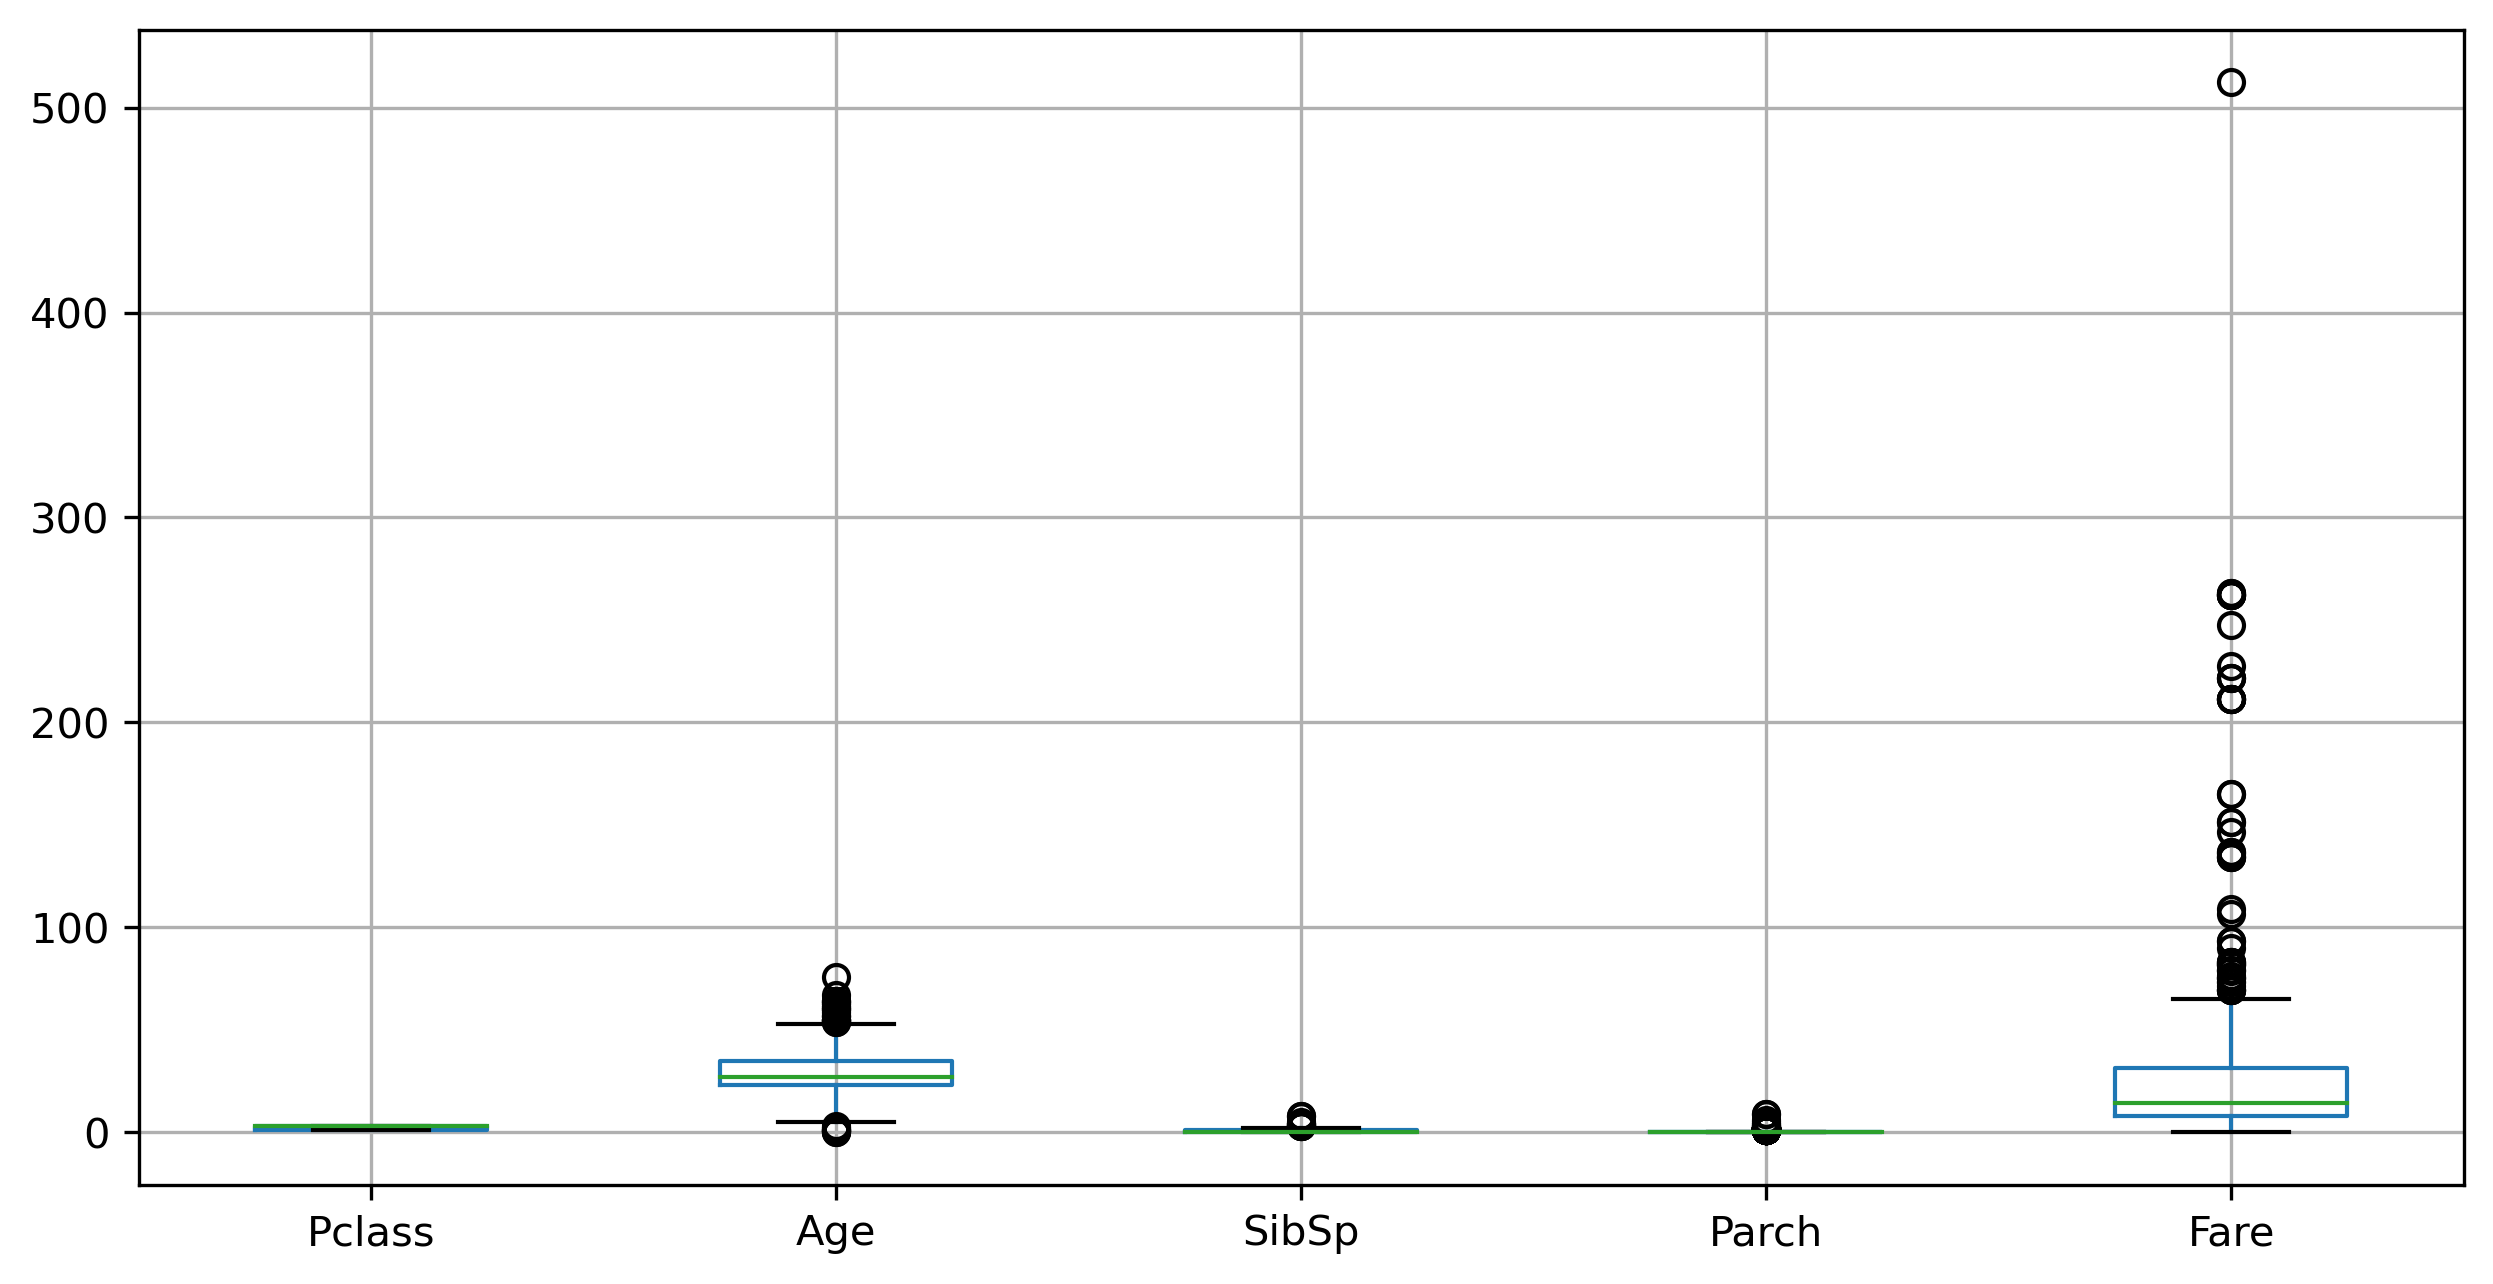

In [97]:
test.boxplot()

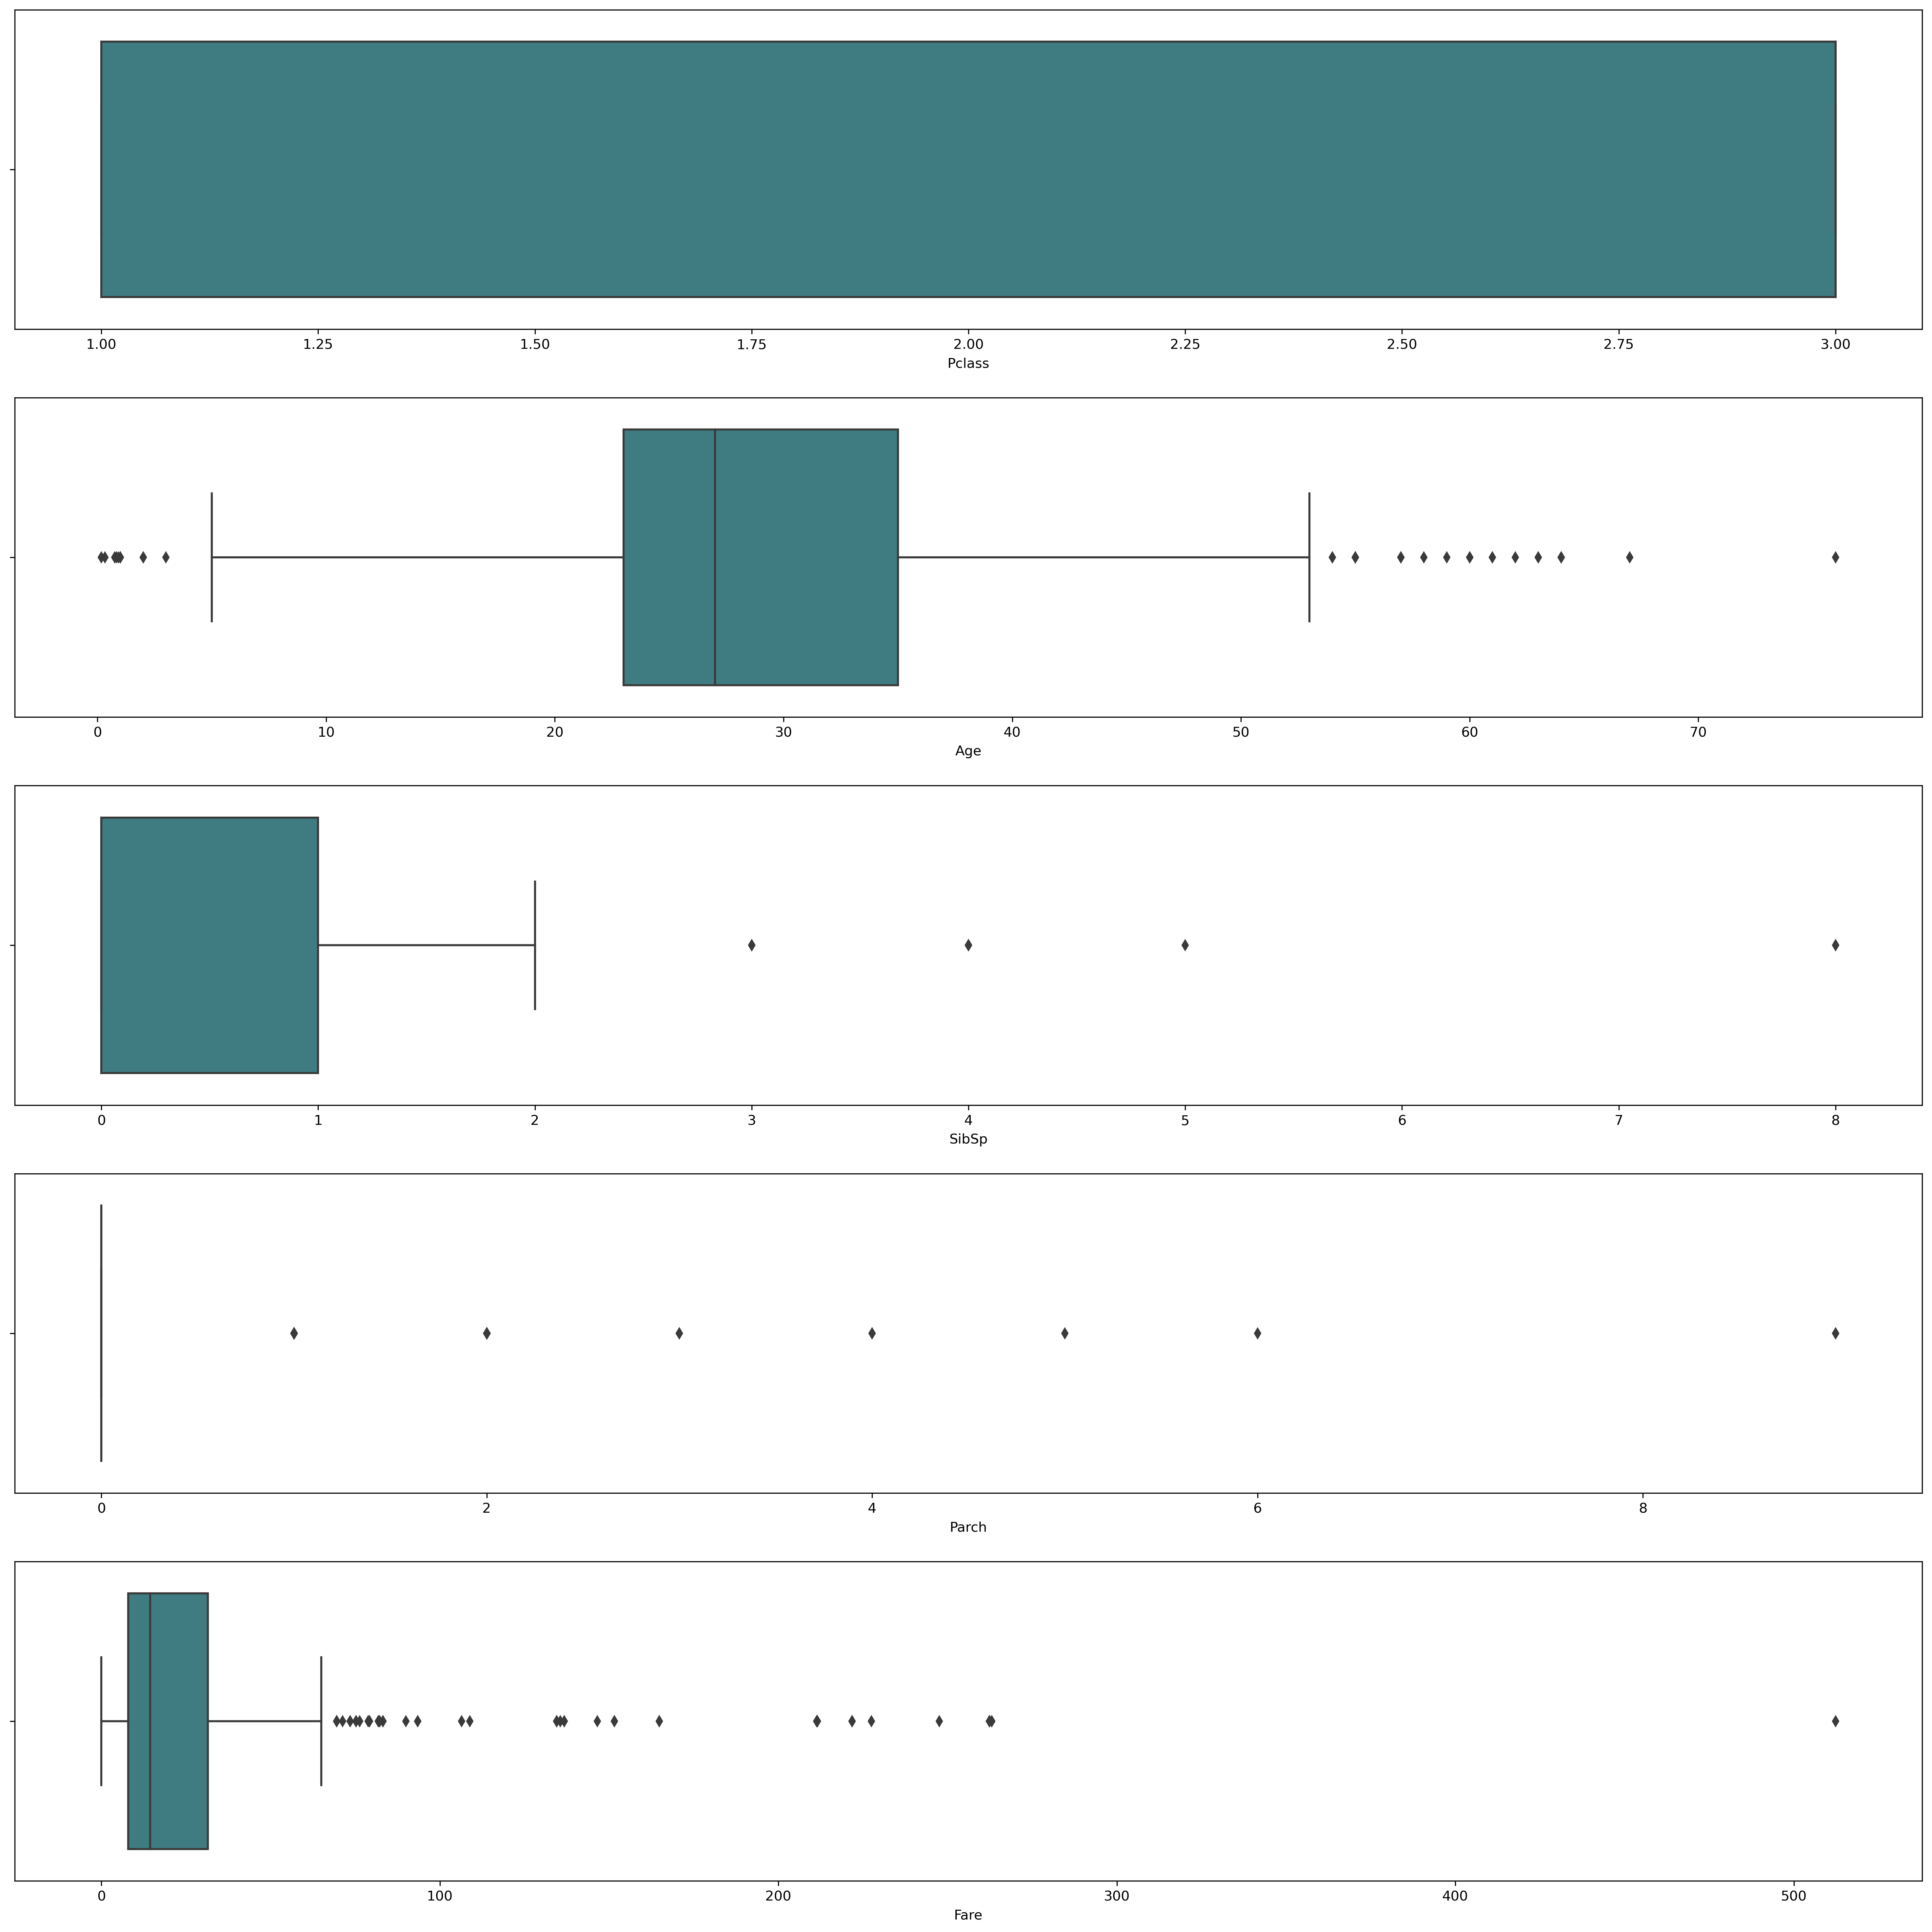

In [98]:
ot = test.copy()
fig, axes=plt.subplots(5,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='Pclass',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='SibSp',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Parch',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Fare',data=ot,palette='crest',ax=axes[4])
plt.tight_layout(pad=2.0)

In [99]:
outlier_detection(test, "Age")

(5.0, 53.0)

Text(0.5, 1.0, 'Before replacing the outlier with upper and lower values')

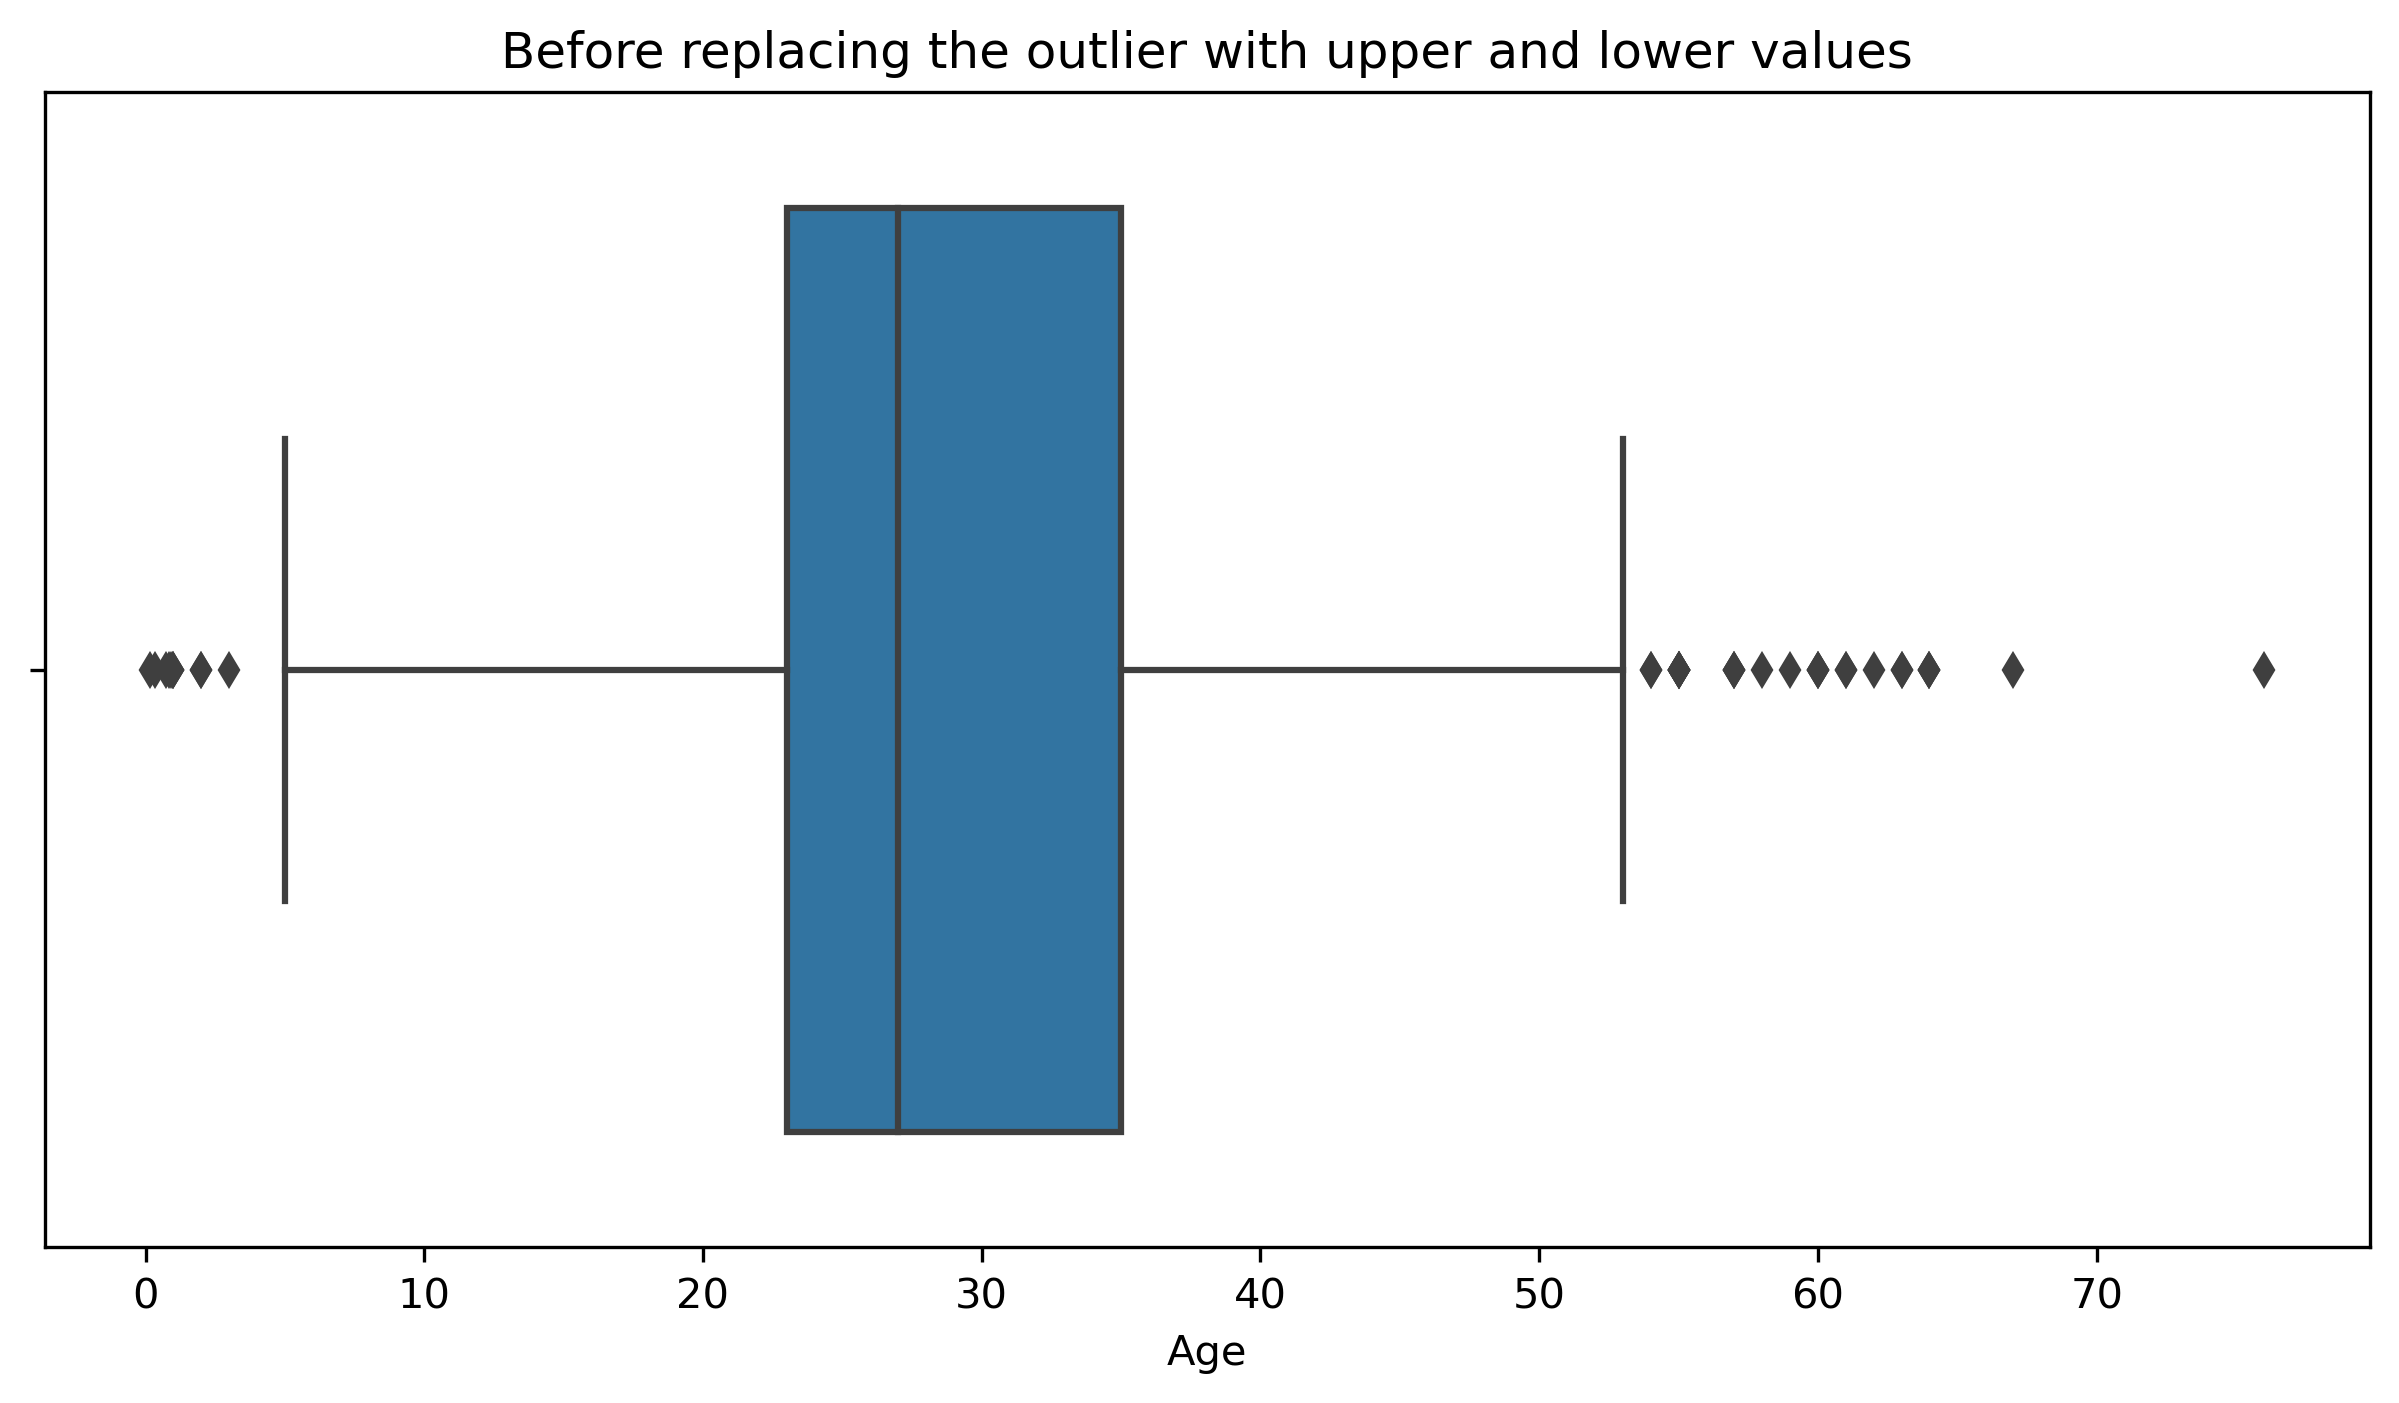

In [100]:
sns.boxplot(x = test["Age"])
plt.xlabel("Age")
plt.title("Before replacing the outlier with upper and lower values")

In [102]:
test.loc[test["Age"]>53.0, "Age"] = 53.0

In [103]:
test.loc[test["Age"]<5.0, "Age"] = 5.0

Text(0.5, 1.0, 'After replaced the outlier with upper and lower values')

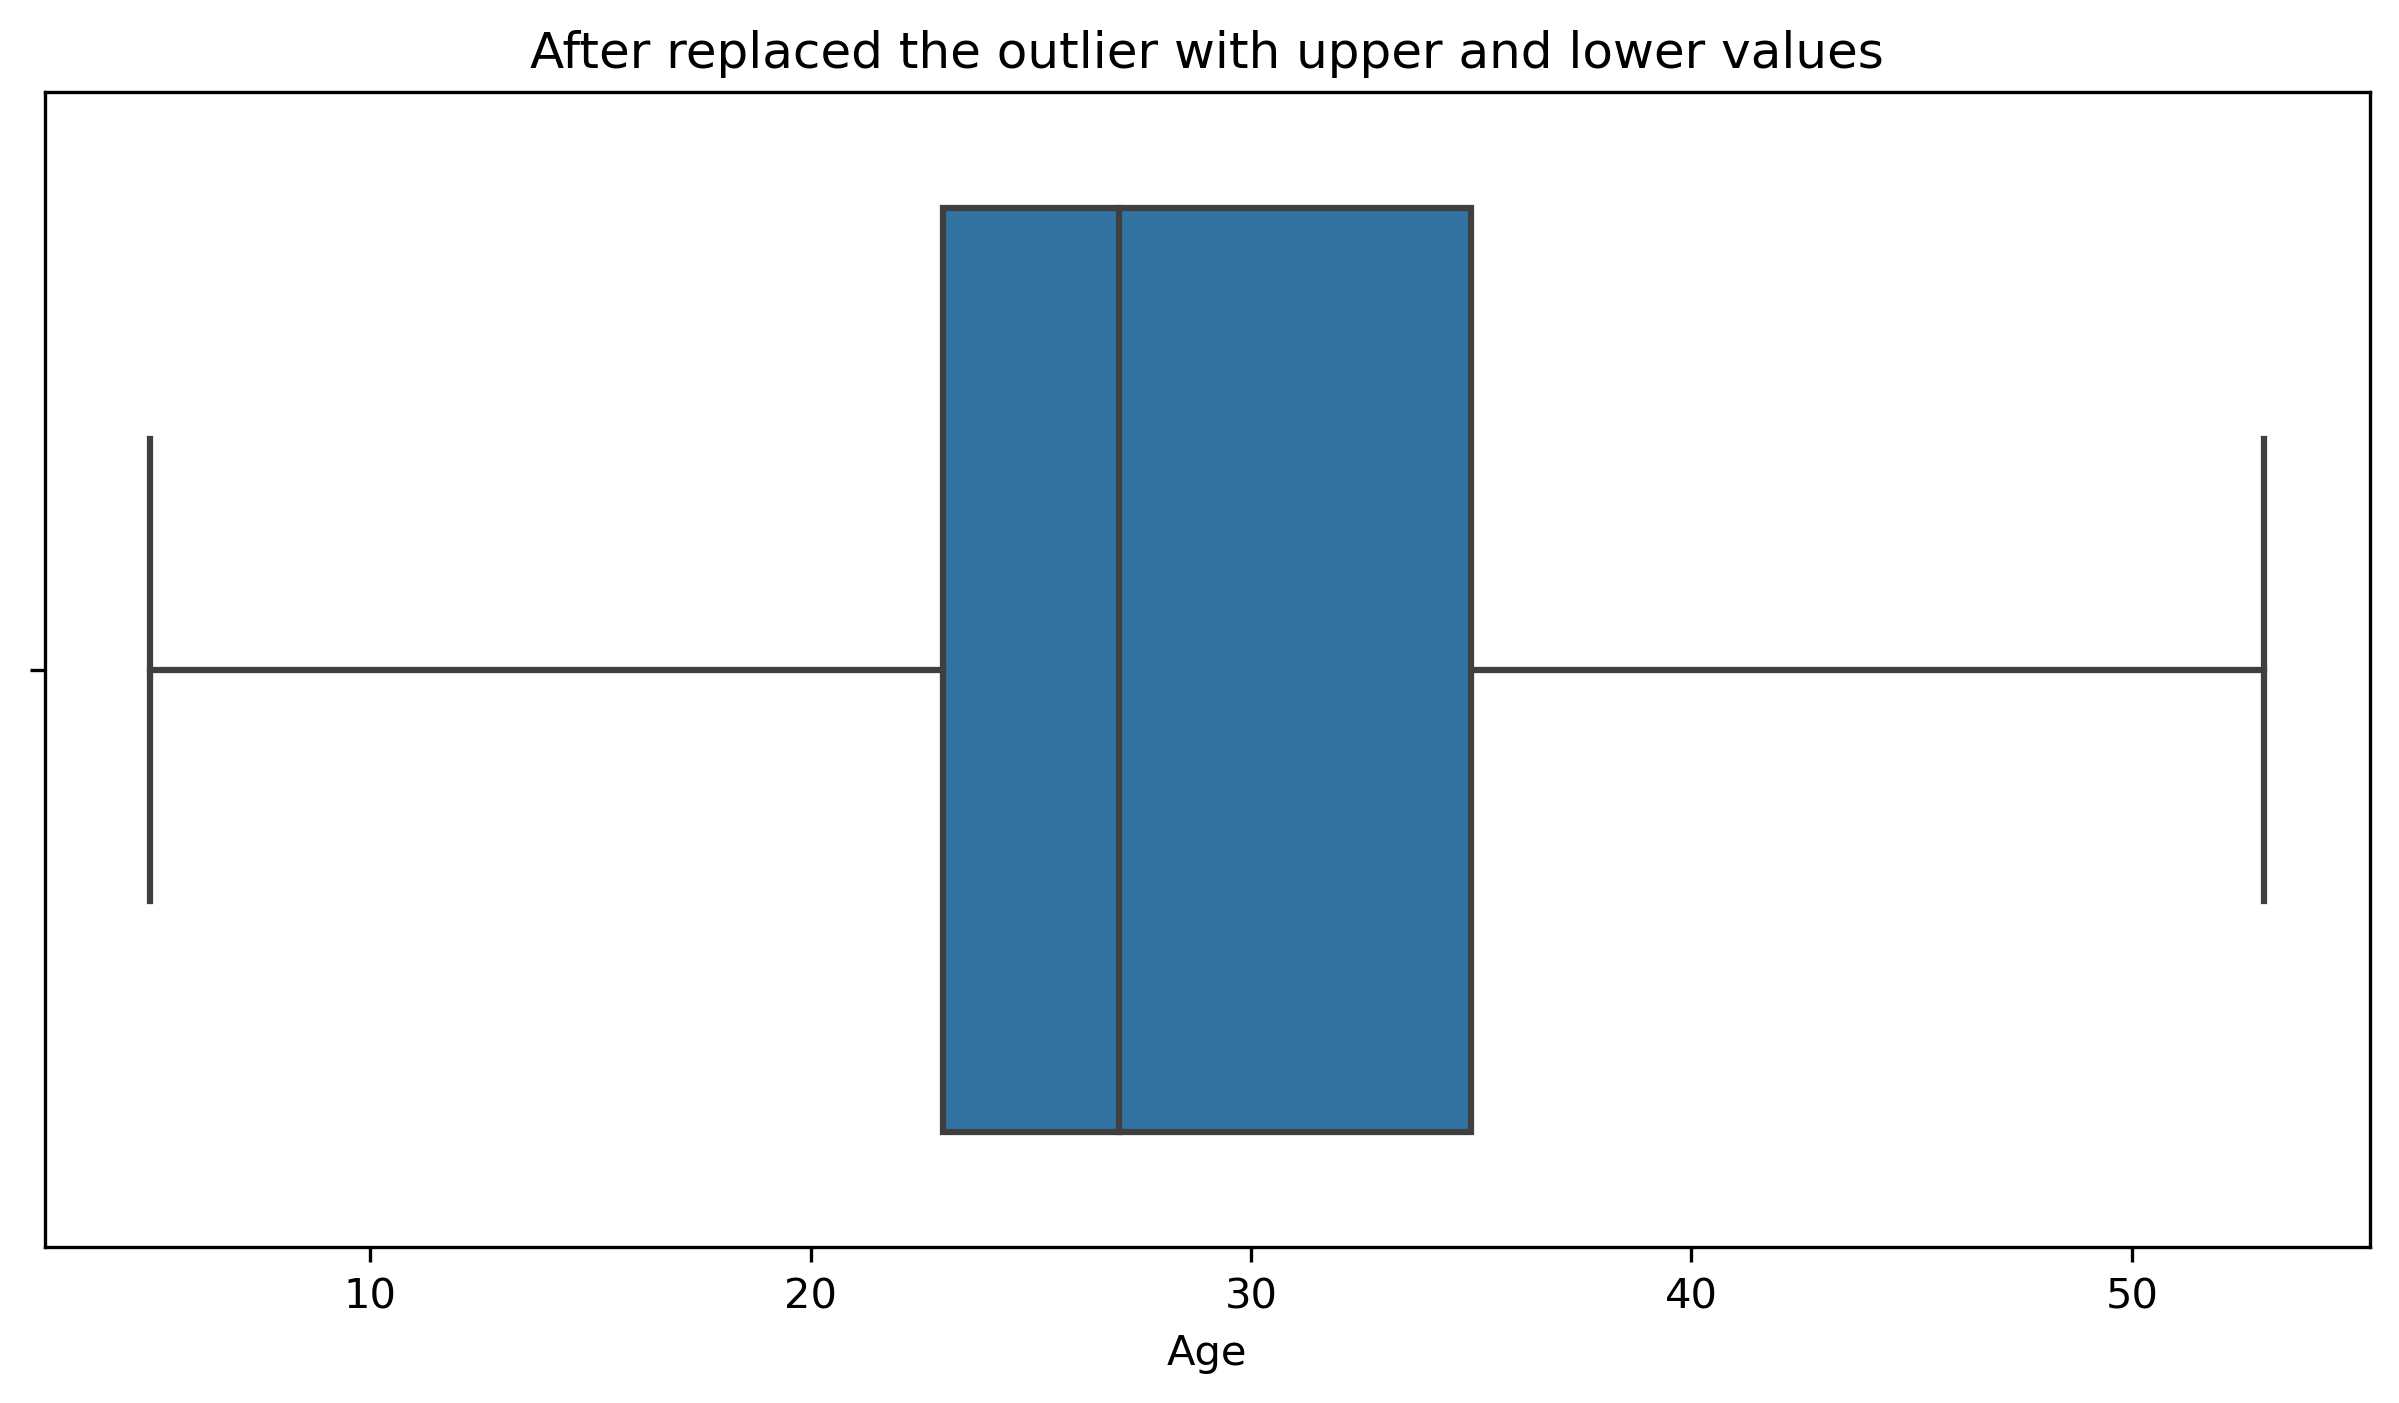

In [104]:
sns.boxplot(x = test["Age"])
plt.xlabel("Age")
plt.title("After replaced the outlier with upper and lower values")

In [107]:
outlier_detection(test, "SibSp")

(-1.5, 2.5)

Text(0.5, 1.0, 'Before replacing the outlier with upper and lower values')

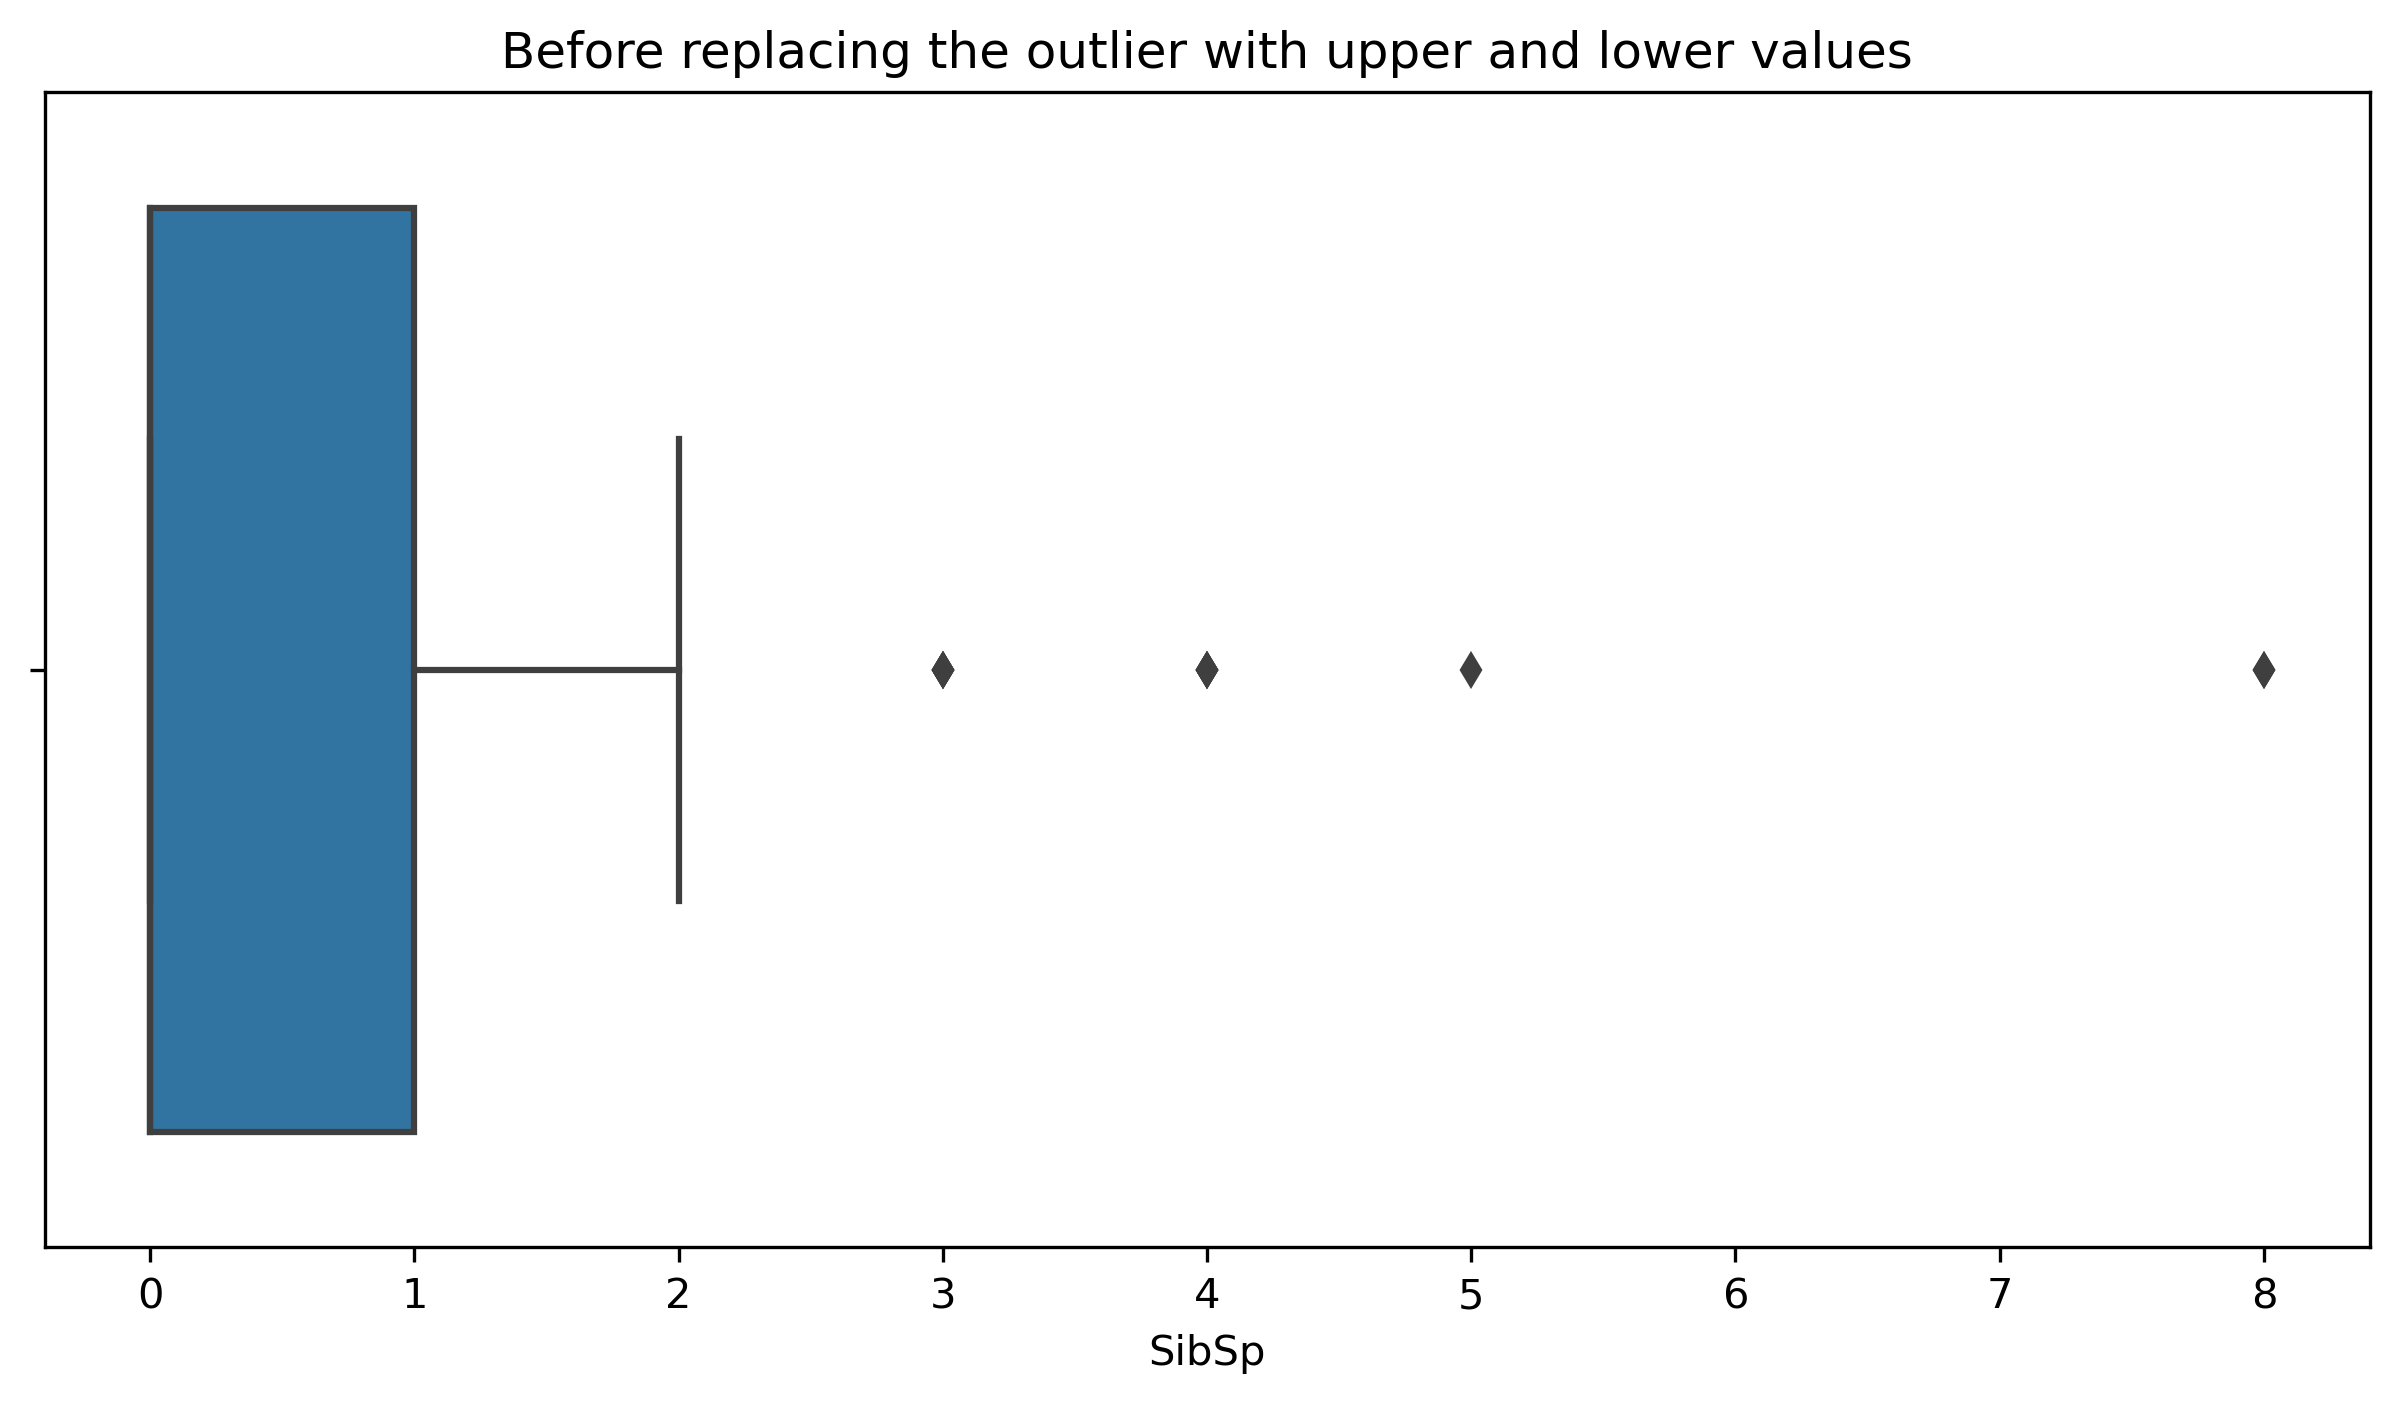

In [108]:
sns.boxplot(x = test["SibSp"])
plt.xlabel("SibSp")
plt.title("Before replacing the outlier with upper and lower values")

In [110]:
test.loc[test["SibSp"]>2.5, "SibSp"] = 2.5

Text(0.5, 1.0, 'After replaced the outlier with upper and lower values')

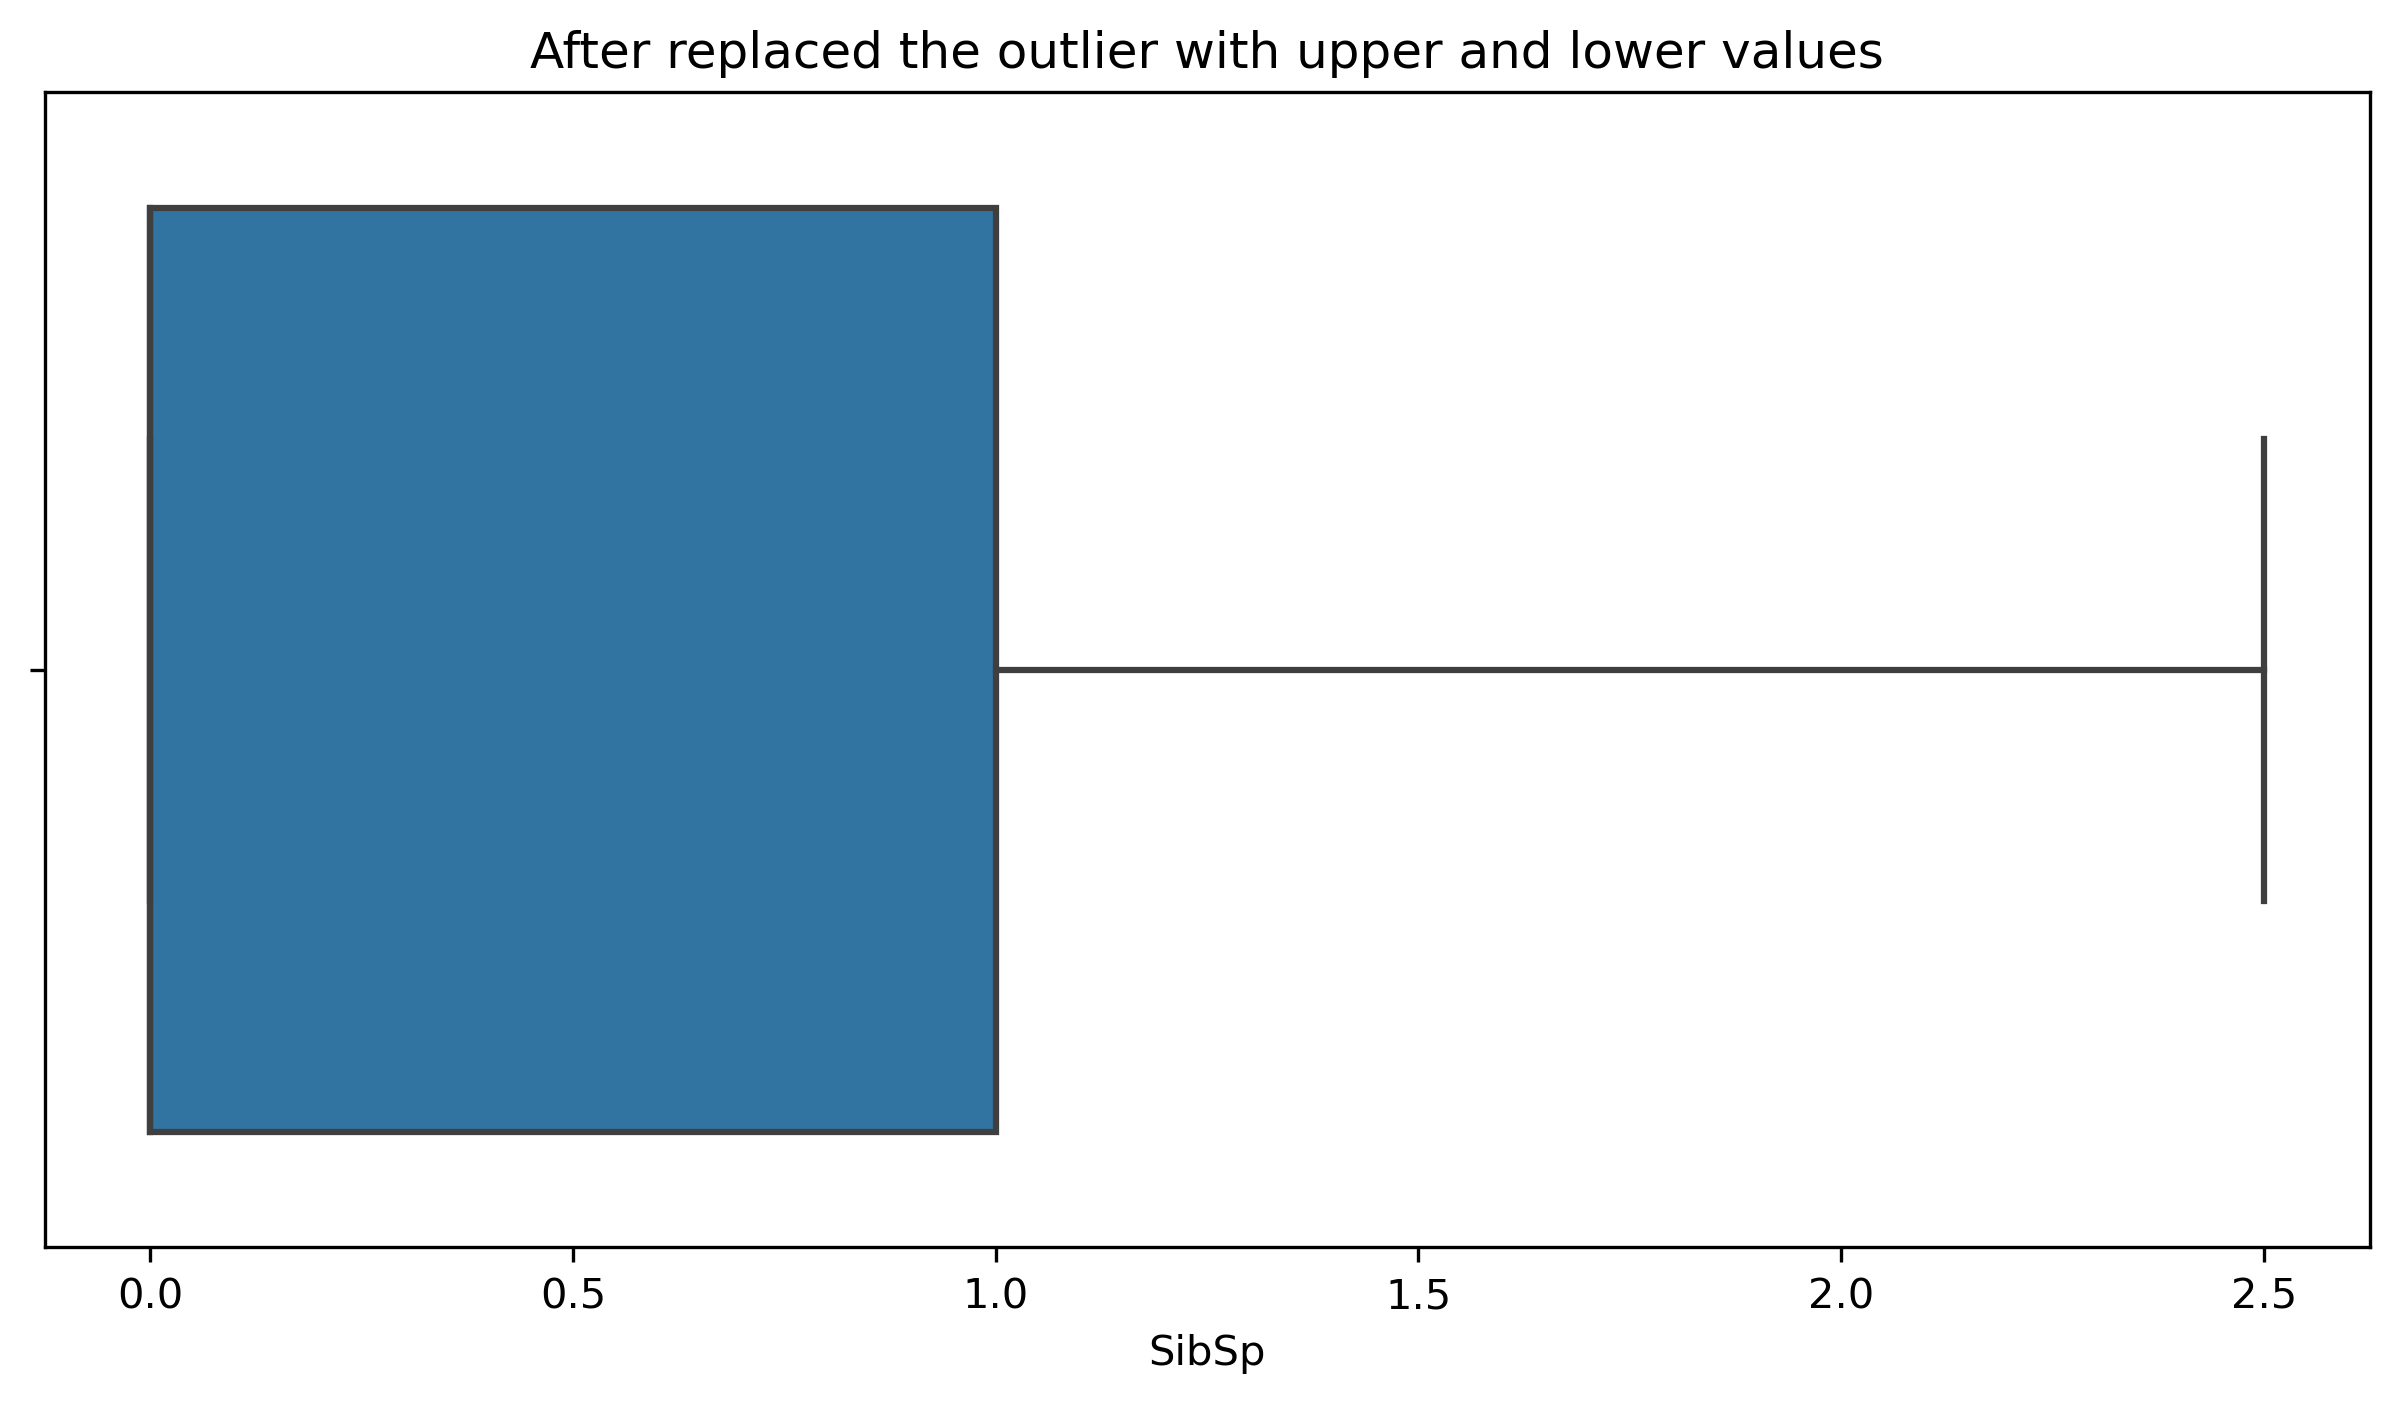

In [111]:
sns.boxplot(x = test["SibSp"])
plt.xlabel("SibSp")
plt.title("After replaced the outlier with upper and lower values")

In [112]:
outlier_detection(test, "Parch")

(0.0, 0.0)

Text(0.5, 1.0, 'Before replacing the outlier with upper and lower values')

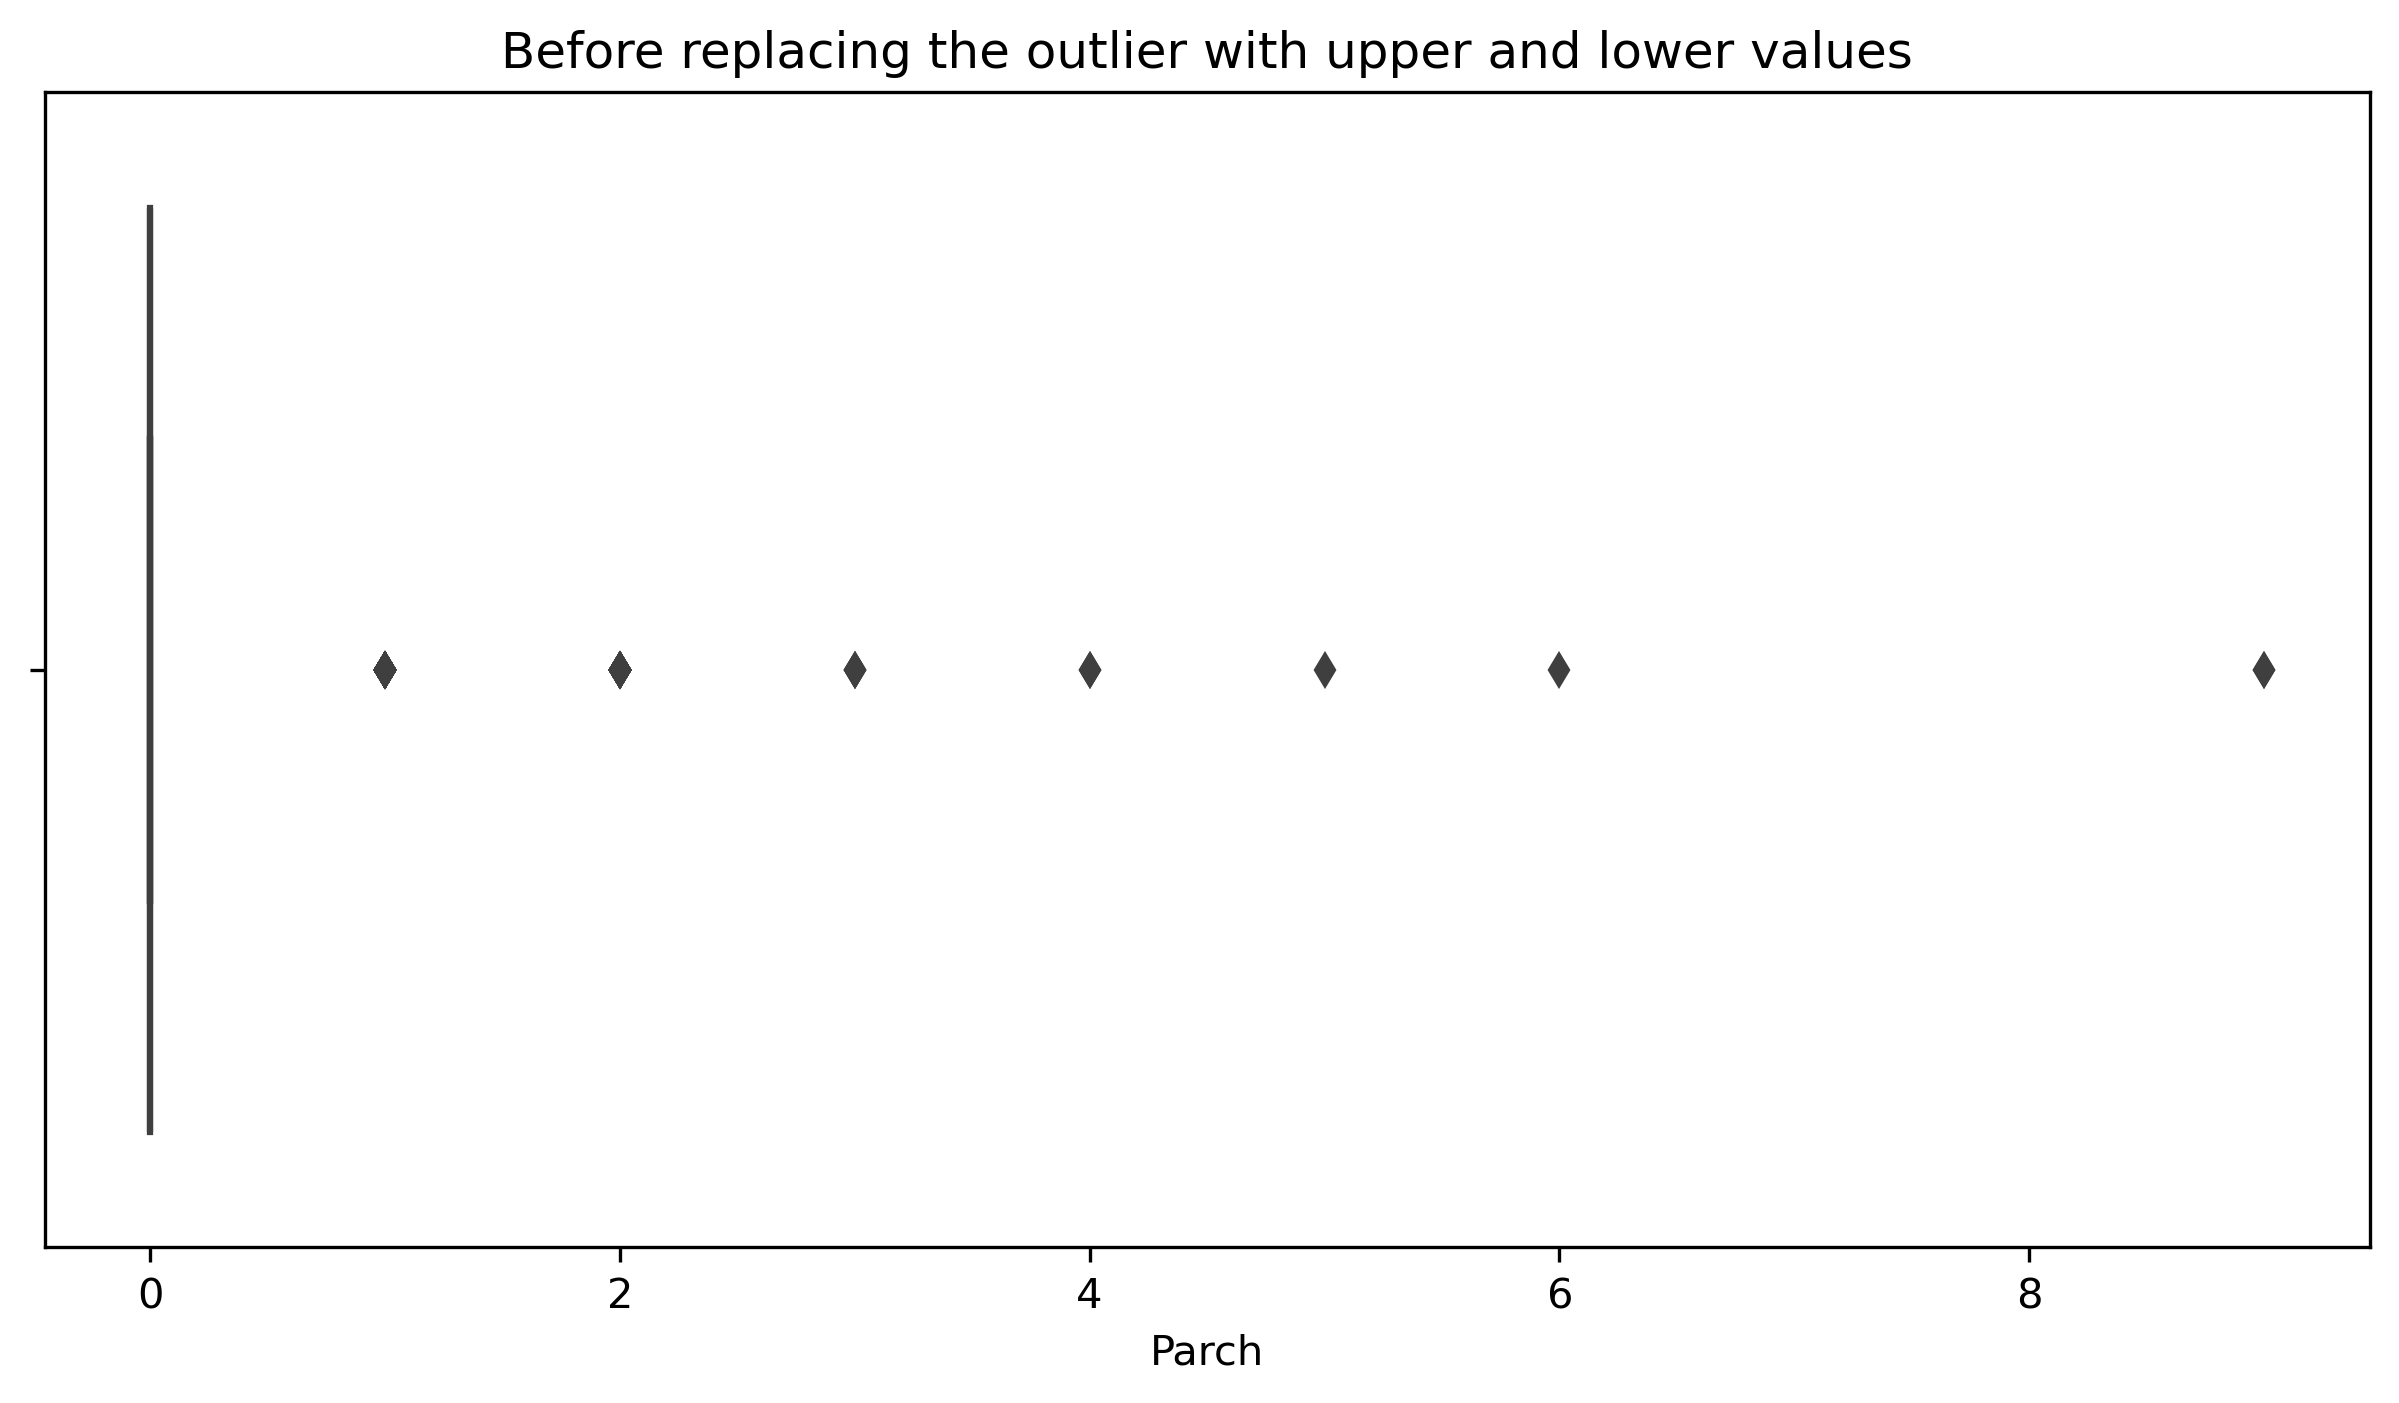

In [113]:
sns.boxplot(x = test["Parch"])
plt.xlabel("Parch")
plt.title("Before replacing the outlier with upper and lower values")

In [114]:
test.loc[test["Parch"]>0.0, "Parch"] = 0.0

Text(0.5, 1.0, 'After replaced the outlier with upper and lower values')

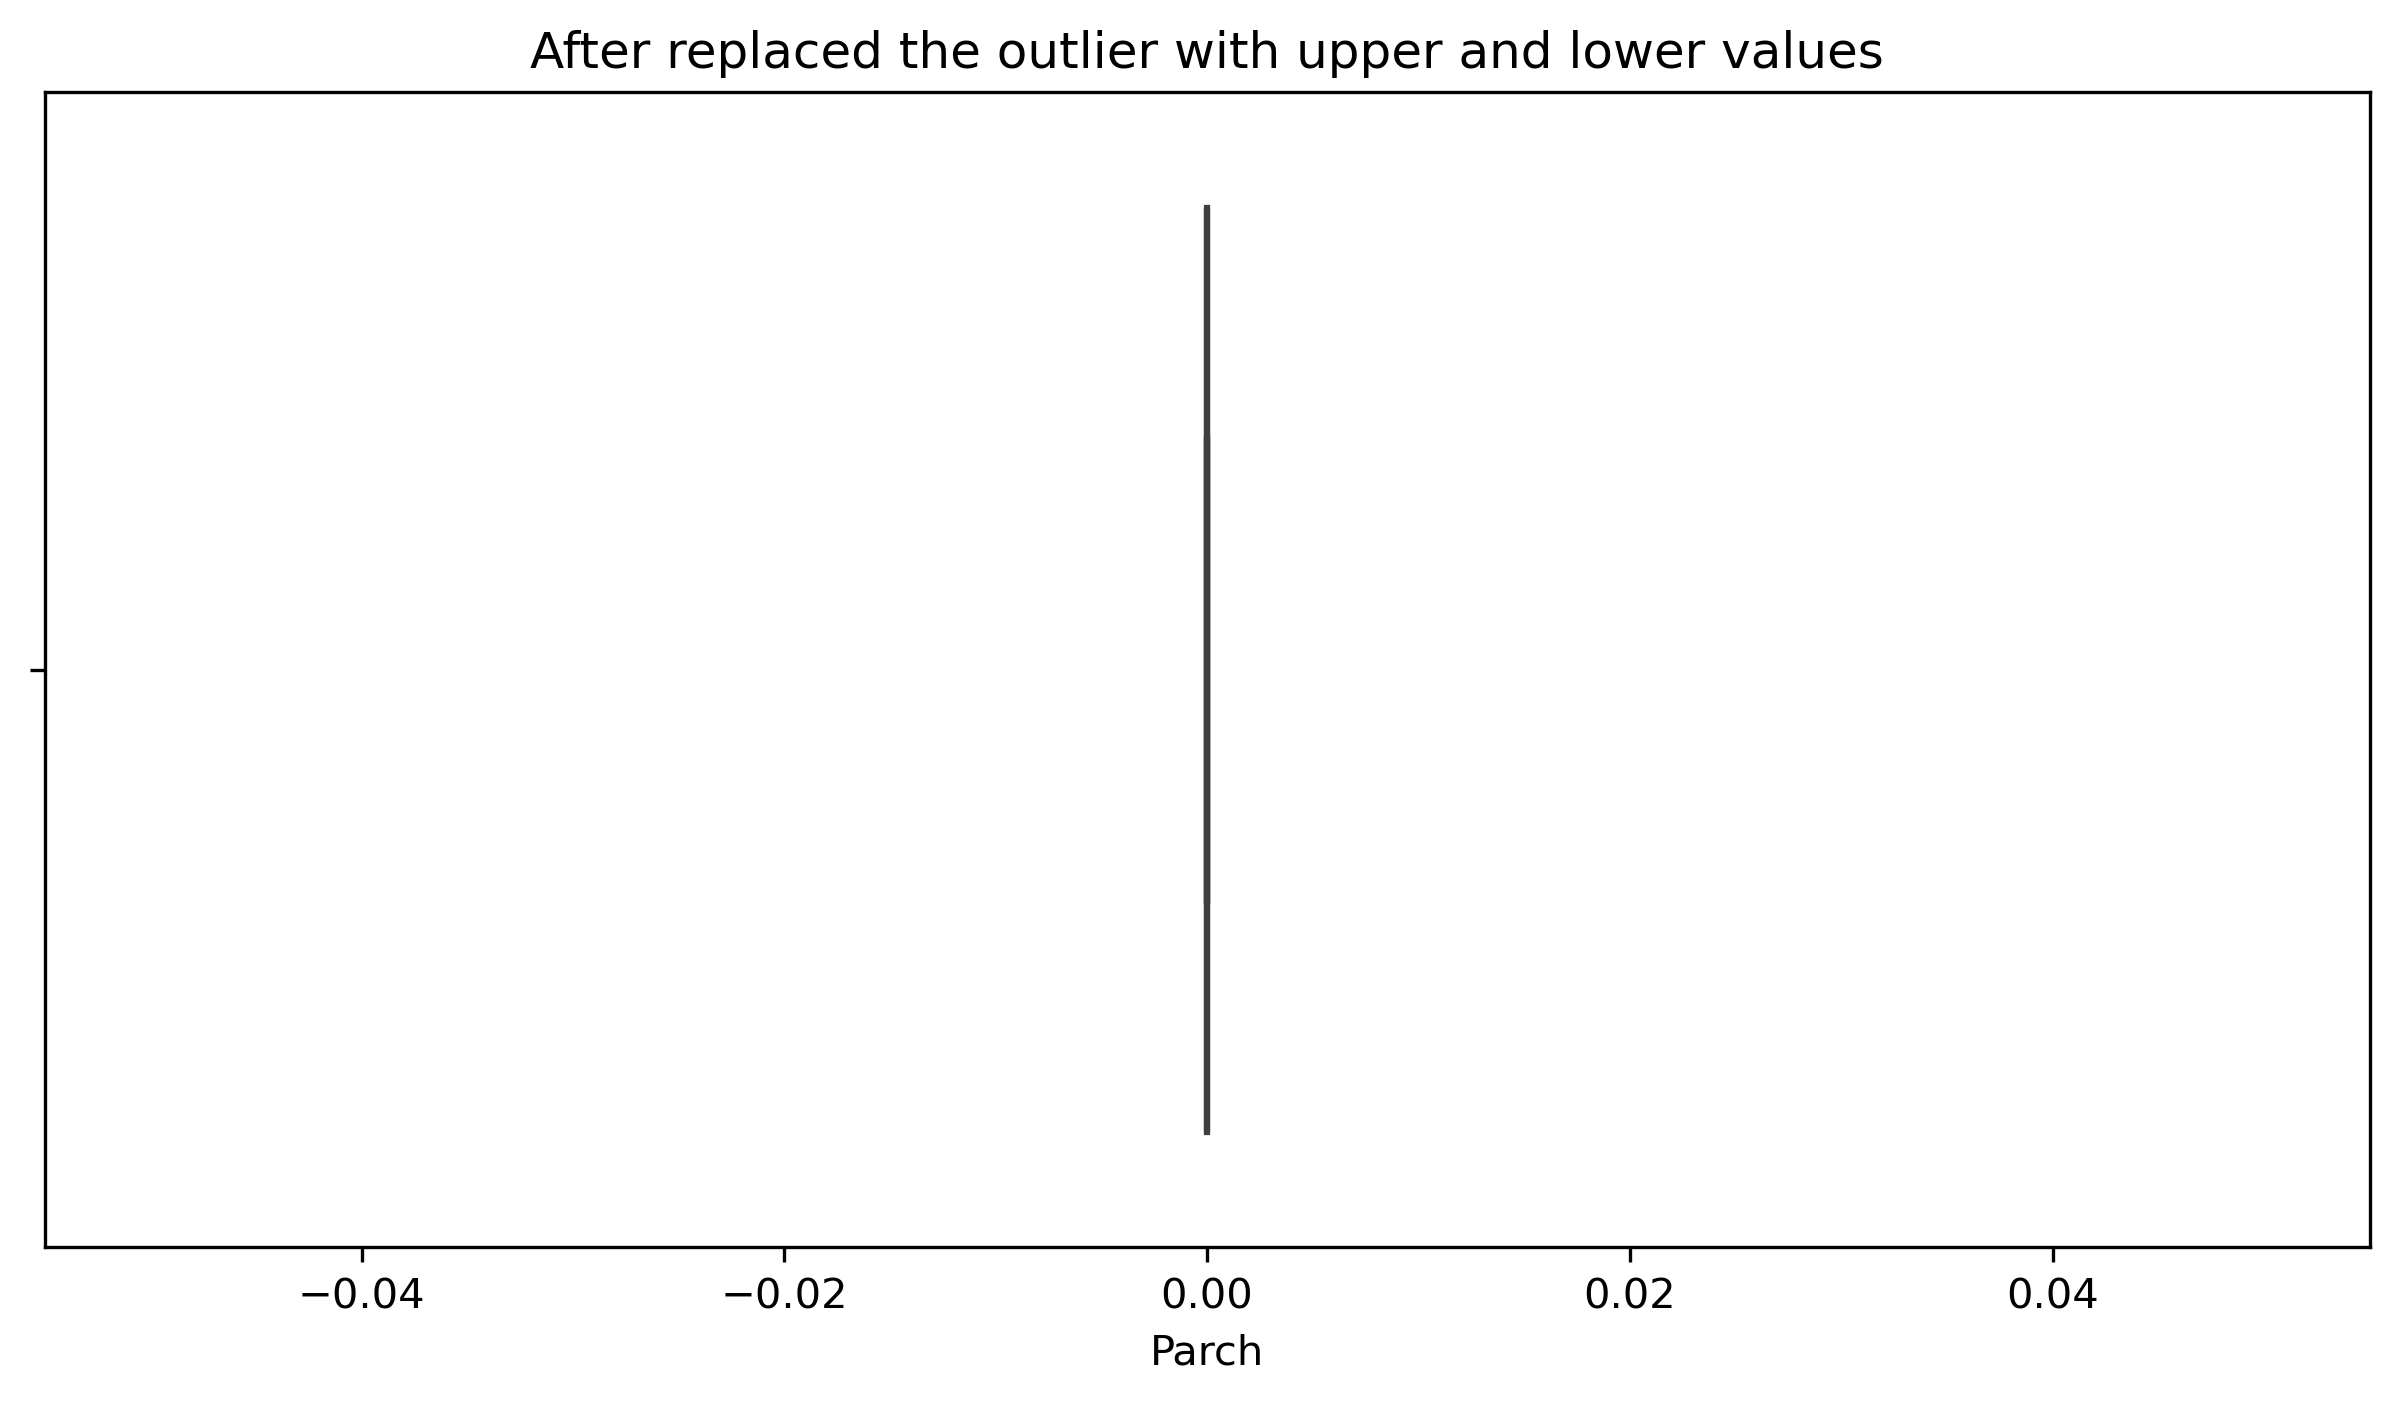

In [115]:
sns.boxplot(x = test["Parch"])
plt.xlabel("Parch")
plt.title("After replaced the outlier with upper and lower values")

In [116]:
outlier_detection(test, "Fare")

(-27.5105, 66.9063)

Text(0.5, 1.0, 'Before replacing the outlier with upper and lower values')

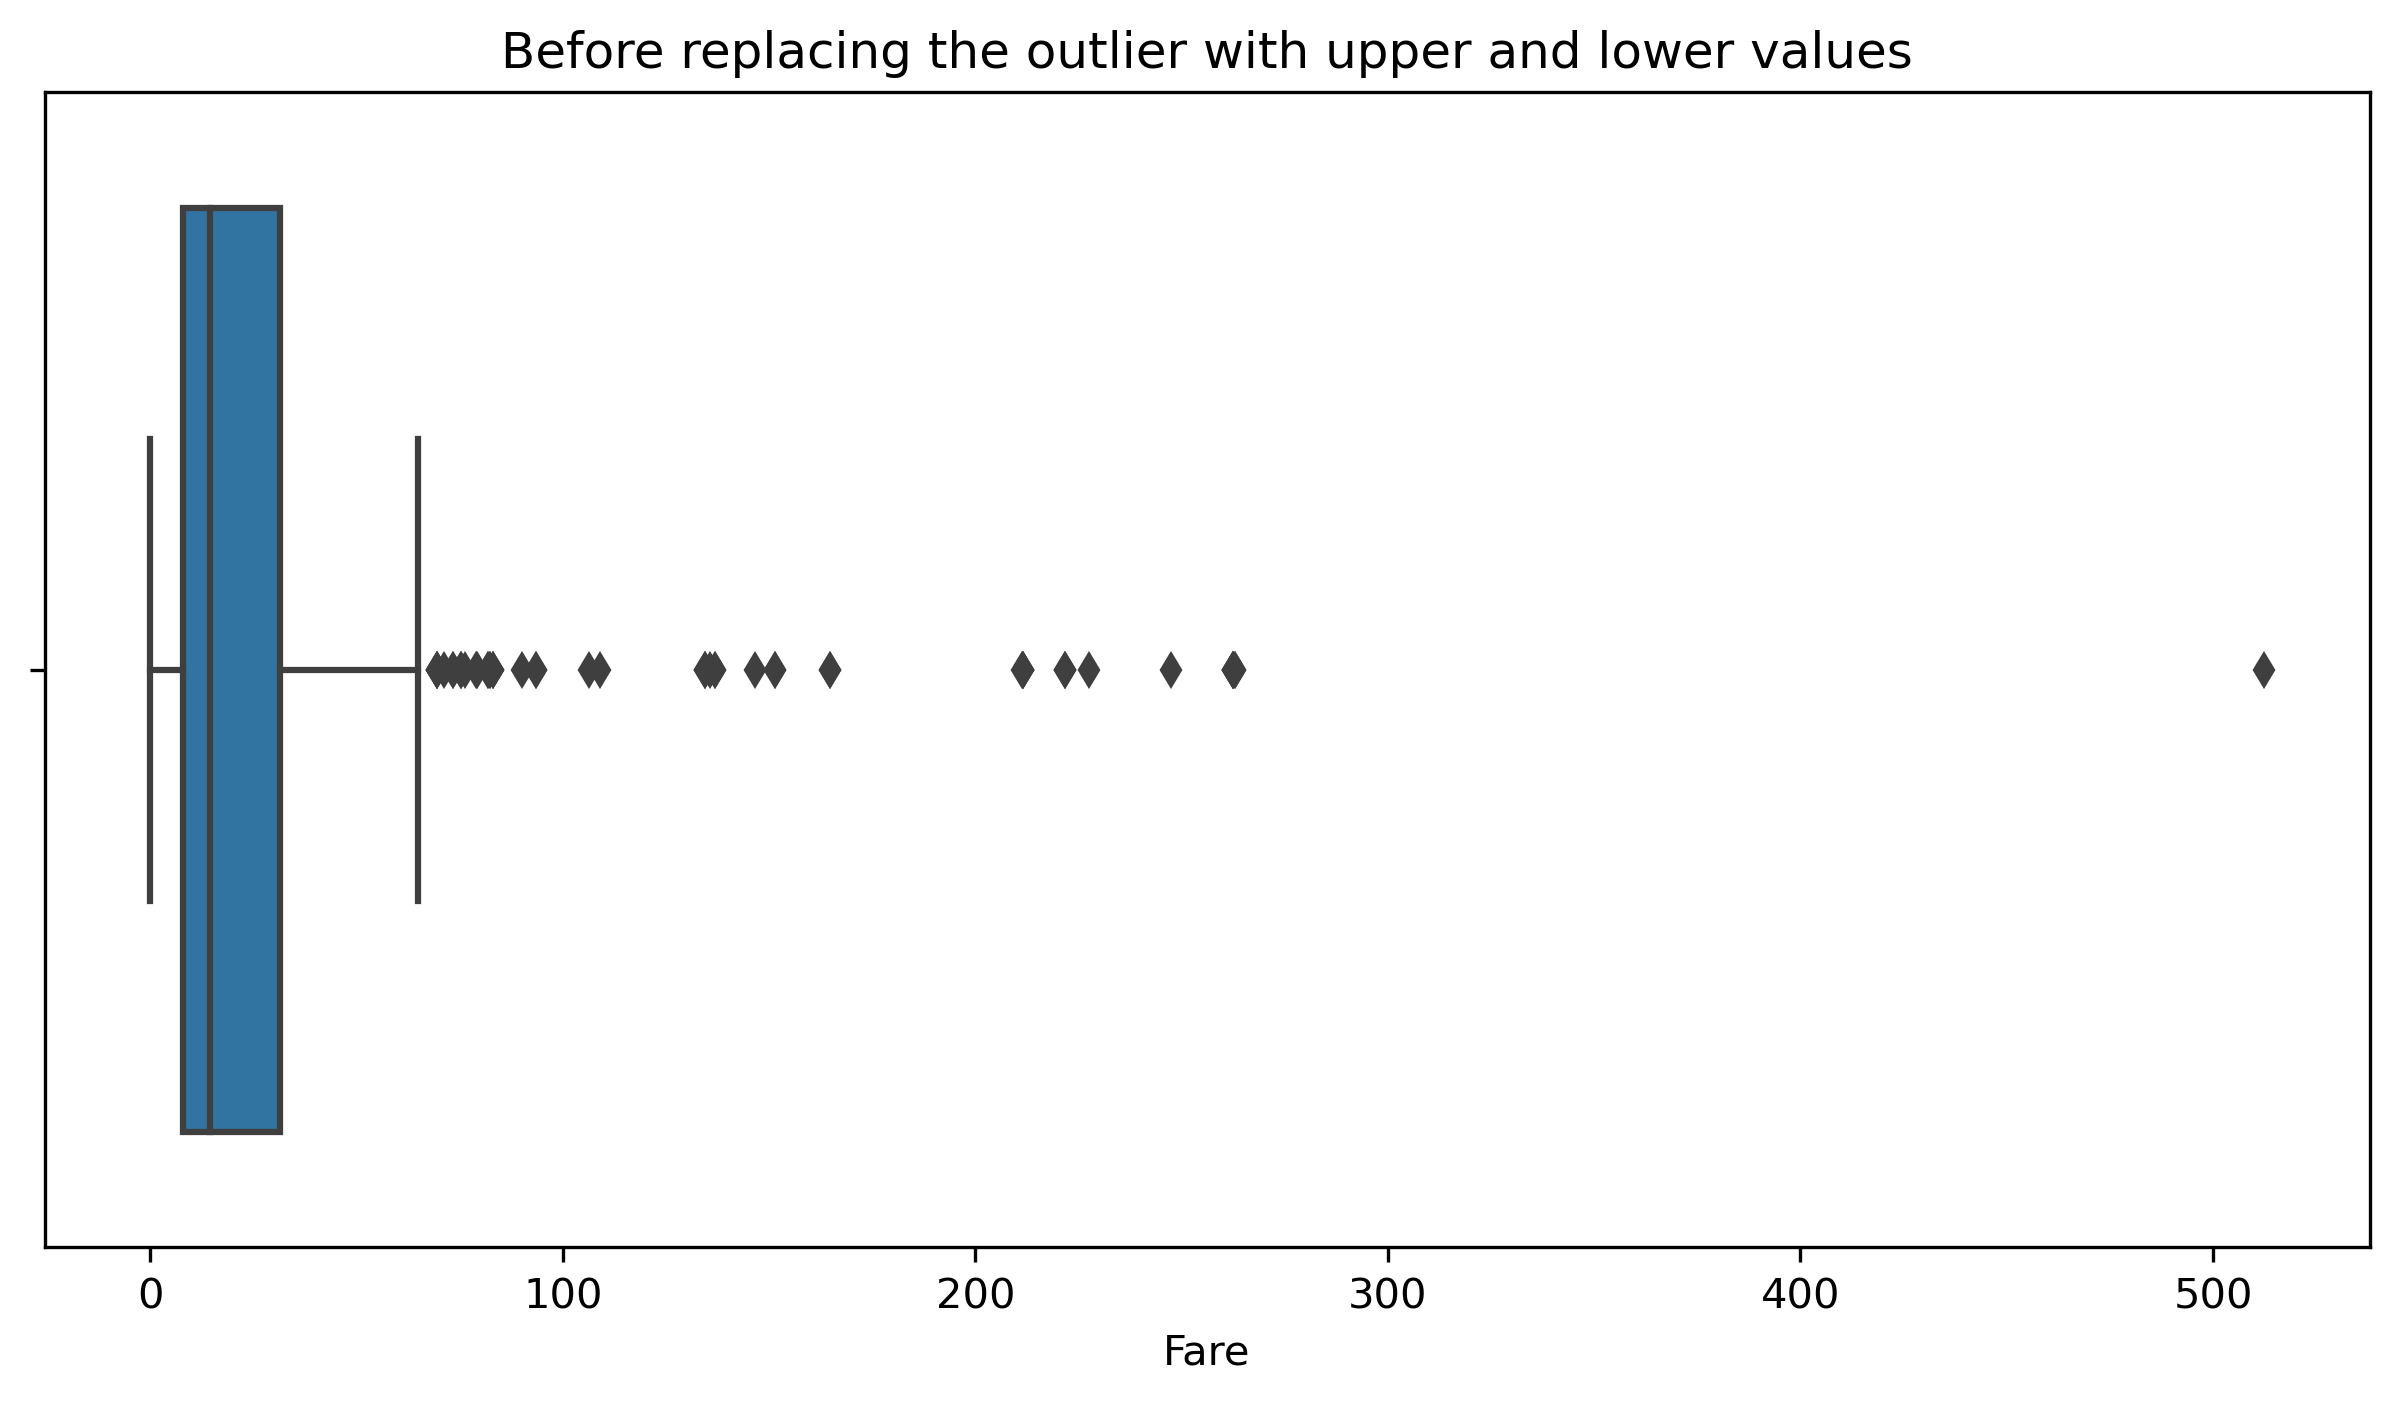

In [117]:
sns.boxplot(x = test["Fare"])
plt.xlabel("Fare")
plt.title("Before replacing the outlier with upper and lower values")

In [119]:
test.loc[test["Fare"]>66.9063, "Fare"] = 66.9063

Text(0.5, 1.0, 'After replaced the outlier with upper and lower values')

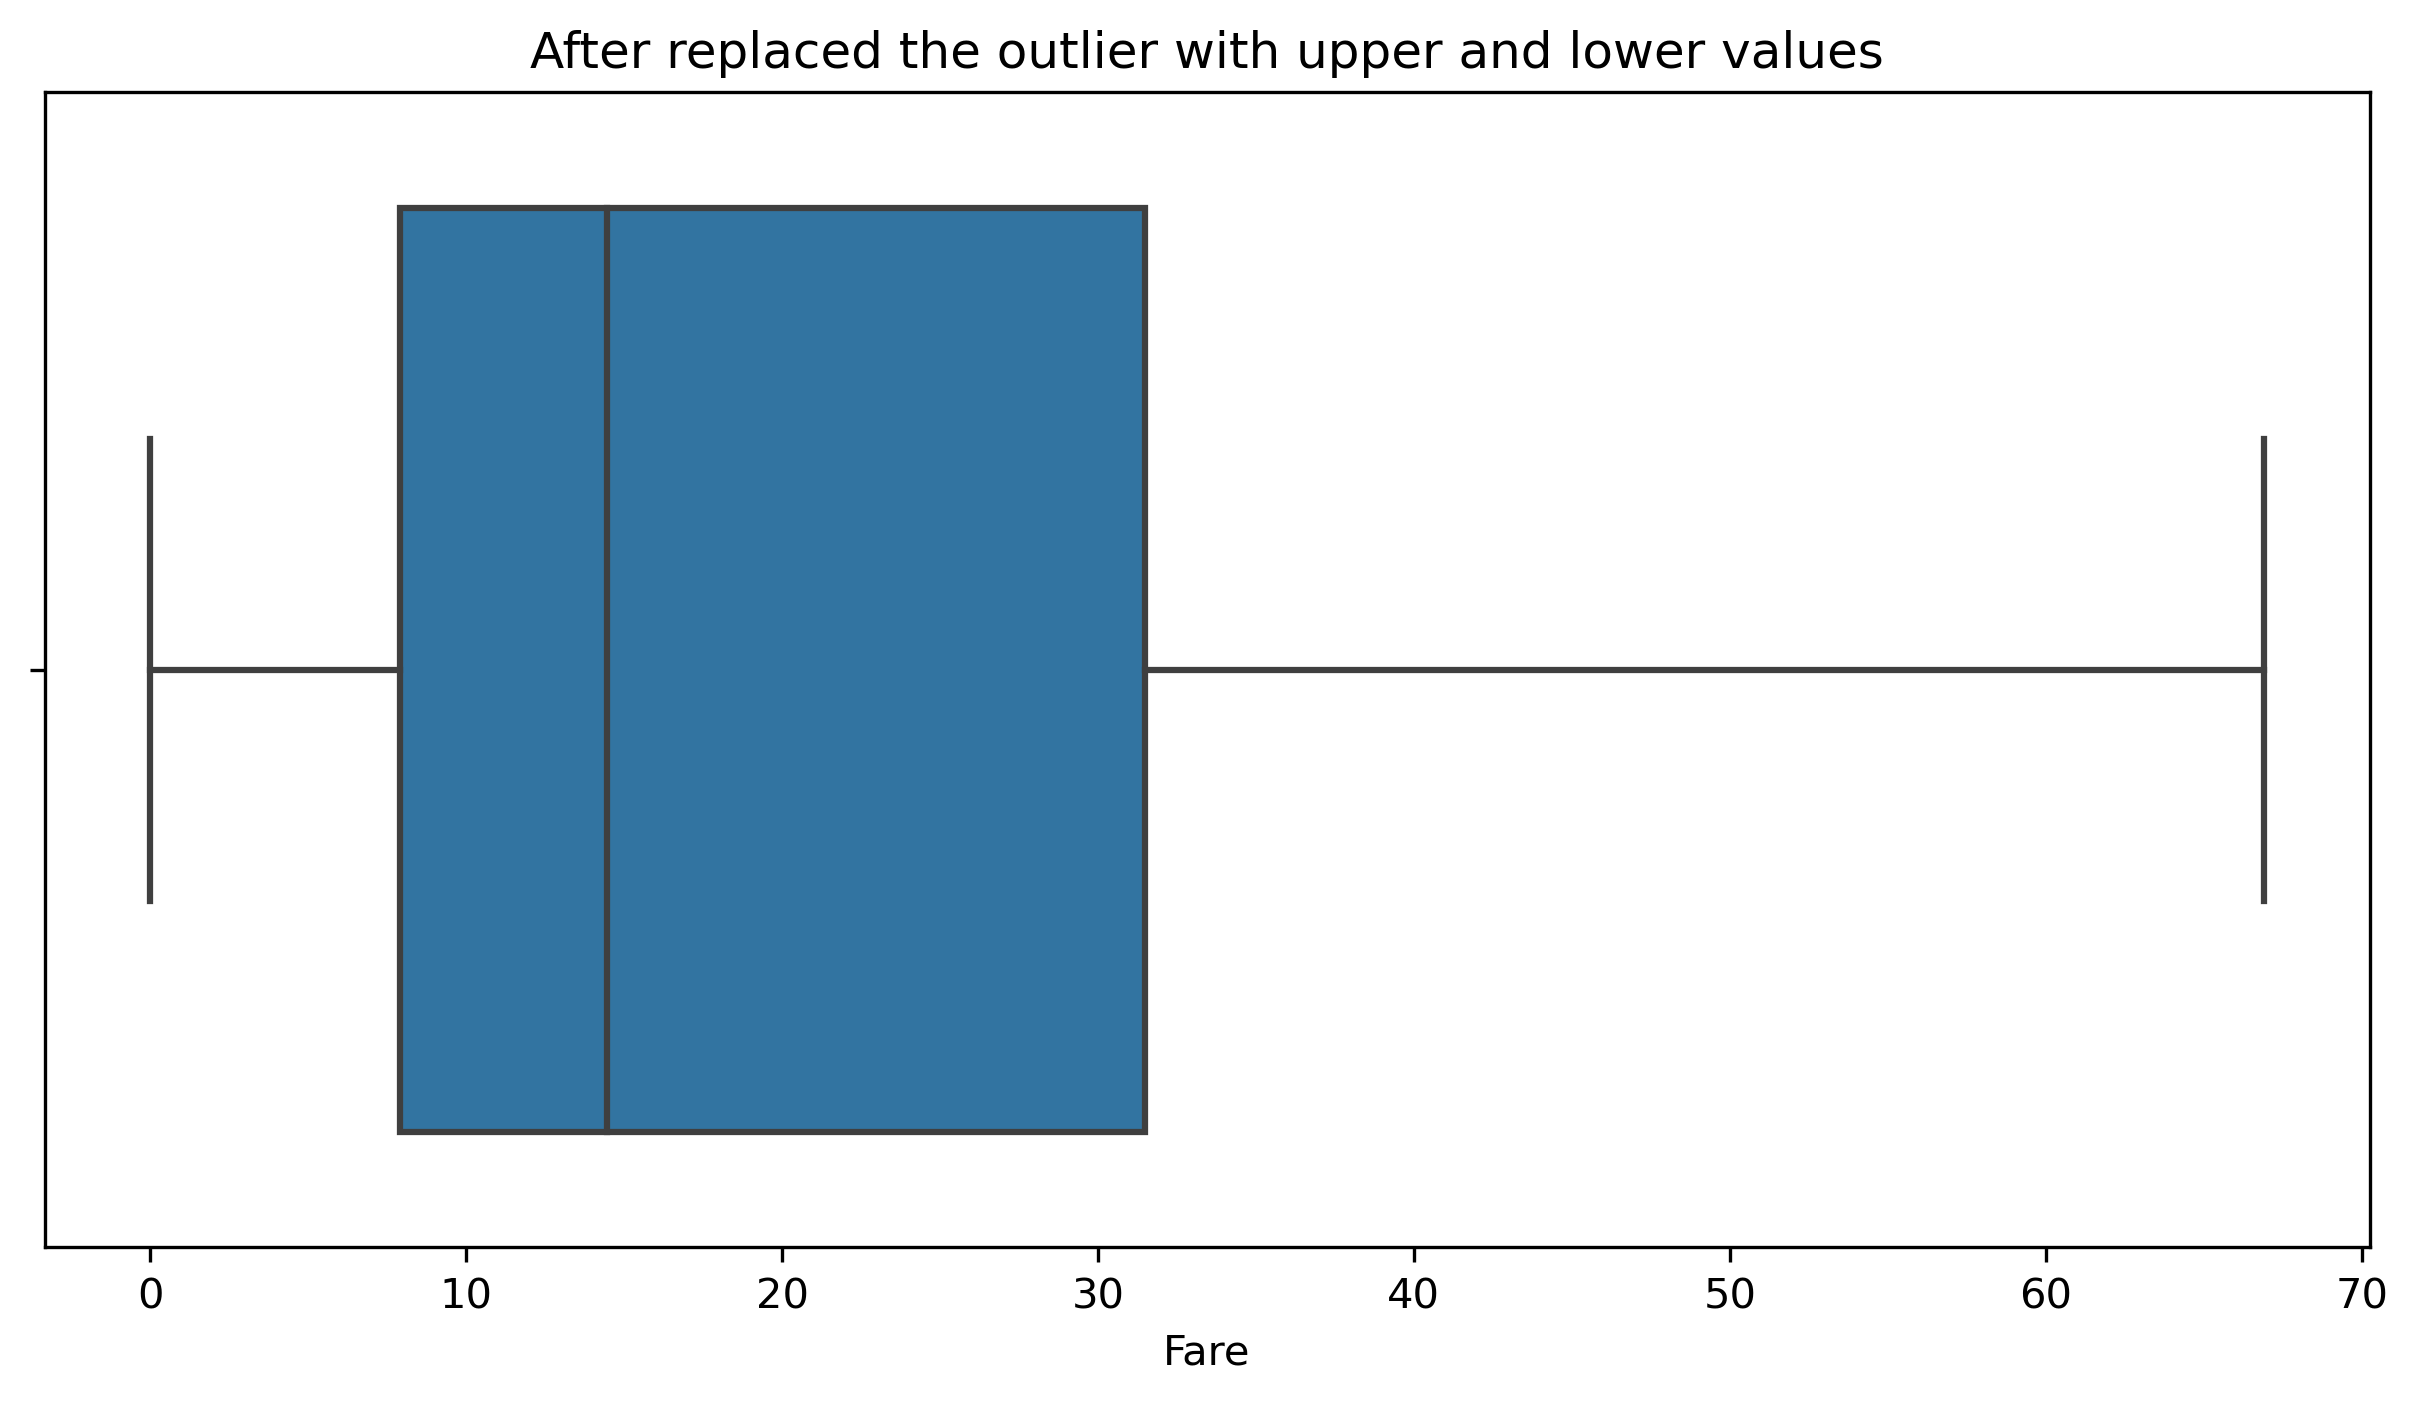

In [120]:
sns.boxplot(x = test["Fare"])
plt.xlabel("Fare")
plt.title("After replaced the outlier with upper and lower values")

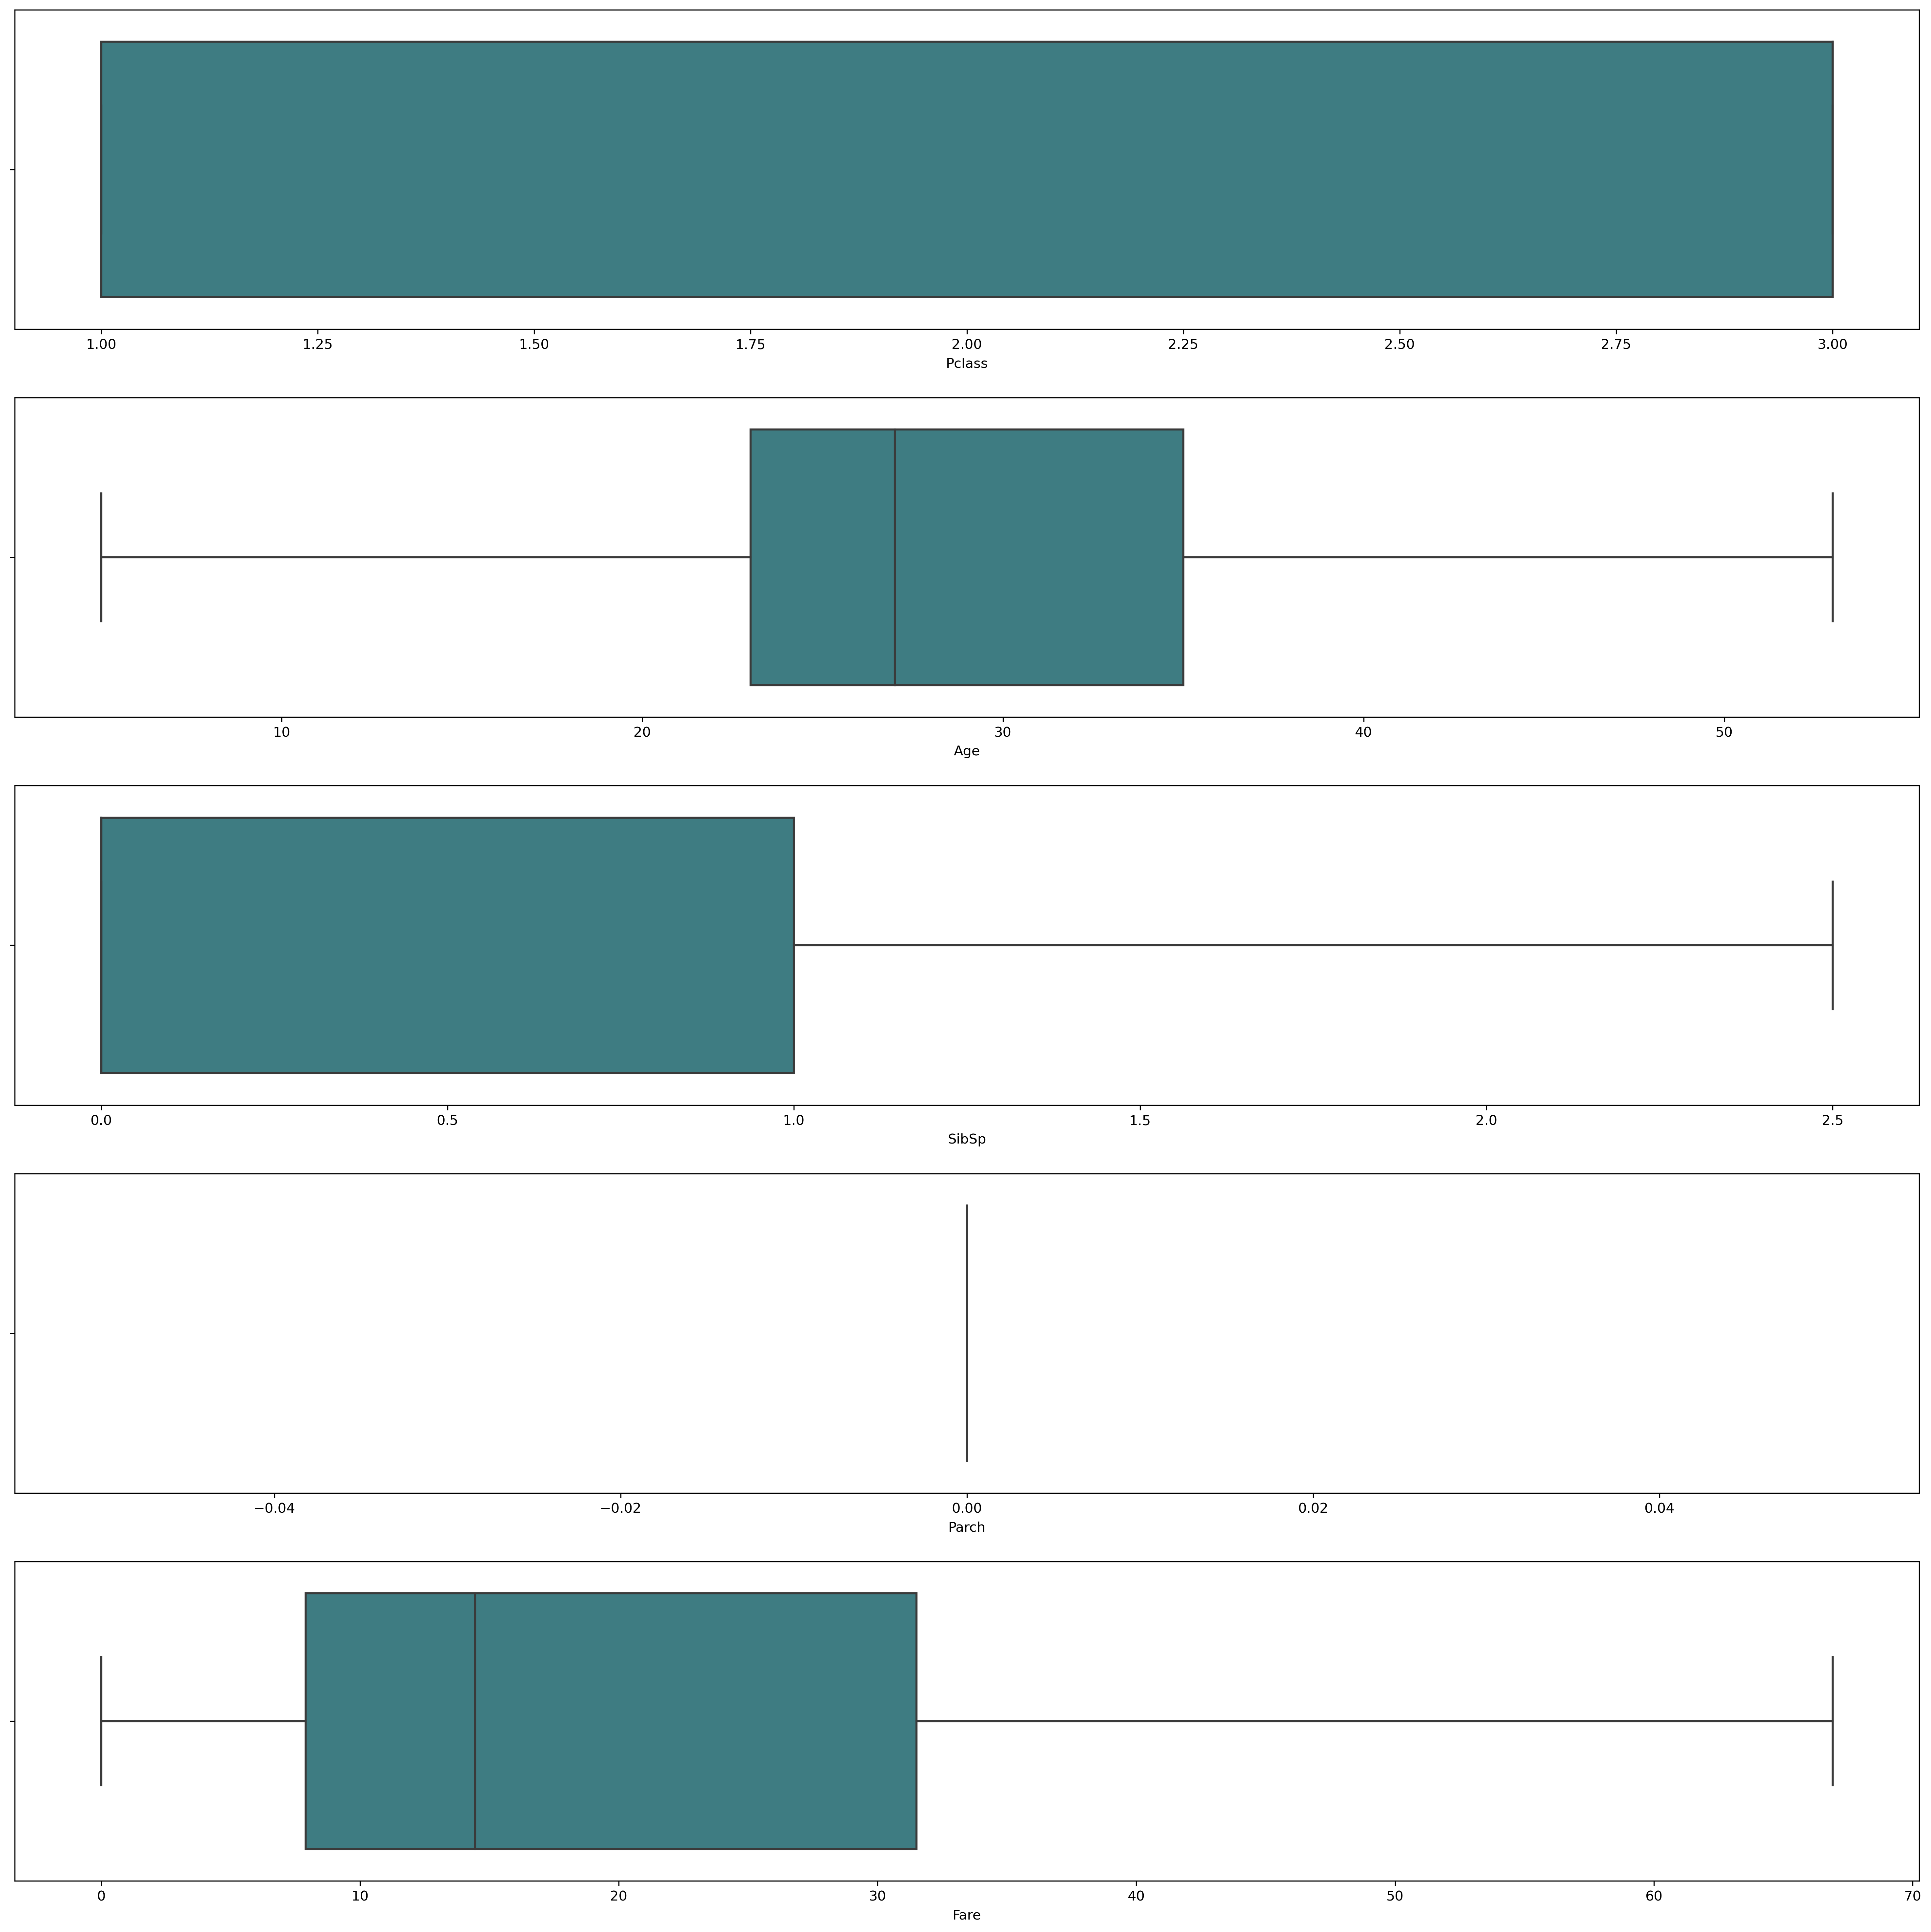

In [121]:
ot = test.copy()
fig, axes=plt.subplots(5,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='Pclass',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='SibSp',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Parch',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Fare',data=ot,palette='crest',ax=axes[4])
plt.tight_layout(pad=2.0)

# Visualizing the Data

# Scatter Plot and Correlation

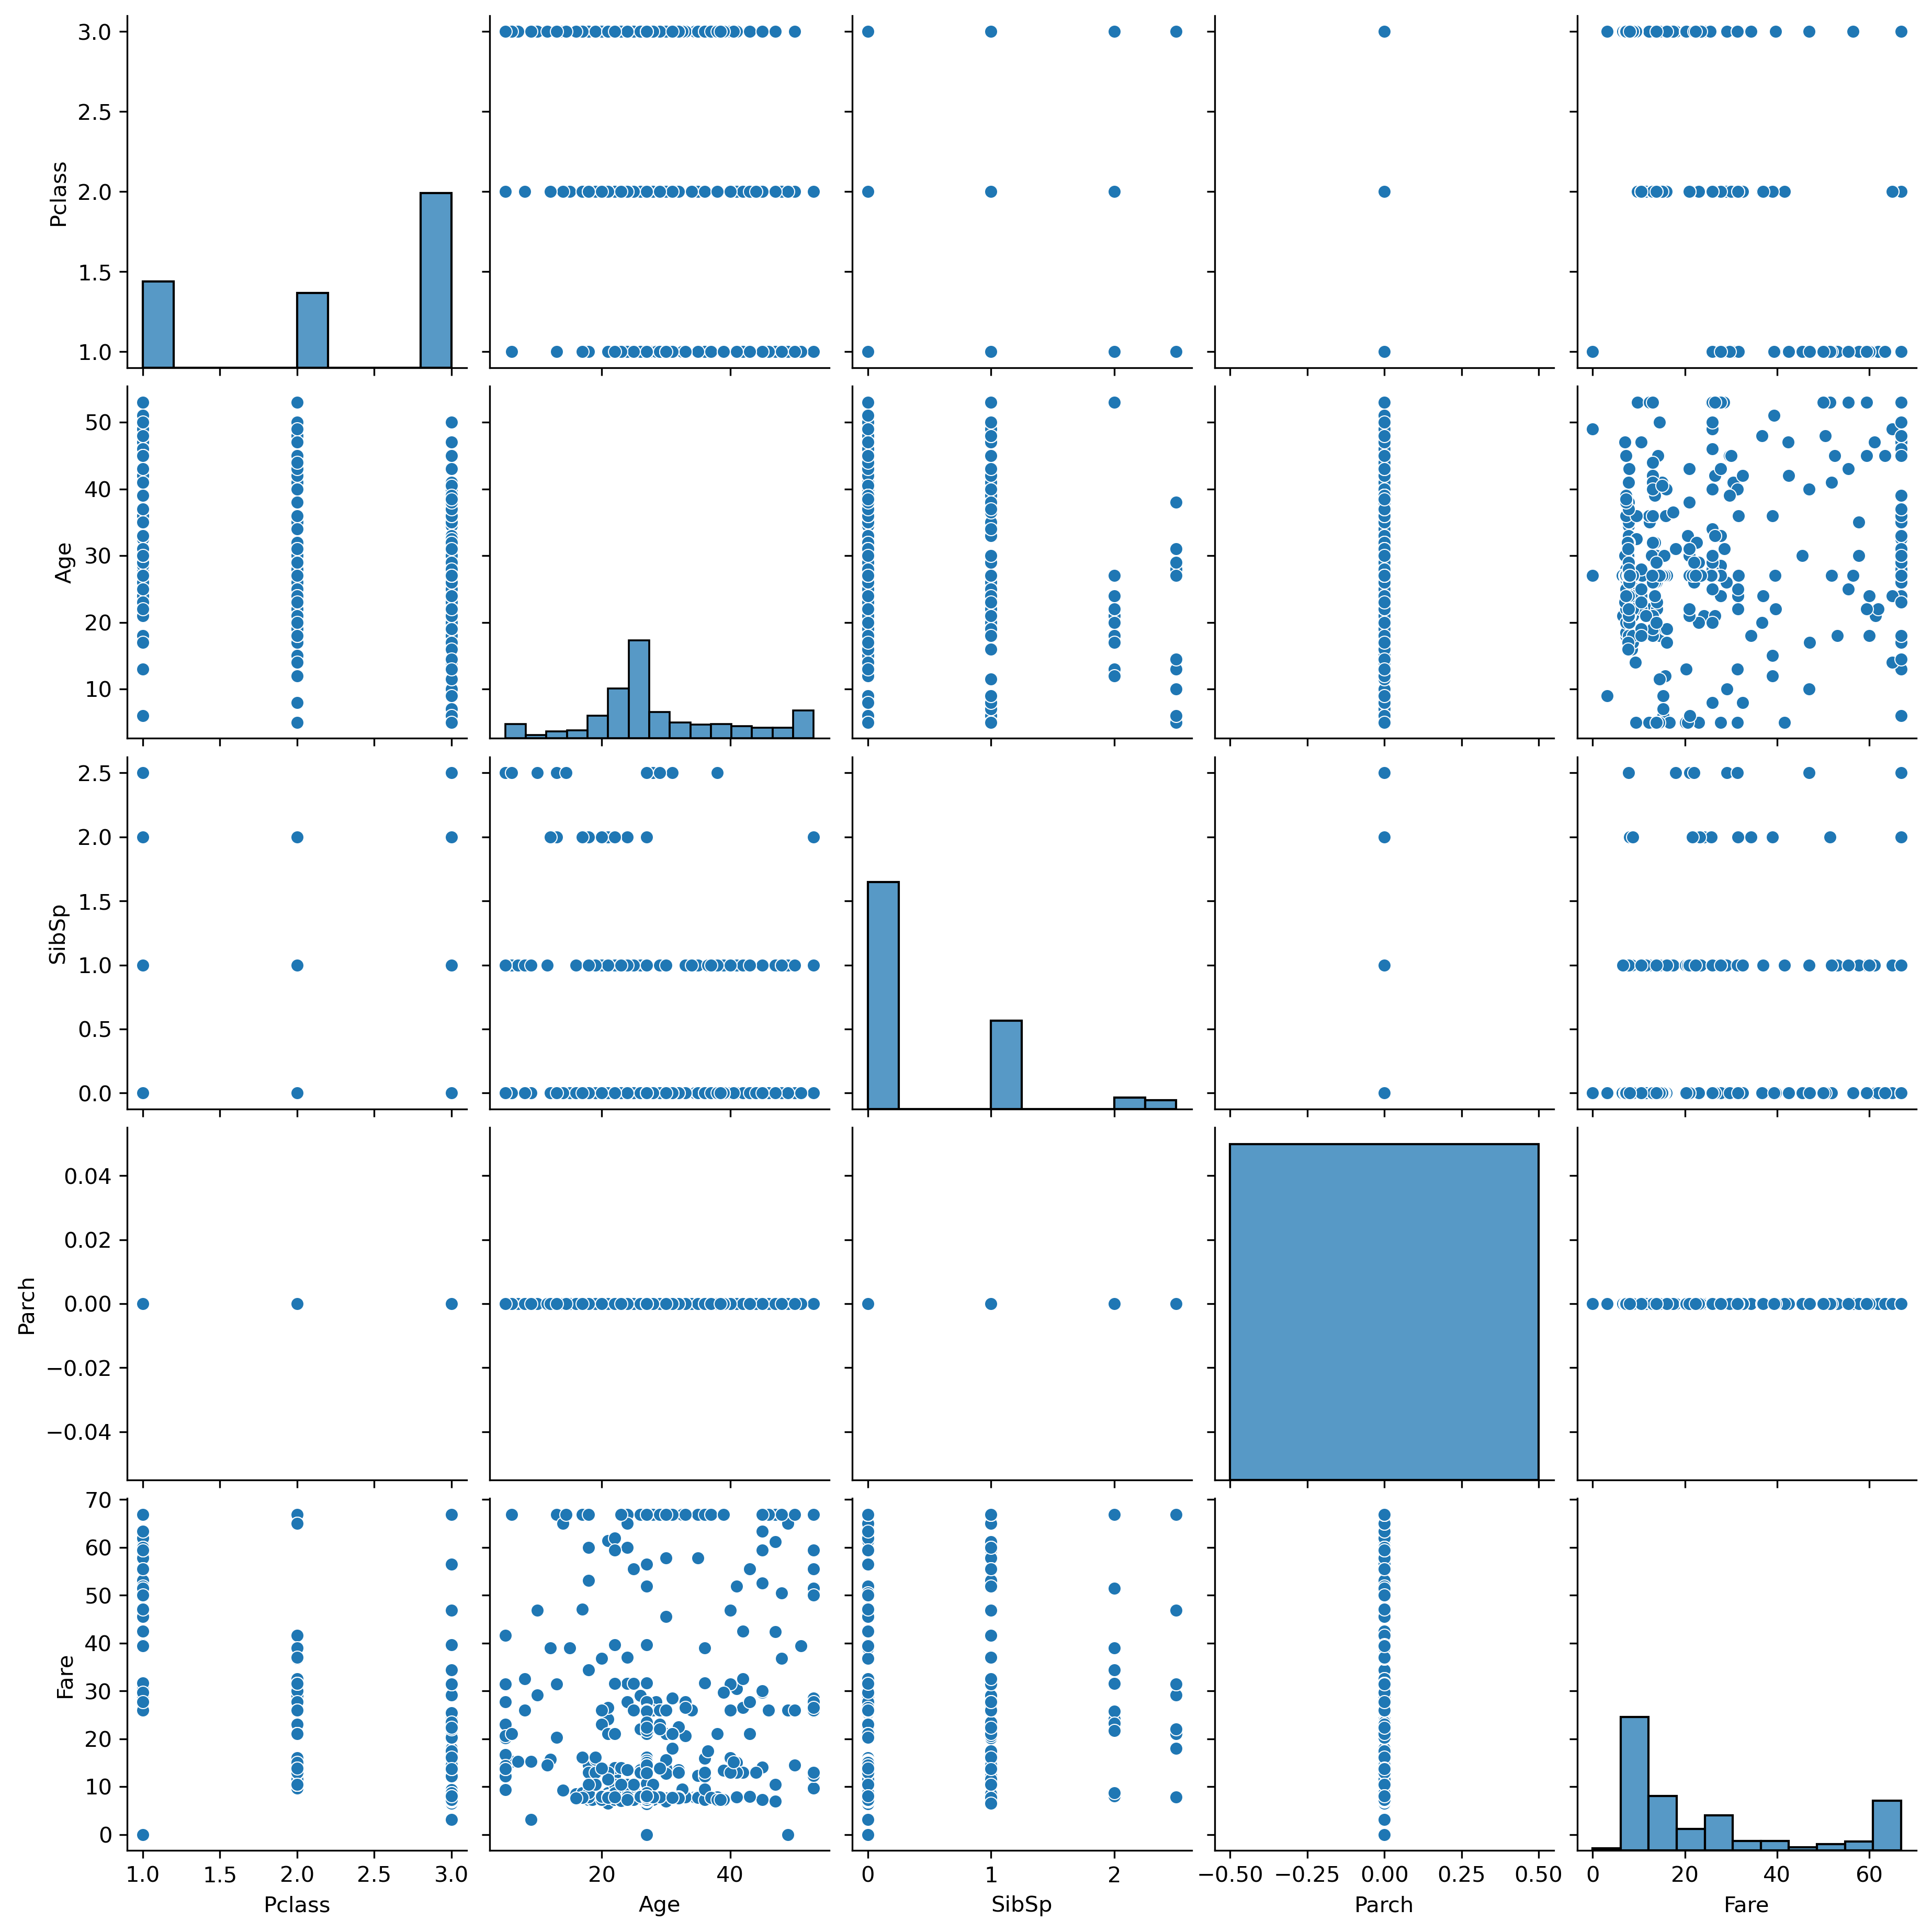

In [122]:
sns.pairplot(test)

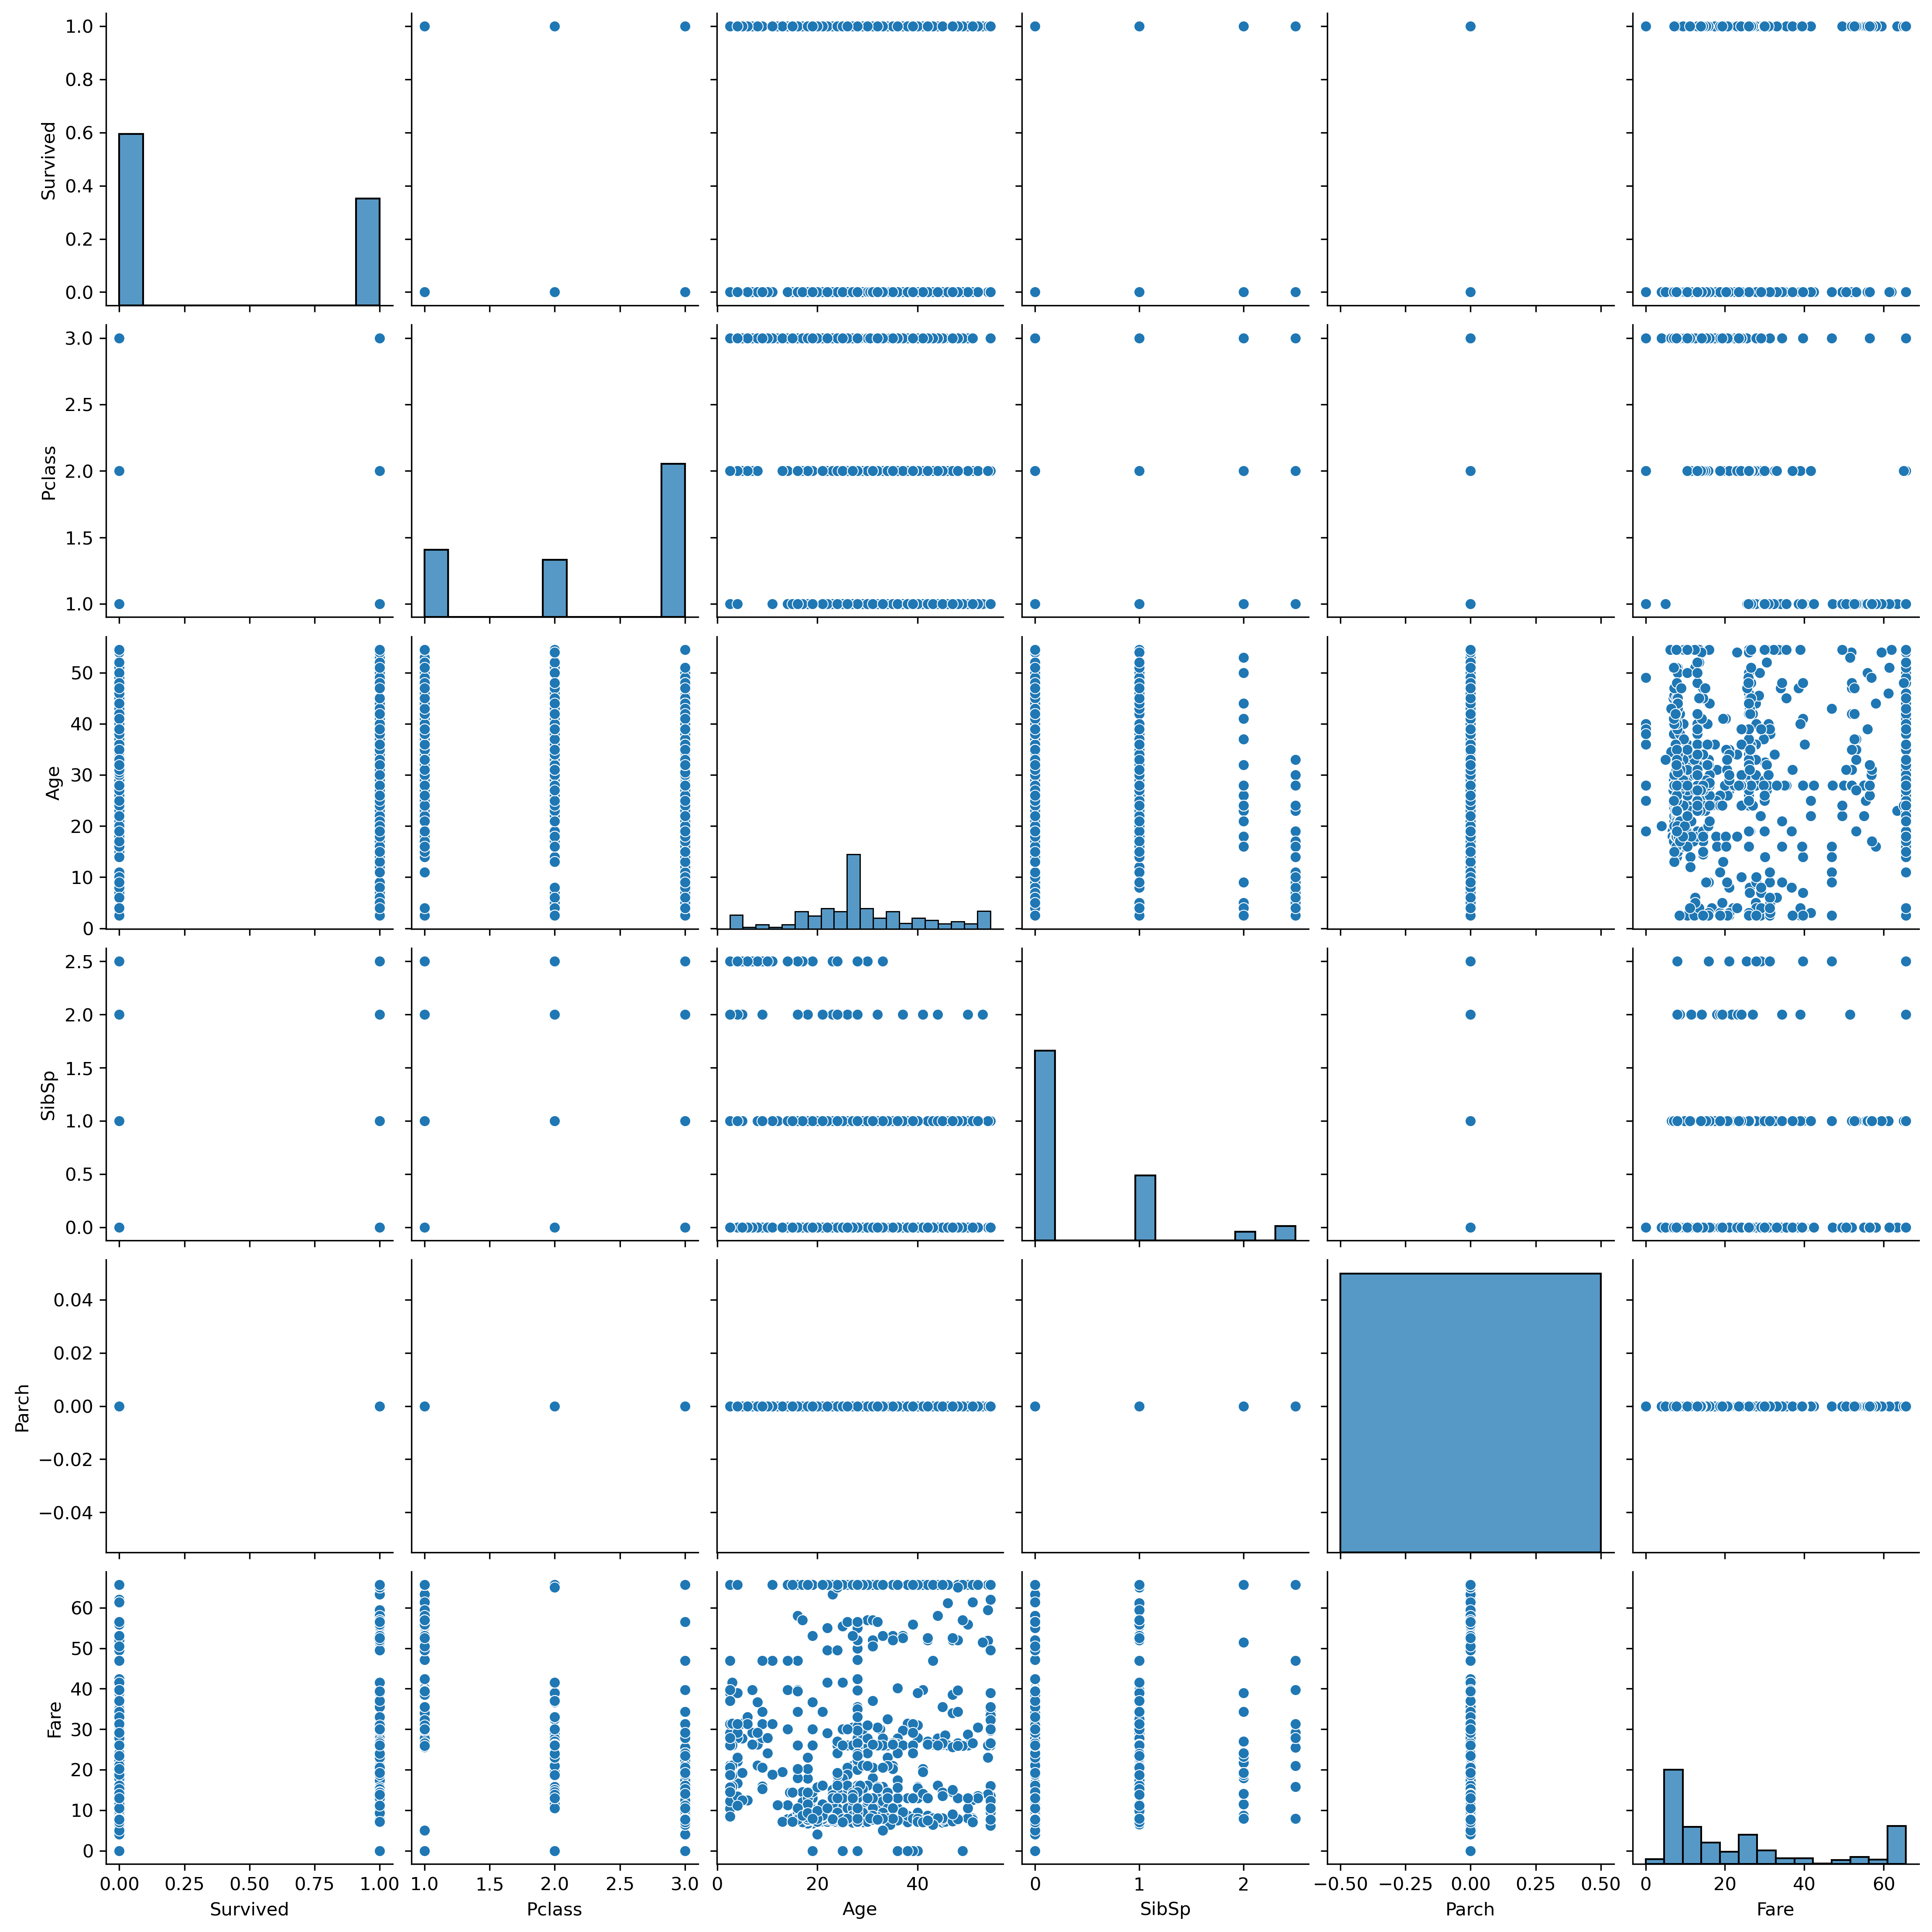

In [123]:
sns.pairplot(train)

# Correlation coefficient

In [130]:
test.corr(numeric_only=True)

Pclass       Age     SibSp  Parch      Fare
Pclass  1.000000 -0.477484 -0.063394    NaN -0.748550
Age    -0.477484  1.000000 -0.044502    NaN  0.351823
SibSp  -0.063394 -0.044502  1.000000    NaN  0.331359
Parch        NaN       NaN       NaN    NaN       NaN
Fare   -0.748550  0.351823  0.331359    NaN  1.000000

In [131]:
train.corr(numeric_only=True)

Survived    Pclass       Age     SibSp  Parch      Fare
Survived  1.000000 -0.338481 -0.060622  0.031434    NaN  0.317430
Pclass   -0.338481  1.000000 -0.340404  0.023180    NaN -0.715300
Age      -0.060622 -0.340404  1.000000 -0.247806    NaN  0.144544
SibSp     0.031434  0.023180 -0.247806  1.000000    NaN  0.349615
Parch          NaN       NaN       NaN       NaN    NaN       NaN
Fare      0.317430 -0.715300  0.144544  0.349615    NaN  1.000000

<Axes: >

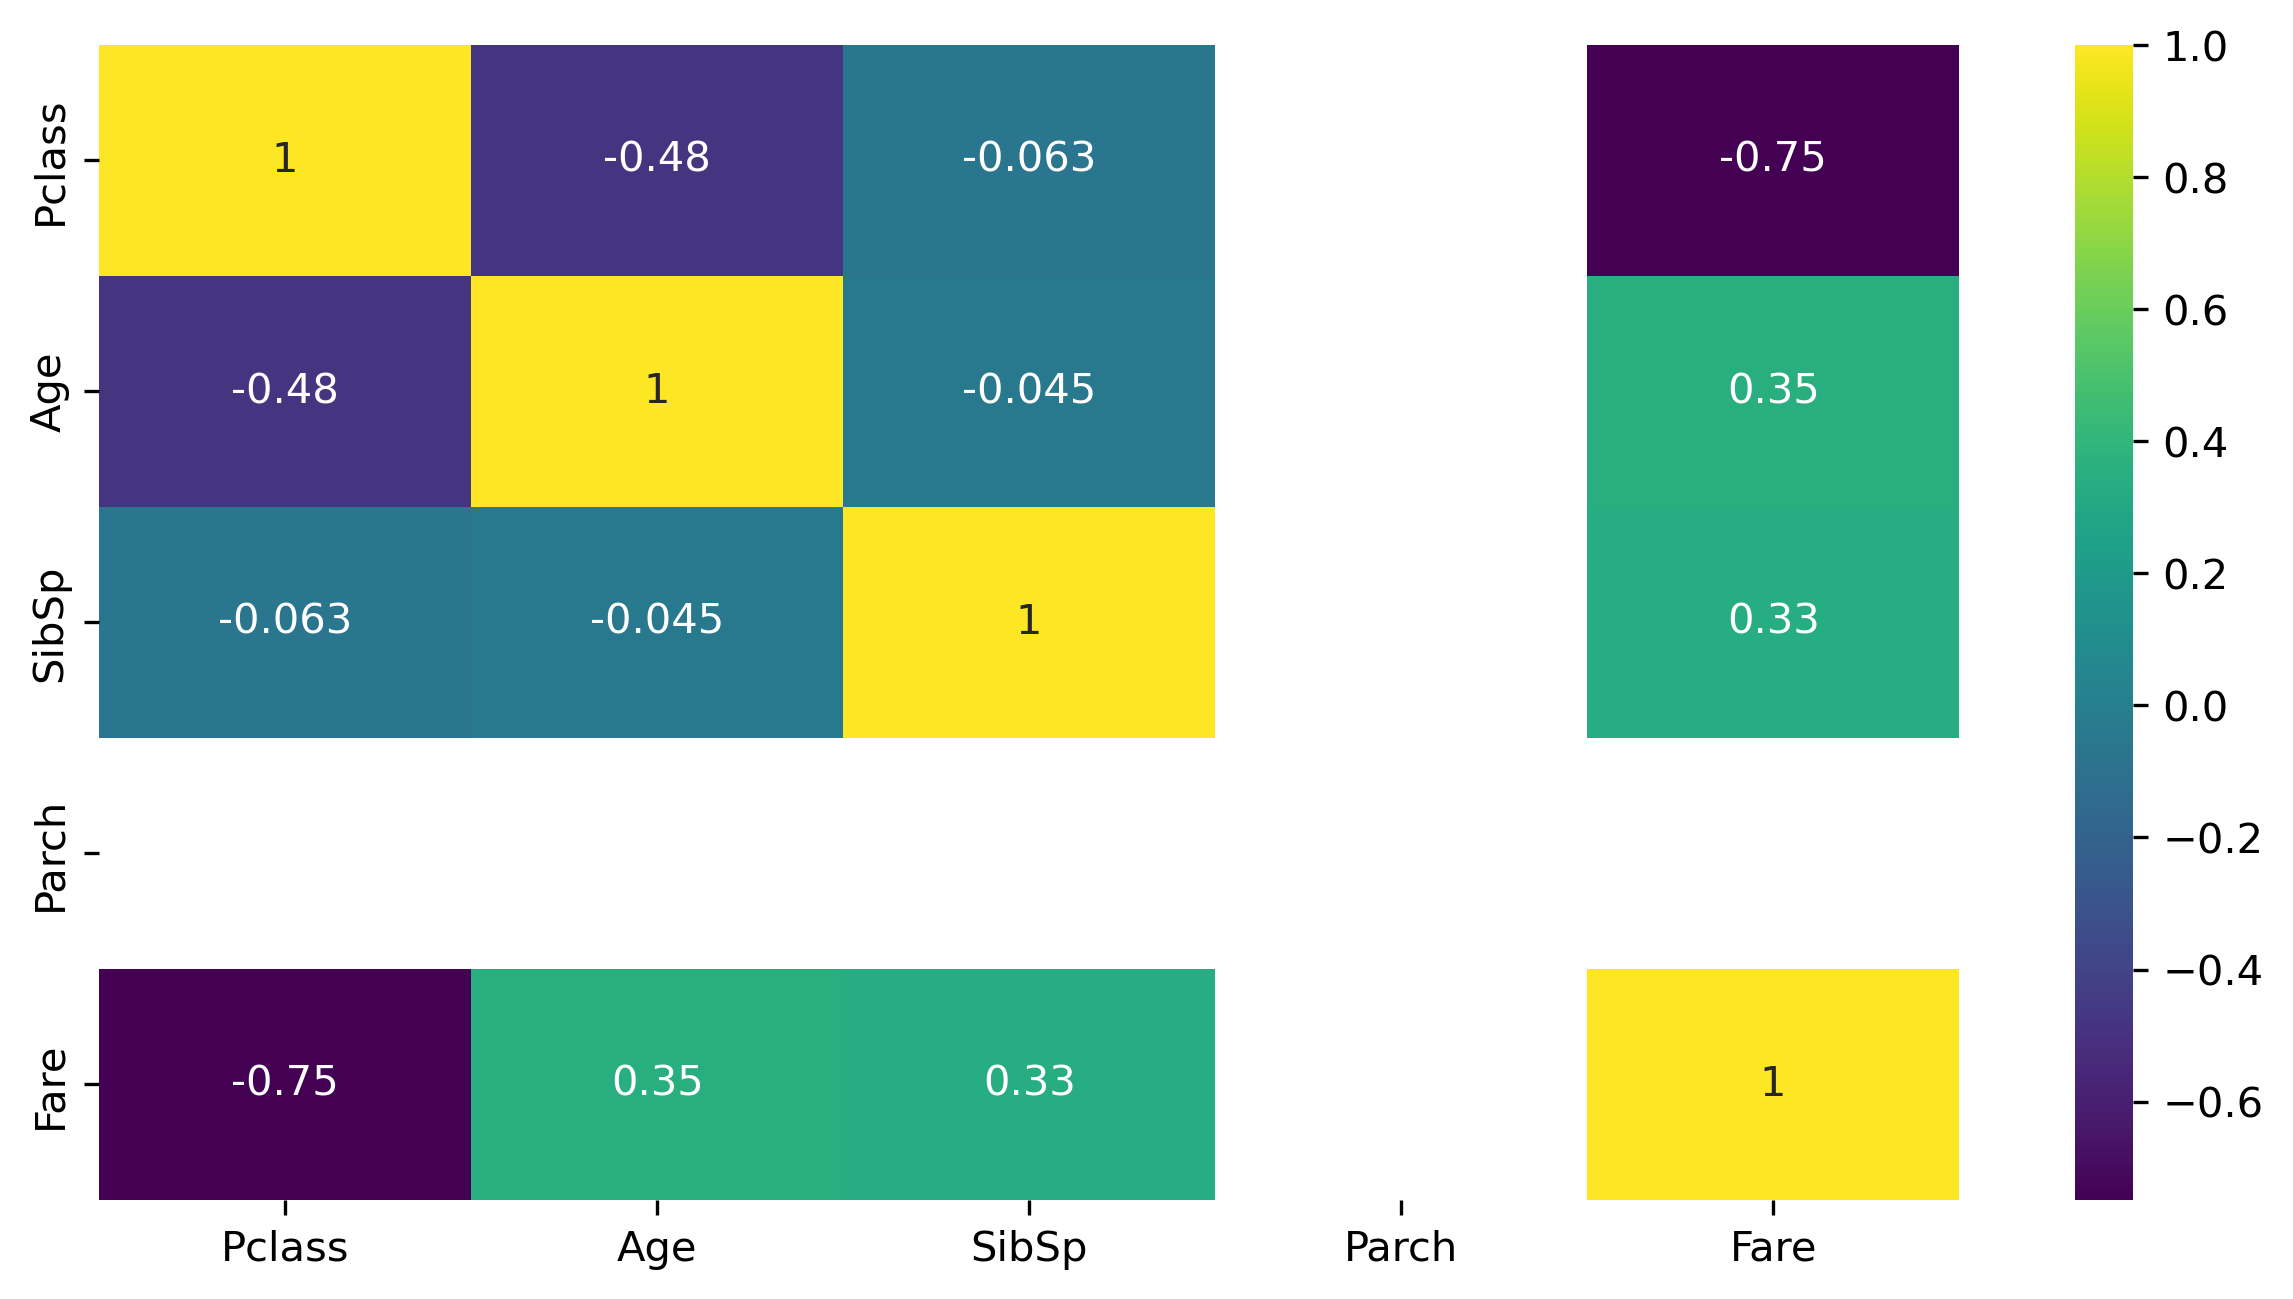

In [132]:
sns.heatmap(test.corr(), annot=True, cmap ="viridis")

<Axes: >

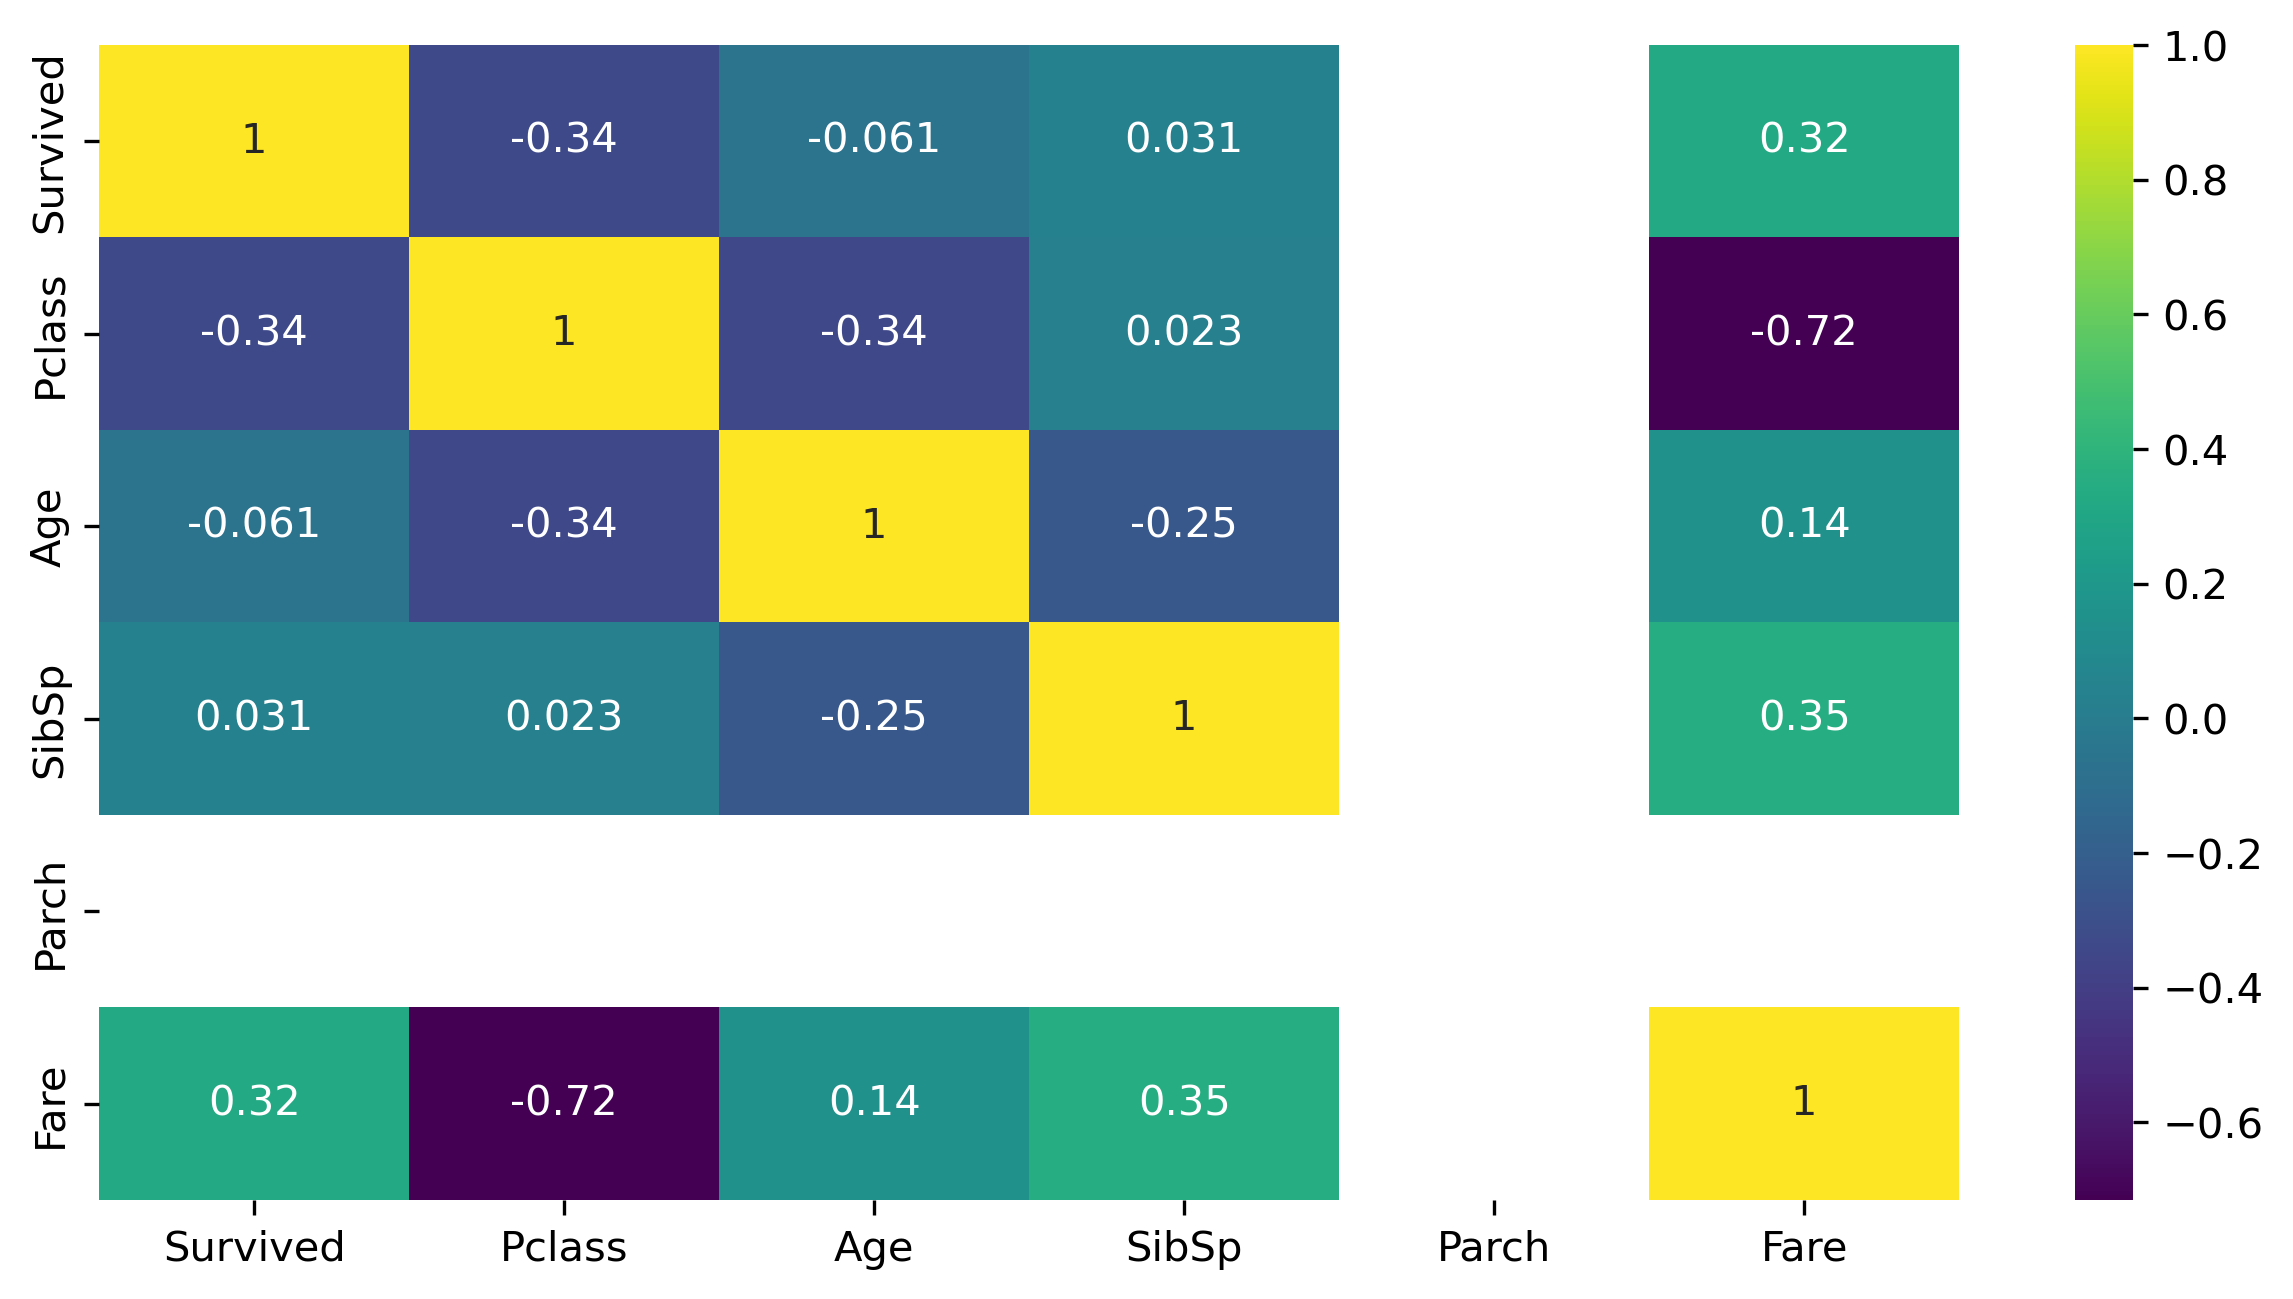

In [133]:
sns.heatmap(train.corr(), annot=True, cmap ="viridis")

# Let’s see the survived v/s died percentage by plotting a pie chart

# Plotting the Pie chart

0    549
1    342
Name: Survived, dtype: int64

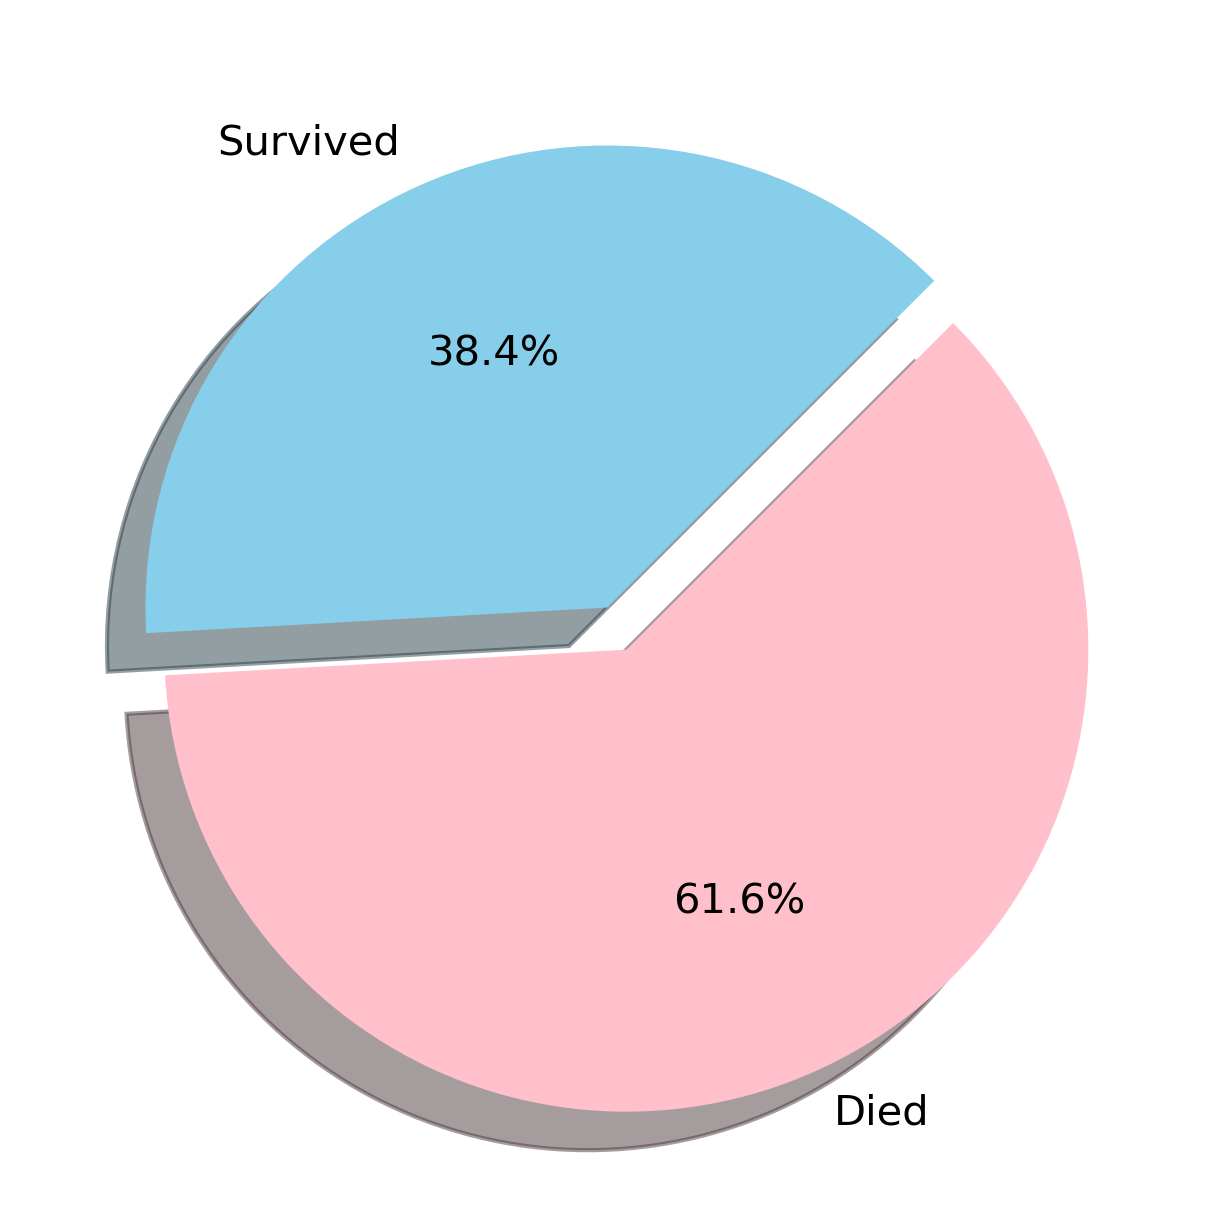

In [135]:
fig = plt.figure(figsize=(5,5))
colors = ["skyblue",'pink']
surv = train[train['Survived']==1]
died = train[train['Survived']==0]
ck = [surv['Survived'].count(),died['Survived'].count()]
piechart = plt.pie(ck,labels=["Survived","Died"],
autopct ='%1.1f%%',
shadow = True,
colors = colors,
startangle = 45,
explode=(0, 0.1))
train.Survived.value_counts()

# Let’s see the distribution of the ‘Age’ column using a histogram.

<Axes: xlabel='Age', ylabel='Count'>

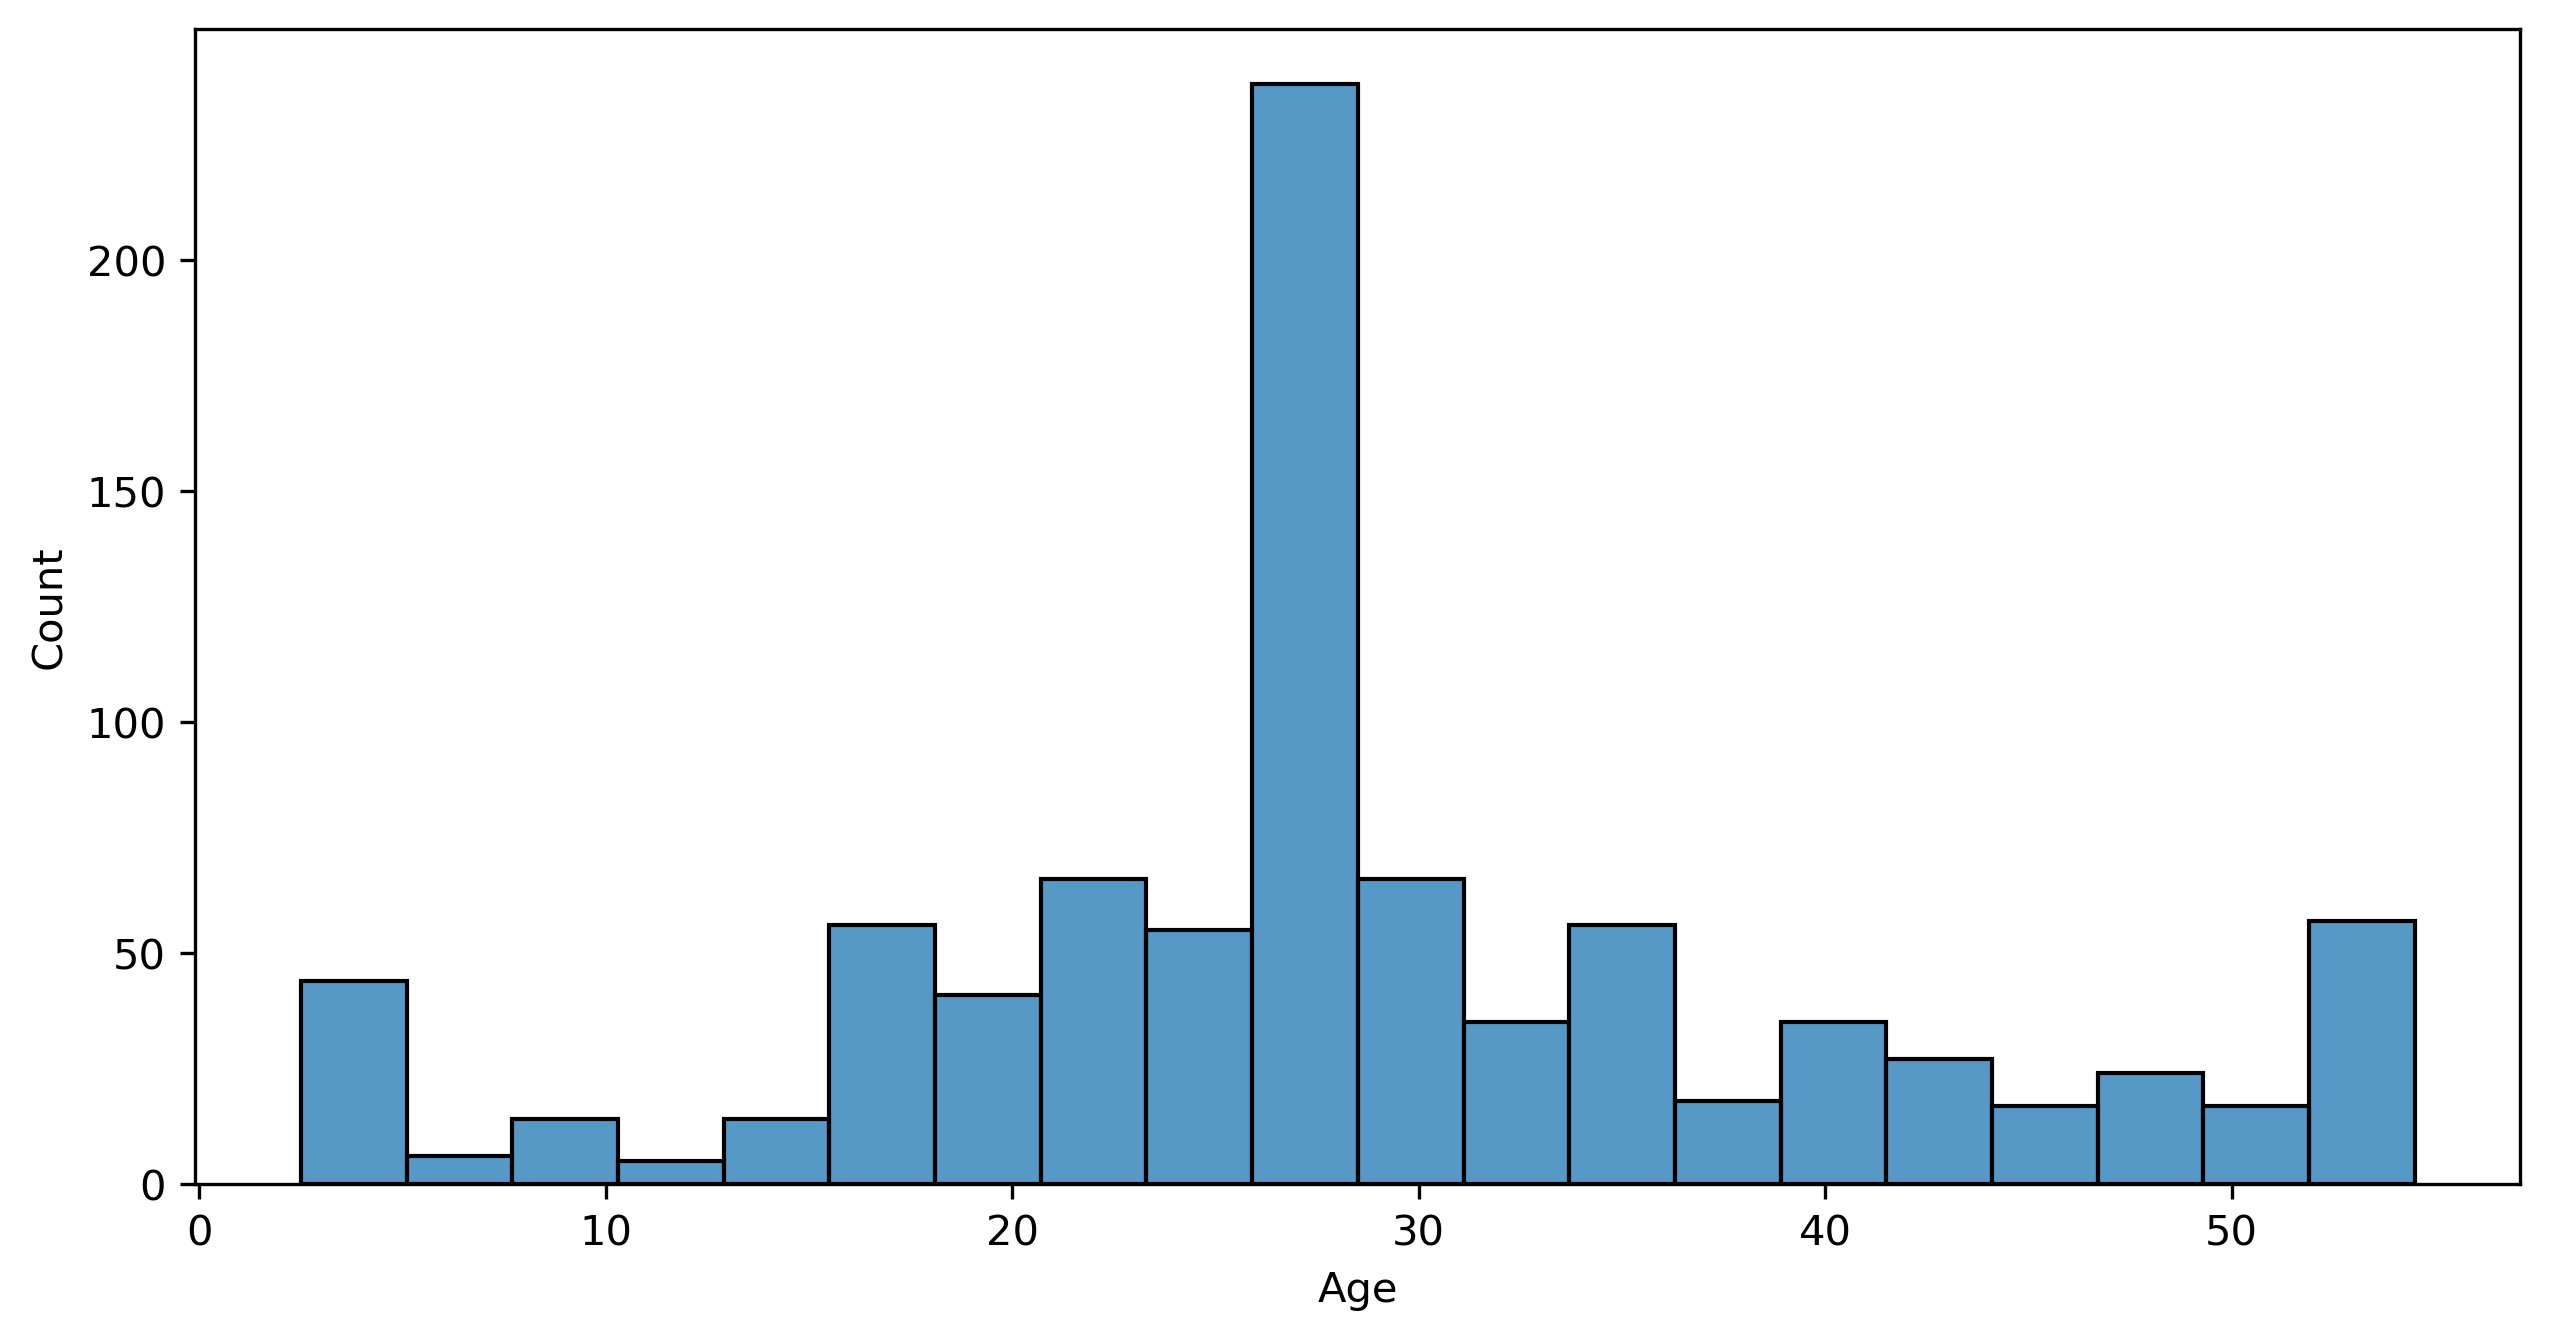

In [136]:
sns.histplot(train['Age'])

# Let’s see the distribution of the ‘Parch’ column

<Axes: xlabel='Parch', ylabel='Count'>

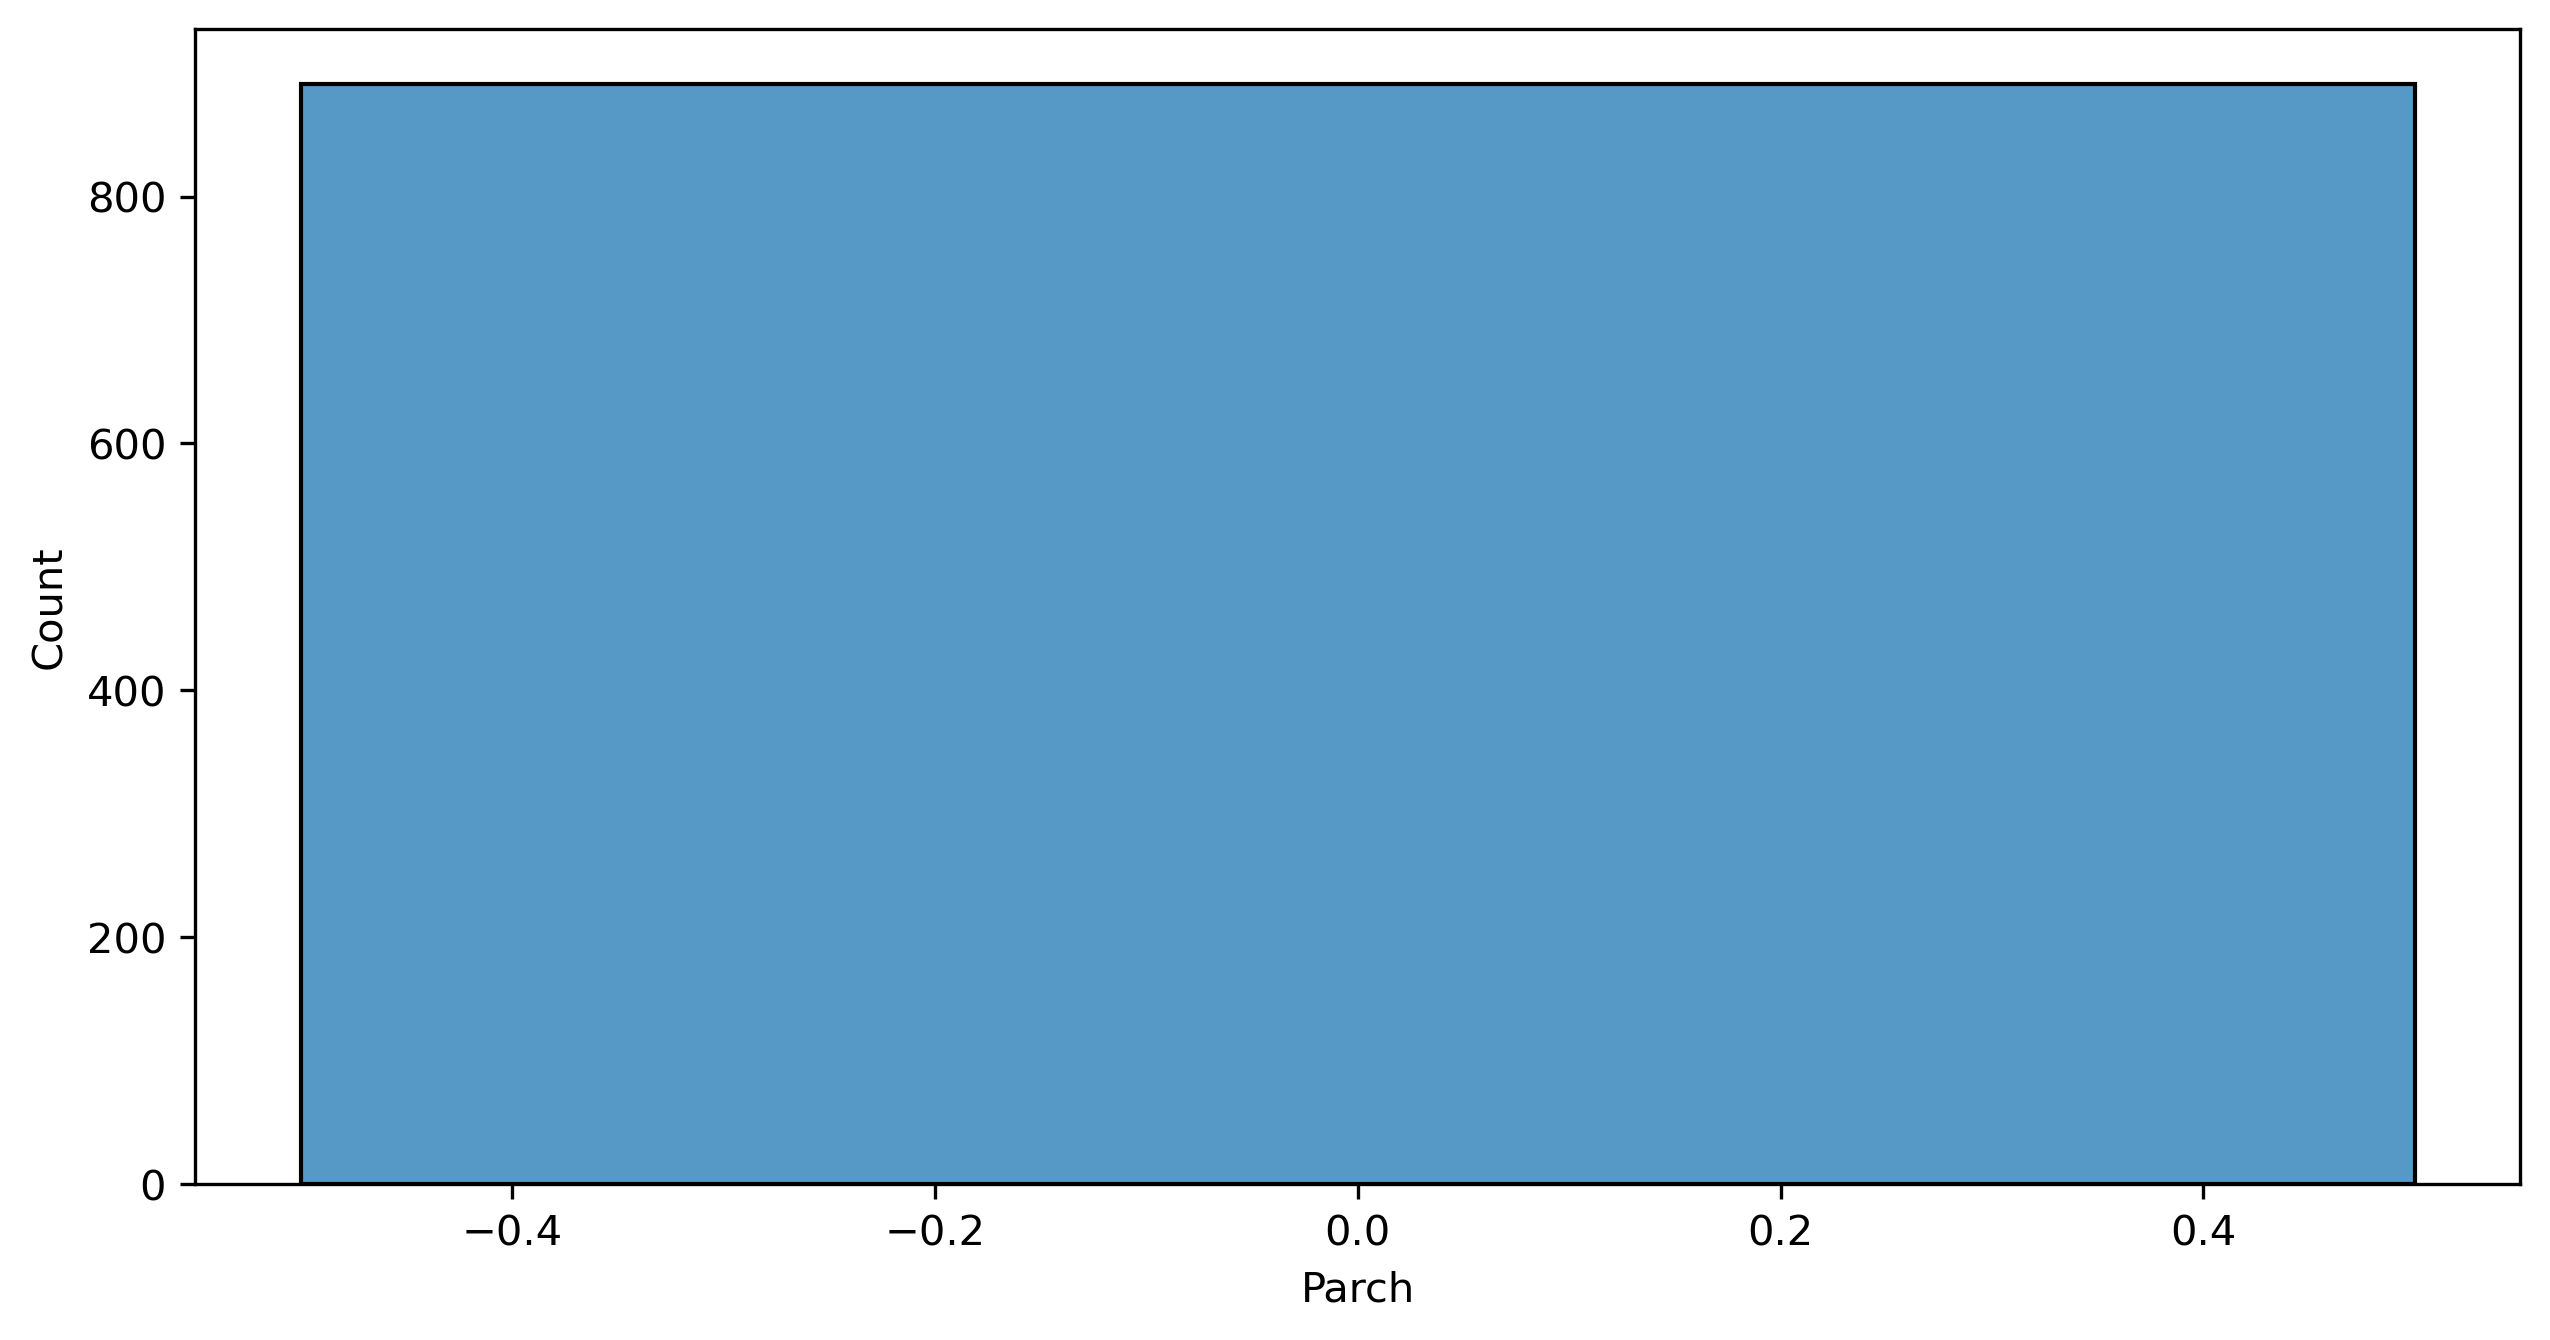

In [140]:
sns.histplot(train['Parch'])

# Let’s see the distribution of the ‘Pclass'’ column

<Axes: xlabel='Pclass', ylabel='Count'>

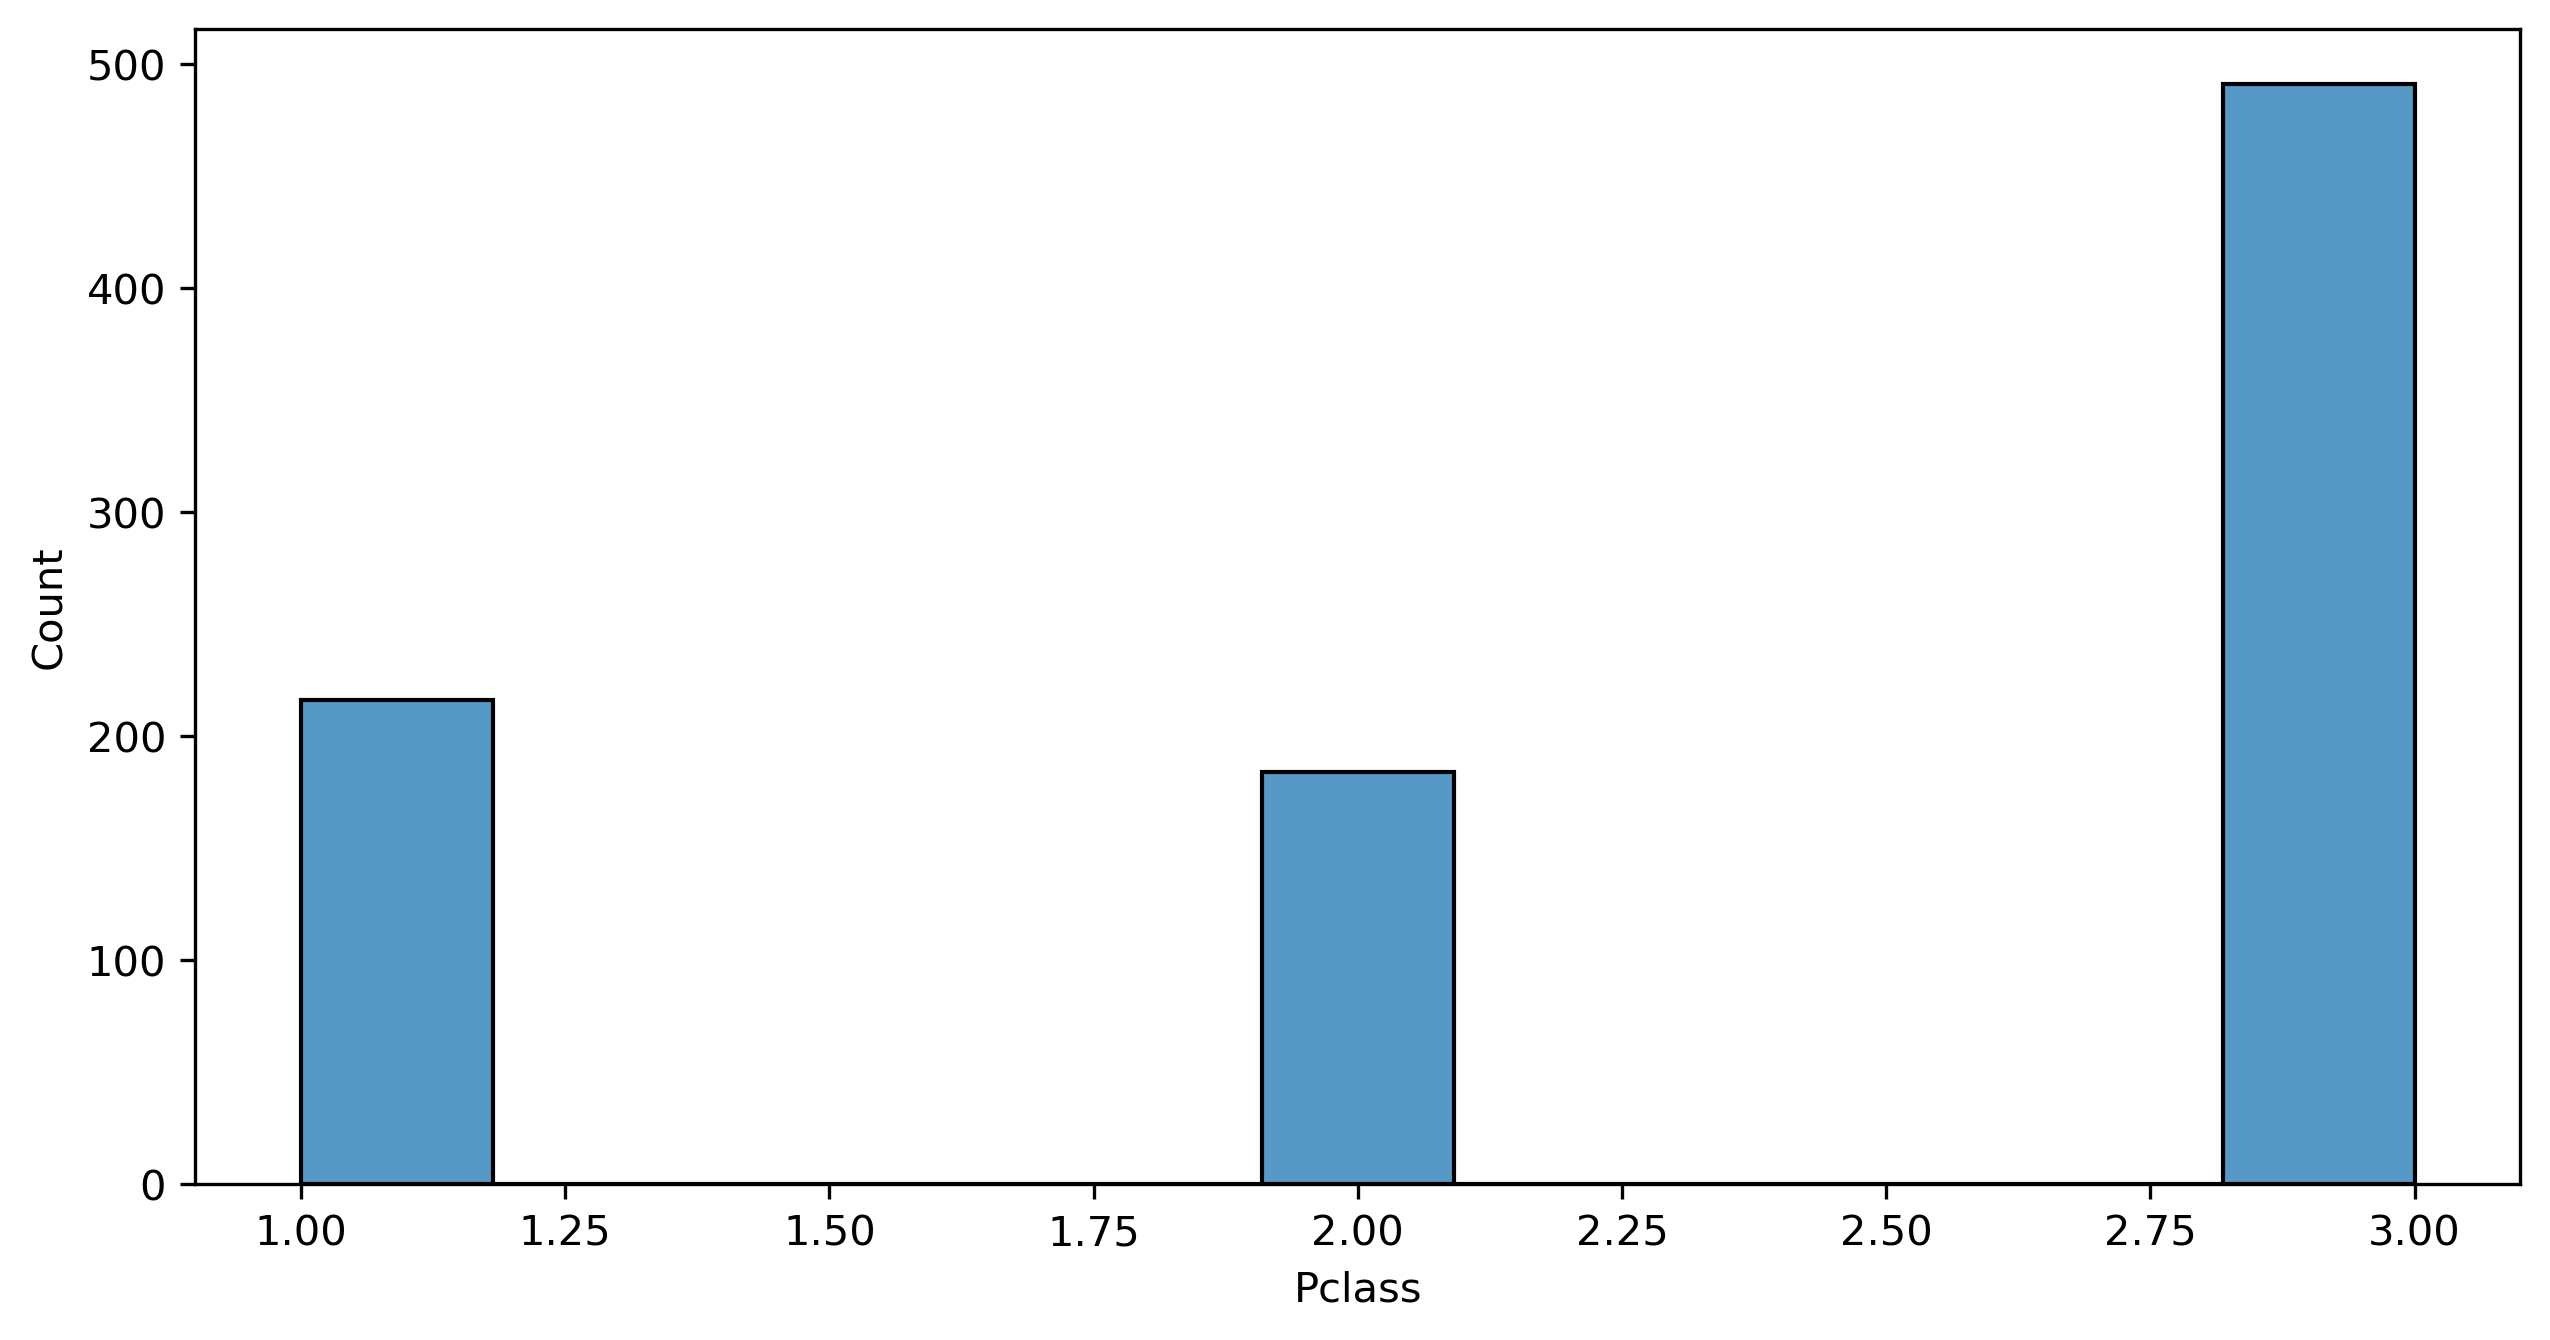

In [141]:
sns.histplot(train['Pclass'])

# Let’s see the distribution of the ‘Fare’ column. The distribution looks right-skewed.

<Axes: xlabel='Fare', ylabel='Count'>

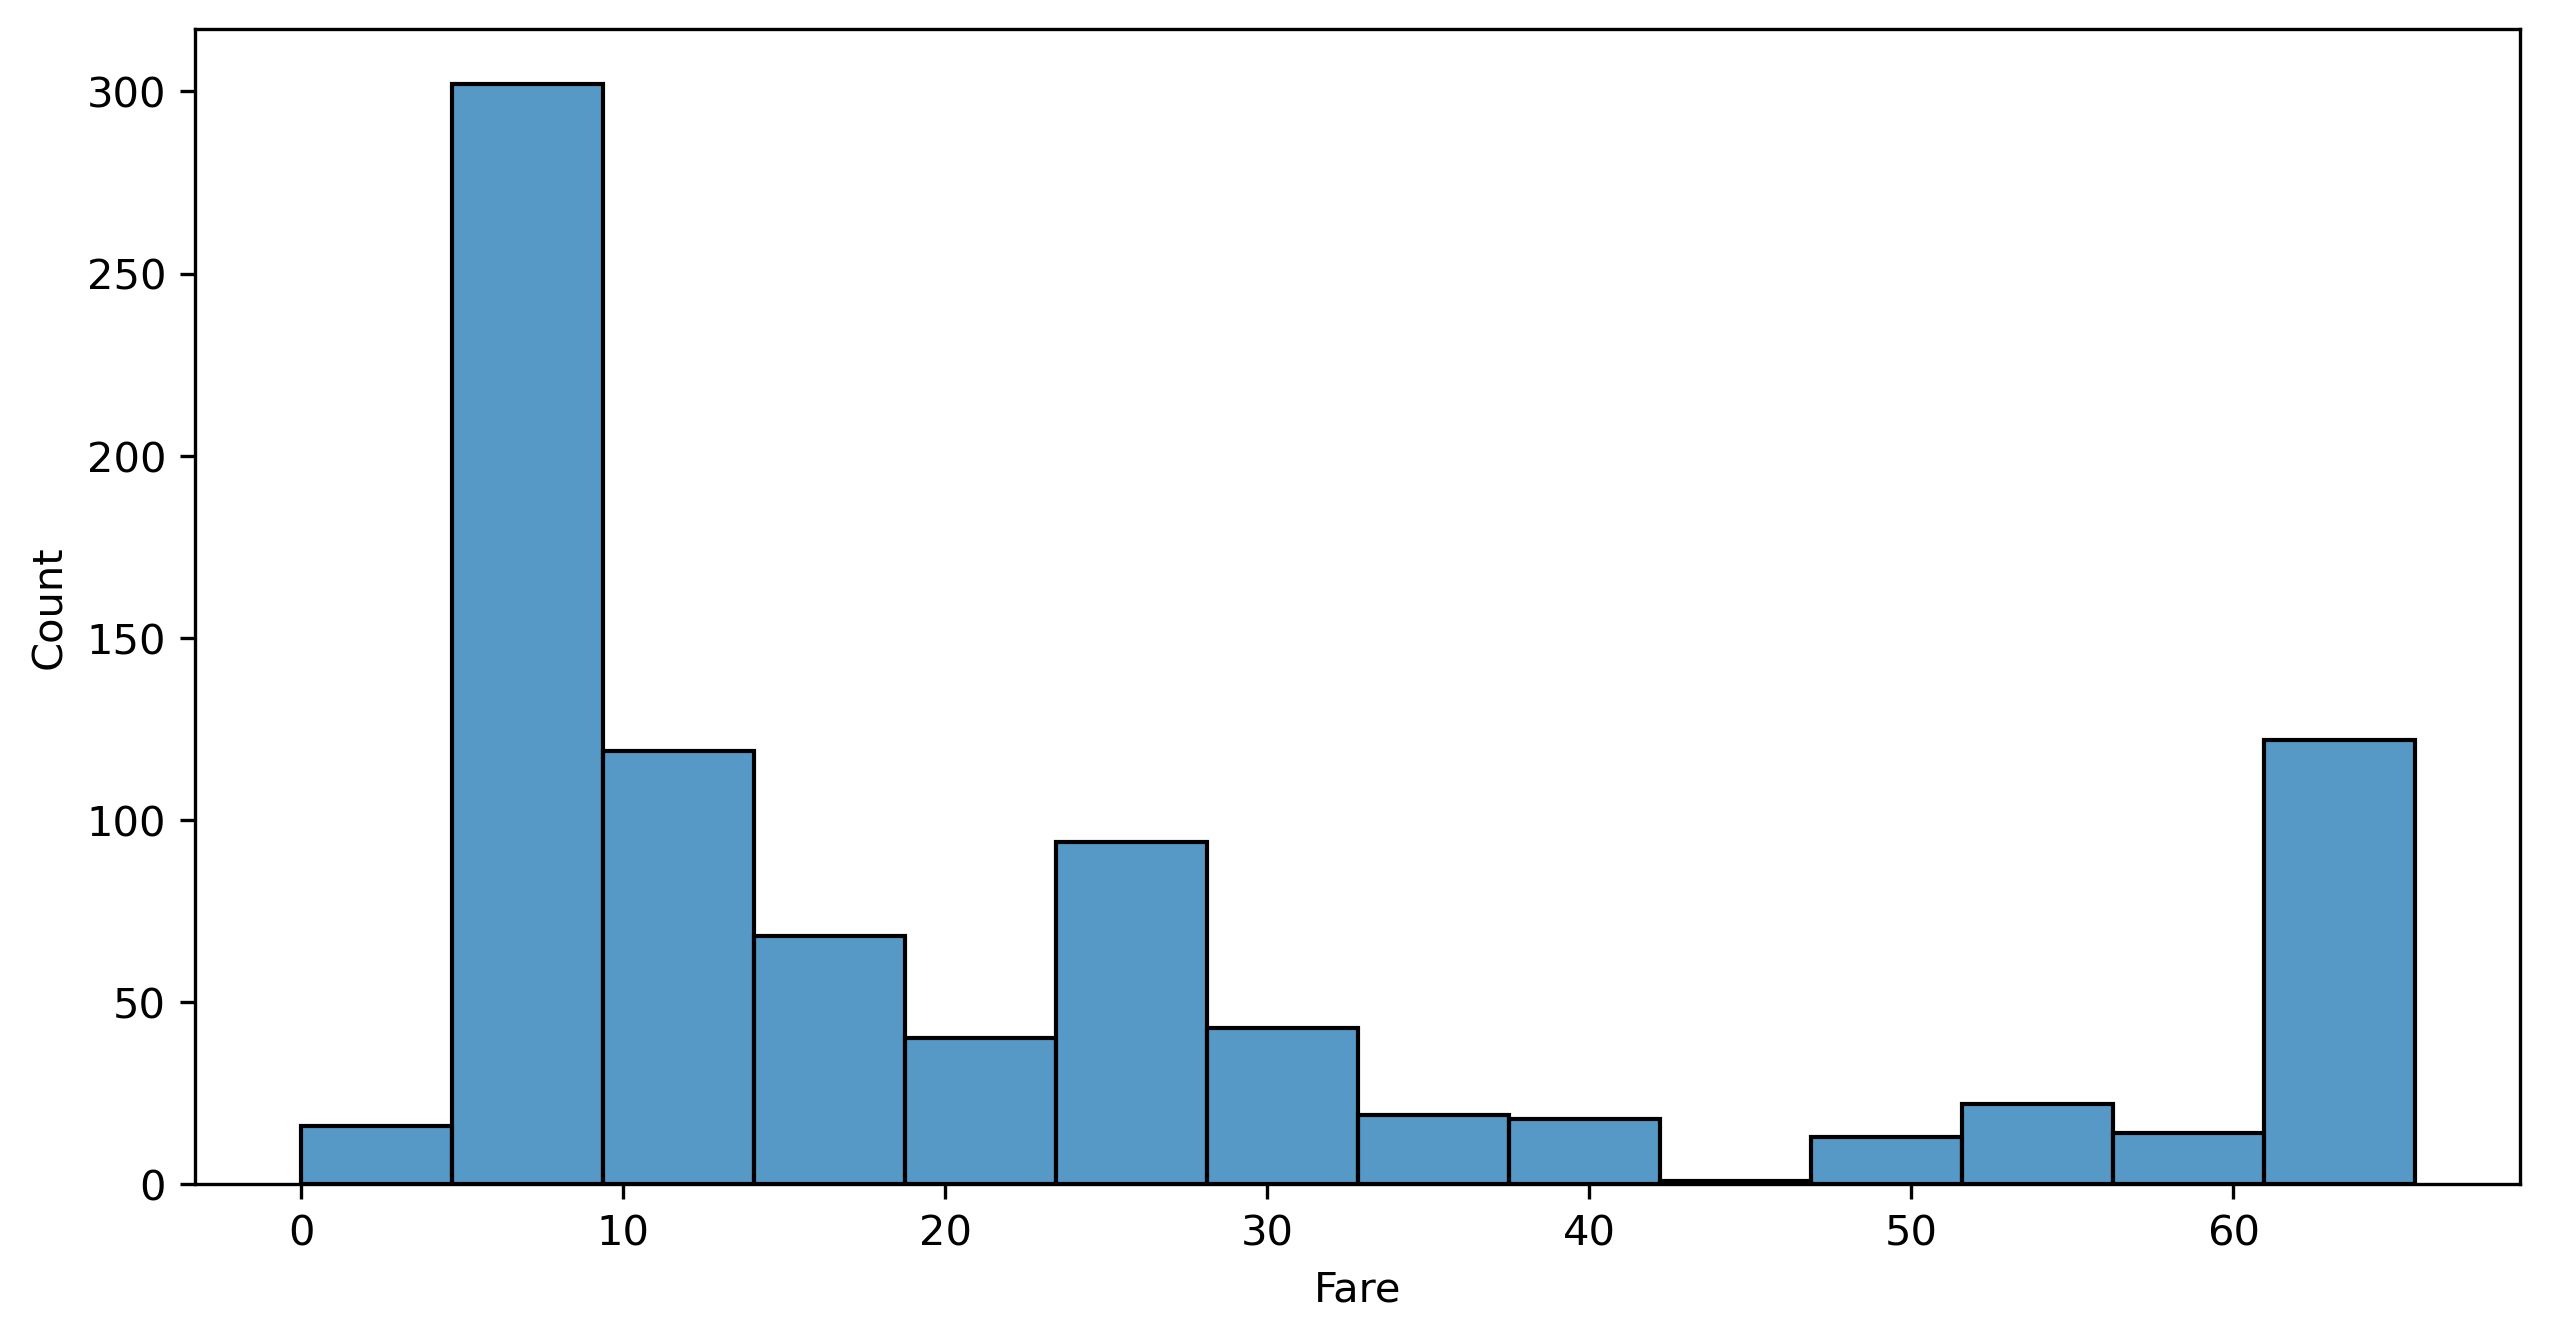

In [142]:
sns.histplot(train['Fare'])

# Transformations 

- Machines do not understand words and sentences.
- Machines only understand numbers.
- Before model building, we have convert all the categorical columns into numerical.

In [145]:
train.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0    1.0      0   7.2500        S
1         1       1  female  38.0    1.0      0  65.6344        C
2         1       3  female  26.0    0.0      0   7.9250        S
3         1       1  female  35.0    1.0      0  53.1000        S
4         0       3    male  35.0    0.0      0   8.0500        S

In [146]:
test.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5    0.0      0   7.8292        Q
1       3  female  47.0    1.0      0   7.0000        S
2       2    male  53.0    0.0      0   9.6875        Q
3       3    male  27.0    0.0      0   8.6625        S
4       3  female  22.0    1.0      0  12.2875        S

In [147]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp       float64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [148]:
test.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp       float64
Parch         int64
Fare        float64
Embarked     object
dtype: object

# Label Enconding Methods

In [149]:
from sklearn.preprocessing import LabelEncoder

In [150]:
label_encoder = LabelEncoder()

In [155]:
test["Sex"].unique()

array(['male', 'female'], dtype=object)

In [156]:
test["Sex"] = label_encoder.fit_transform(test["Sex"])

In [157]:
test["Sex"].unique()

array([1, 0])

In [158]:
test["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

In [160]:
test["Embarked"] = label_encoder.fit_transform(test["Embarked"])

In [161]:
test["Embarked"].unique()

array([1, 2, 0])

In [162]:
train["Sex"].unique()

array(['male', 'female'], dtype=object)

In [163]:
train["Sex"] = label_encoder.fit_transform(train["Sex"])

In [164]:
train["Sex"].unique()

array([1, 0])

In [165]:
train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [166]:
train["Embarked"] = label_encoder.fit_transform(train["Embarked"])

In [167]:
train["Embarked"].unique()

array([2, 0, 1])

In [168]:
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0    1.0      0   7.2500         2
1         1       1    0  38.0    1.0      0  65.6344         0
2         1       3    0  26.0    0.0      0   7.9250         2
3         1       1    0  35.0    1.0      0  53.1000         2
4         0       3    1  35.0    0.0      0   8.0500         2

In [169]:
test.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  34.5    0.0      0   7.8292         1
1       3    0  47.0    1.0      0   7.0000         2
2       2    1  53.0    0.0      0   9.6875         1
3       3    1  27.0    0.0      0   8.6625         2
4       3    0  22.0    1.0      0  12.2875         2

# Now, looking at the mentioned test and train data set, we have changed the categorical columns to numerical..

# Model Building

In [211]:
#!pip install xgboost
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [171]:
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0    1.0      0   7.2500         2
1         1       1    0  38.0    1.0      0  65.6344         0
2         1       3    0  26.0    0.0      0   7.9250         2
3         1       1    0  35.0    1.0      0  53.1000         2
4         0       3    1  35.0    0.0      0   8.0500         2

In [174]:
train["Survived"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='Survived', ylabel='count'>

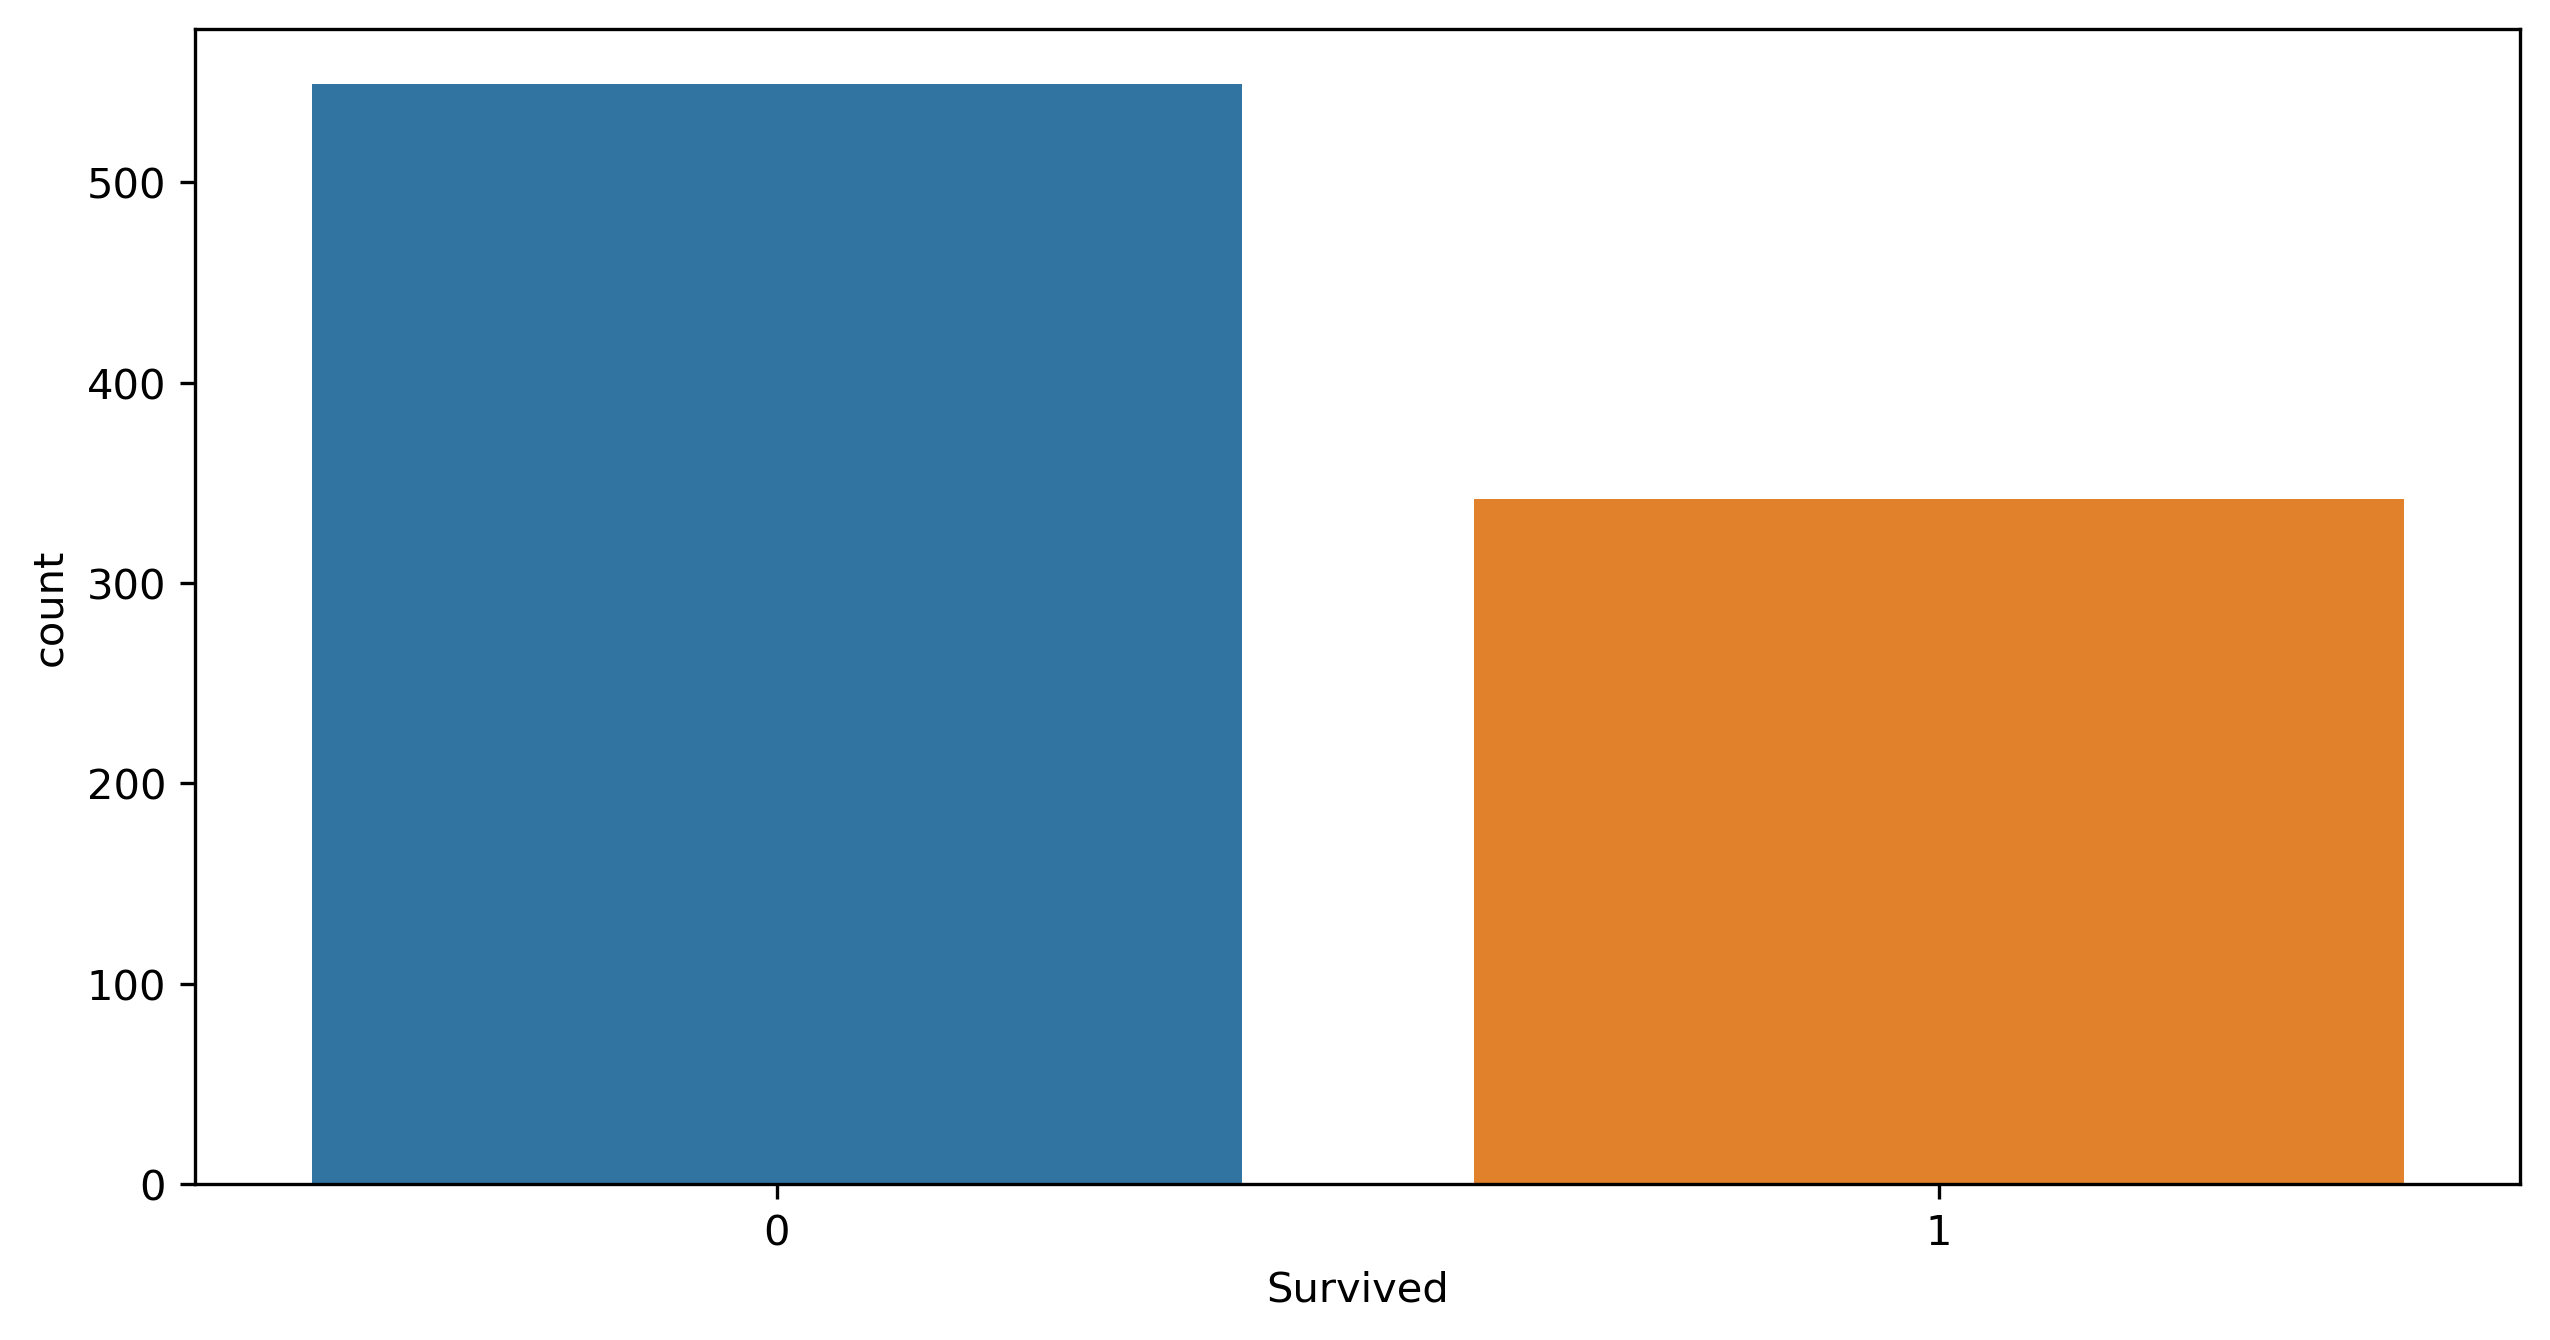

In [175]:
sns.countplot(x = train["Survived"])

# Split the train data set into two 

In [176]:
x = train.drop(["Survived"], axis=1)
y = train["Survived"]

In [177]:
x

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    1  22.0    1.0      0   7.2500         2
1         1    0  38.0    1.0      0  65.6344         0
2         3    0  26.0    0.0      0   7.9250         2
3         1    0  35.0    1.0      0  53.1000         2
4         3    1  35.0    0.0      0   8.0500         2
..      ...  ...   ...    ...    ...      ...       ...
886       2    1  27.0    0.0      0  13.0000         2
887       1    0  19.0    0.0      0  30.0000         2
888       3    0  28.0    1.0      0  23.4500         2
889       1    1  26.0    0.0      0  30.0000         0
890       3    1  32.0    0.0      0   7.7500         1

[891 rows x 7 columns]

In [178]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [179]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.3, random_state=42)

In [180]:
xtrain

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
445       1    1   4.0    0.0      0  65.6344         2
650       3    1  28.0    0.0      0   7.8958         2
172       3    0   2.5    1.0      0  11.1333         2
450       2    1  36.0    1.0      0  27.7500         2
314       2    1  43.0    1.0      0  26.2500         2
..      ...  ...   ...    ...    ...      ...       ...
106       3    0  21.0    0.0      0   7.6500         2
270       1    1  28.0    0.0      0  31.0000         2
860       3    1  41.0    2.0      0  14.1083         2
435       1    0  14.0    1.0      0  65.6344         2
102       1    1  21.0    0.0      0  65.6344         2

[623 rows x 7 columns]

In [182]:
ytrain

445    1
650    0
172    1
450    0
314    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 623, dtype: int64

In [183]:
xtest

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
709       3    1  28.0    1.0      0  15.2458         0
439       2    1  31.0    0.0      0  10.5000         2
840       3    1  20.0    0.0      0   7.9250         2
720       2    0   6.0    0.0      0  33.0000         2
39        3    0  14.0    1.0      0  11.2417         0
..      ...  ...   ...    ...    ...      ...       ...
821       3    1  27.0    0.0      0   8.6625         2
633       1    1  28.0    0.0      0   0.0000         2
456       1    1  54.5    0.0      0  26.5500         2
500       3    1  17.0    0.0      0   8.6625         2
430       1    1  28.0    0.0      0  26.5500         2

[268 rows x 7 columns]

In [184]:
ytest

709    1
439    0
840    0
720    1
39     1
      ..
821    1
633    0
456    0
500    0
430    1
Name: Survived, Length: 268, dtype: int64

In [185]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print(f"Train: {dt.score(xtrain,ytrain)}")
print(f"Test: {dt.score(xtest,ytest)}")
print(classification_report(ytest,ypred))

Train: 0.9759229534510433
Test: 0.7425373134328358
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       157
           1       0.70      0.67      0.68       111

    accuracy                           0.74       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268



In [188]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)
print(f"Train: {lg.score(xtrain,ytrain)}")
print(f"Test: {lg.score(xtest,ytest)}")
print(classification_report(ytest,ypred))

Train: 0.7993579454253612
Test: 0.8059701492537313
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       157
           1       0.78      0.74      0.76       111

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



# Automating Model building

In [189]:
def prediction(model):
    model.fit(xtrain,ytrain)
    yp = model.predict(xtest)
    print(f"Train Accuracy: {model.score(xtrain,ytrain)}")
    print(f"Test Accuracy: {model.score(xtest,ytest)}")
    print(classification_report(ytest,yp))

In [190]:
prediction(DecisionTreeClassifier())

Train Accuracy: 0.9759229534510433
Test Accuracy: 0.7574626865671642
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       157
           1       0.72      0.68      0.70       111

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



In [191]:
prediction(LogisticRegression())

Train Accuracy: 0.7993579454253612
Test Accuracy: 0.8059701492537313
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       157
           1       0.78      0.74      0.76       111

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [192]:
prediction(RandomForestClassifier())

Train Accuracy: 0.9759229534510433
Test Accuracy: 0.7723880597014925
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       157
           1       0.75      0.68      0.71       111

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [193]:
prediction(GradientBoostingClassifier())

Train Accuracy: 0.9117174959871589
Test Accuracy: 0.8059701492537313
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.82      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268



In [194]:
prediction(BaggingClassifier(estimator=LogisticRegression(), n_estimators=50))

Train Accuracy: 0.8009630818619583
Test Accuracy: 0.8022388059701493
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       157
           1       0.77      0.74      0.76       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [197]:
prediction(BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10))

Train Accuracy: 0.956661316211878
Test Accuracy: 0.7686567164179104
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       157
           1       0.73      0.69      0.71       111

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



# Fine tuning Model:

In [204]:
params = {
    'n_estimators' : [6, 10],
    'learning_rate' : [0.2,0.3,0.4],
    'max_depth' : [3,8]
}

In [205]:
grid = GridSearchCV(GradientBoostingClassifier(), params, verbose=1)

grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.2, 0.3, 0.4], 'max_depth': [3, 8],
                         'n_estimators': [6, 10]},
             verbose=1)

In [206]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 6}

In [207]:
prediction(GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=6))

Train Accuracy: 0.8443017656500803
Test Accuracy: 0.8059701492537313
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       157
           1       0.87      0.62      0.73       111

    accuracy                           0.81       268
   macro avg       0.83      0.78      0.79       268
weighted avg       0.82      0.81      0.80       268



In [208]:
prediction(XGBClassifier())

Train Accuracy: 0.9662921348314607
Test Accuracy: 0.7761194029850746
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       157
           1       0.75      0.69      0.72       111

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.77      0.78      0.77       268



# Making a Prediction

# We’ll predict the target for the actual test data. The output is an array of 0’s and 1’s. A 1 denotes that the person will survive and 0 denotes that the person will die.

# Predicting the actual test data

In [213]:
grid.predict(test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,